PERFORMING EDA ON THE DATA

In [2]:
import pandas as pd
data = pd.read_csv(r"/content/drive/MyDrive/Files_drops/null_values_dealt.csv")
data

Unnamed: 0   NCT Number  \
0                0  NCT00559130   
1                1  NCT00937664   
2                2  NCT00441597   
3                3  NCT03296228   
4                4  NCT00421603   
...            ...          ...   
257571      258032  NCT02360800   
257572      258033  NCT02352506   
257573      258034  NCT04996381   
257574      258035  NCT00380640   
257575      258036  NCT01844336   

                                              Study Title   Study Status  \
0       Efficacy Study of CytoSorb Hemoperfusion Devic...      COMPLETED   
1       Safety and Tolerability Study of AZD7762 in Co...  NON COMPLETED   
2       Does Atorvastatin Reduce Ischemia-Reperfusion ...      COMPLETED   
3       Comparison of Dynamic Radiographs in Determini...      COMPLETED   
4       A Placebo-Controlled Study of Mixed Amphetamin...      COMPLETED   
...                                                   ...            ...   
257571  Trial Comparing Tisseel as an Adjunct to Tradi...      COMPLETED   
257572                   Serum MIF in Acute Kidney Injury      COMPLETED   
257573  Feasibility of AI-based Heart Function Predict...      COMPLETED   
257574  The Efficacy of Trimethoprim in Wound Healing ...      COMPLETED   
257575  PBASE System Idiopathic Rhinitis Clinical Inve...      COMPLETED   

                                            Brief Summary Study Results  \
0       The hypothesis of this study is use of CytoSor...            NO   
1       The primary purpose of this study is to find o...            NO   
2       To study the impact of 3 day exposure to atorv...            NO   
3       The purpose of this study is to identify the f...            NO   
4       The proposed protocol is a double-blind, place...           YES   
...                                                   ...           ...   
257571  Bleeding after redo cardiac surgery is a commo...            NO   
257572  Acute kidney injury (AKI) is a common complica...            NO   
257573  The investigators will develop an artificial i...            NO   
257574  The purpose of this study is to assess the eff...            NO   
257575  The purpose of this study is to evaluate the p...            NO   

                                               Conditions  \
0       Acute Respiratory Distress Syndrome|Acute Lung...   
1         Cancer|Solid Tumors|Advanced Solid Malignancies   
2       Ischemia Reperfusion Injury|Cardiovascular Dis...   
3                         Adolescent Idiopathic Scoliosis   
4                                      Cocaine Dependence   
...                                                   ...   
257571                                         Hemorrhage   
257572                                Acute Kidney Injury   
257573                Chest X-ray for Clinical Evaluation   
257574                              Epidermolysis Bullosa   
257575                                Idiopathic Rhinitis   

                                            Interventions  \
0                          DEVICE: CytoSorb Hemoperfusion   
1                         DRUG: AZD7762|DRUG: gemcitabine   
2                                      DRUG: atorvastatin   
3       RADIATION: Flexibility Radiographs (supine, su...   
4          DRUG: Adderall-XR and Topiramate|DRUG: Placebo   
...                                                   ...   
257571  PROCEDURE: Spray Fibrin Sealant|PROCEDURE: Tra...   
257572           OTHER: Blood draw for measurement of MIF   
257573  DIAGNOSTIC_TEST: Scanning Chest X-rays and per...   
257574              DRUG: Trimethoprim|DRUG: Trimethoprim   
257575  DEVICE: PBASE system 1.1 + CT100 (active treat...   

                                 Primary Outcome Measures  \
0       Relative IL-6 levels as a percent (%) of basel...   
1       Assessment of adverse events (based on CTCAE v...   
2       Annexin A 5 targeting in the non dominant then...   
3       Investigate the flexibility equivalence of dif...   
4 

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
data.drop(["Unnamed: 0"], axis =1 , inplace = True)

In [4]:
data.shape

(257576, 280)

In [5]:
data["Study Status"].unique()

array(['COMPLETED', 'NON COMPLETED'], dtype=object)

Percentile Distribution for numerical columns : 25% , 50%, 75%

In [6]:
columns_to_analyze = ['Enrollment', 'subjects_affected', 'subjects_at_risk', 'frequency_threshold',
    'minimum_age', 'maximum_age']
for col in columns_to_analyze:
    print(f"Percentile distribution for {col}:")
    print(data.groupby('Study Status')[col].describe(percentiles=[0.25, 0.5, 0.75]))


Percentile distribution for Enrollment:
                  count         mean            std  min   25%   50%     75%  \
Study Status                                                                   
COMPLETED      221242.0  4996.936884  479847.352231  0.0  31.0  65.0  181.00   
NON COMPLETED   36334.0   112.894589    2206.369920  0.0   0.0   9.0   40.75   

                       max  
Study Status                
COMPLETED      188814085.0  
NON COMPLETED     378828.0  
Percentile distribution for subjects_affected:
                  count       mean        std  min  25%  50%  75%      max
Study Status                                                              
COMPLETED      221242.0  13.315040  65.719588  0.0  9.0  9.0  9.0  13289.0
NON COMPLETED   36334.0  10.062614  22.095730  0.0  9.0  9.0  9.0   1787.0
Percentile distribution for subjects_at_risk:
                  count       mean          std  min   25%   50%   75%  \
Study Status                                            

Plotting for column: Enrollment


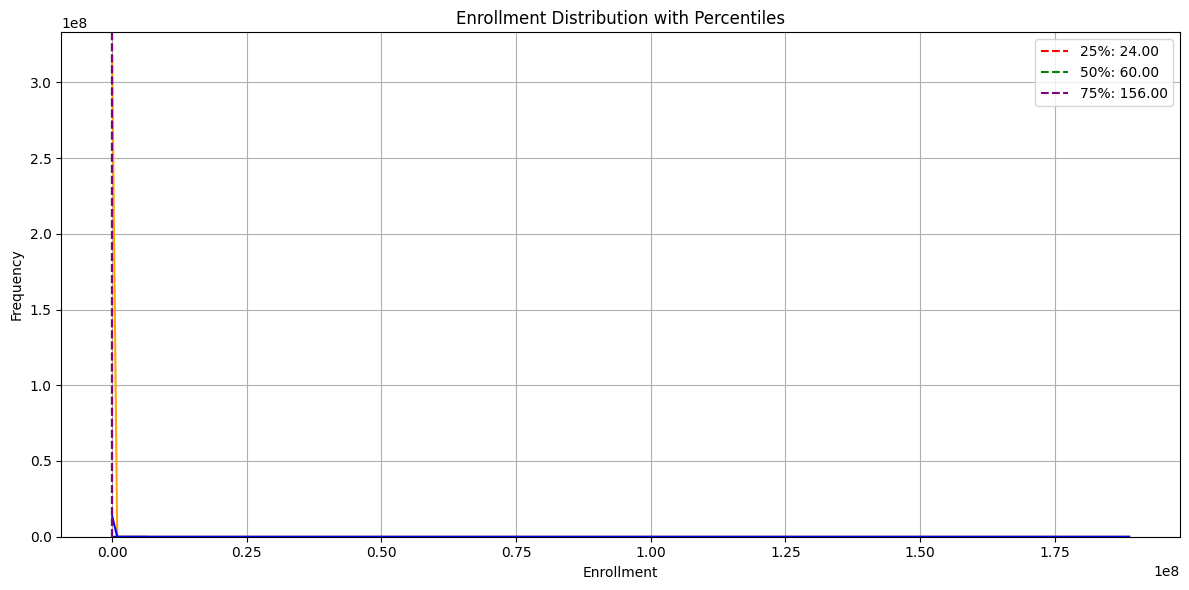

Plotting for column: subjects_affected


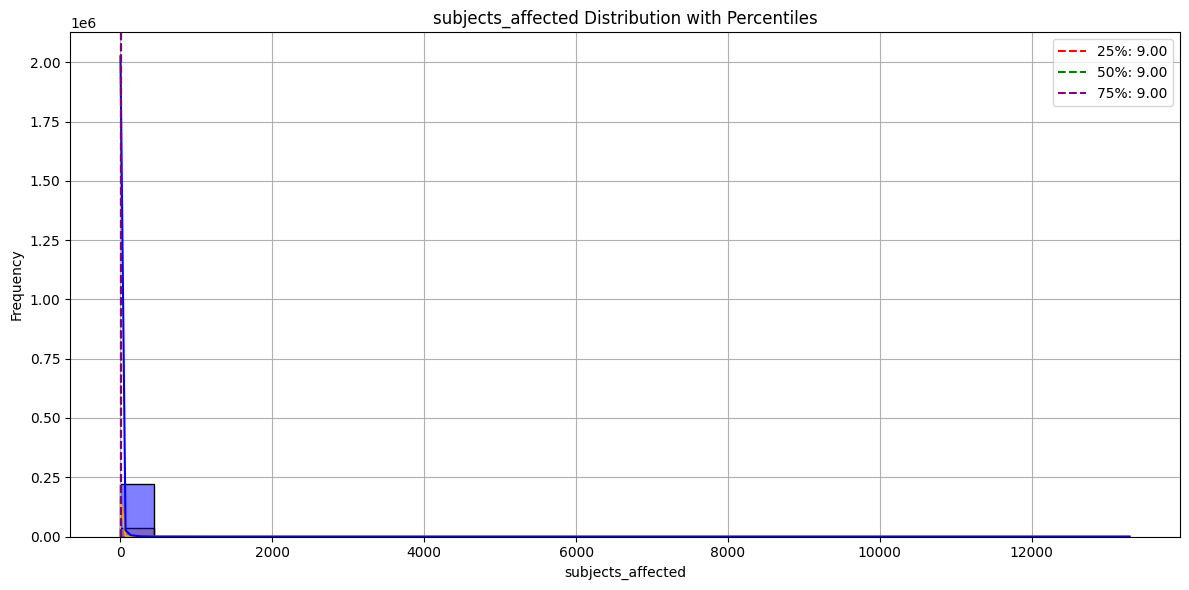

Plotting for column: subjects_at_risk


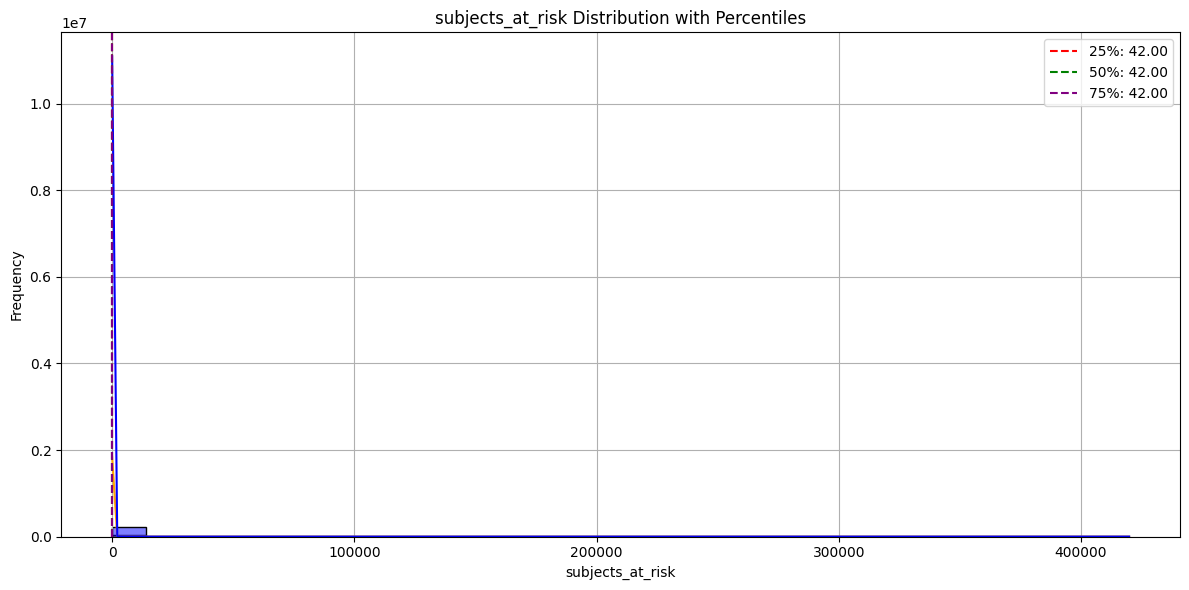

Plotting for column: frequency_threshold


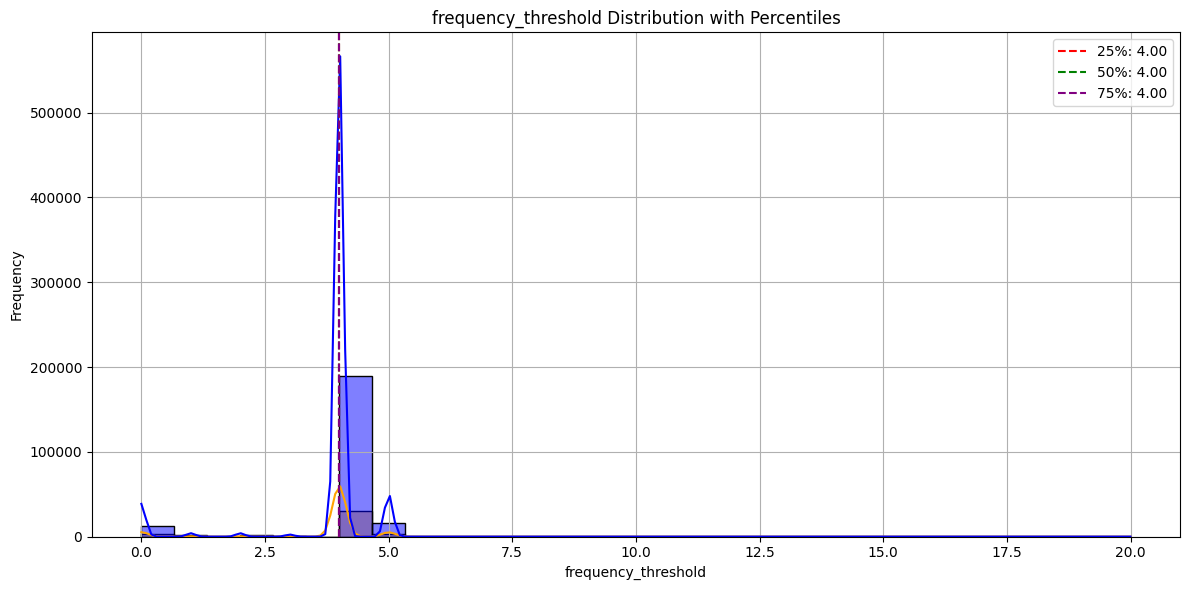

Plotting for column: minimum_age


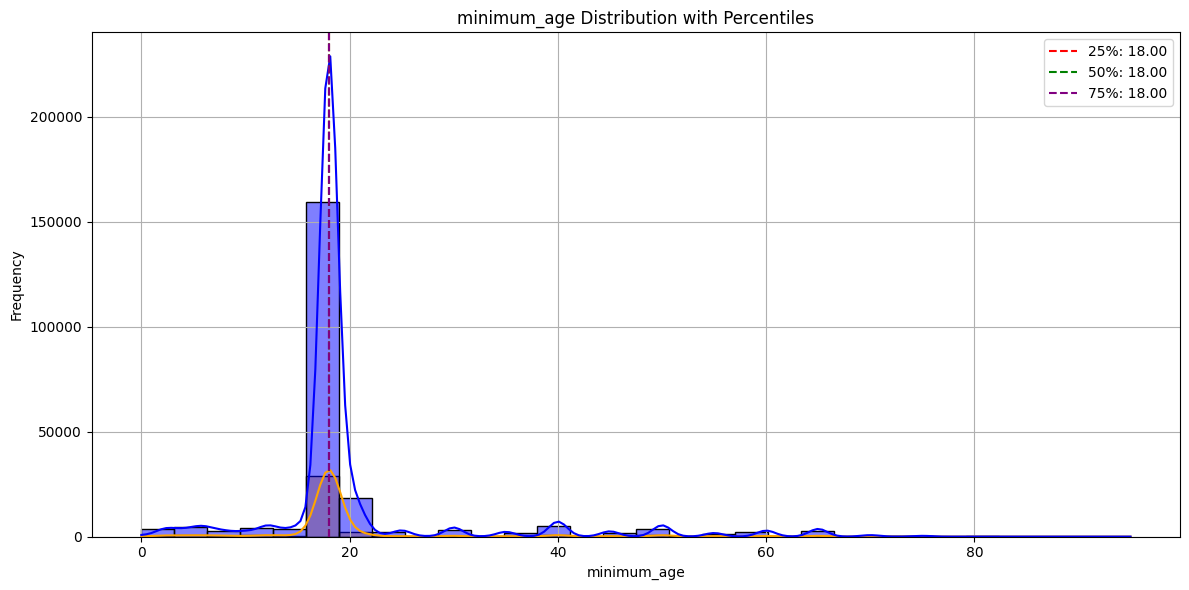

Plotting for column: maximum_age


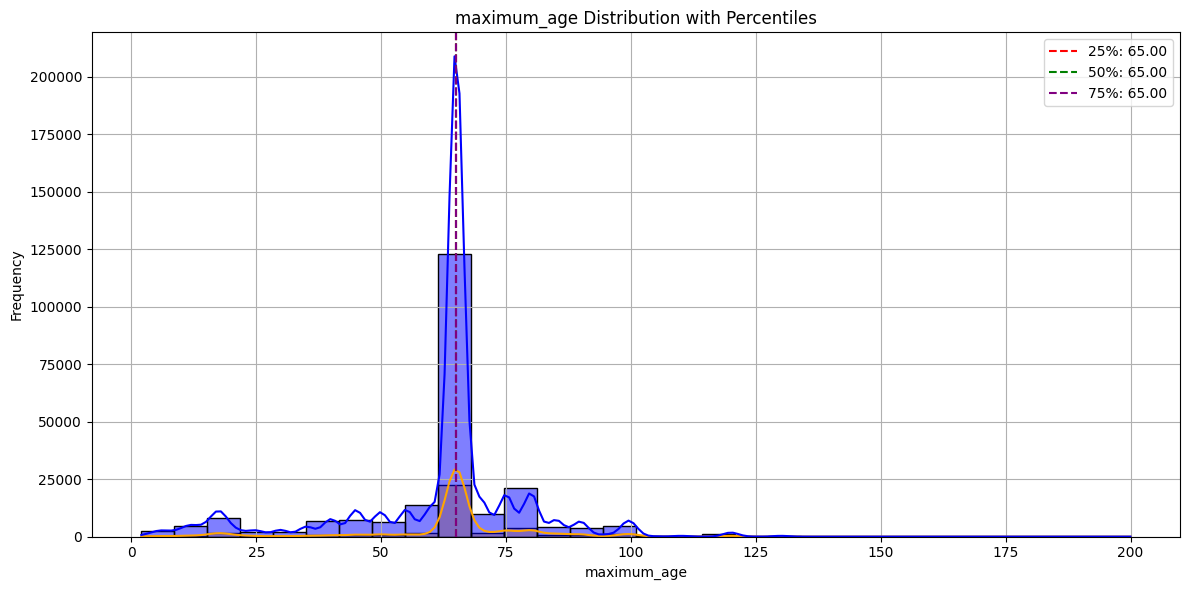

Plotting for column: adult


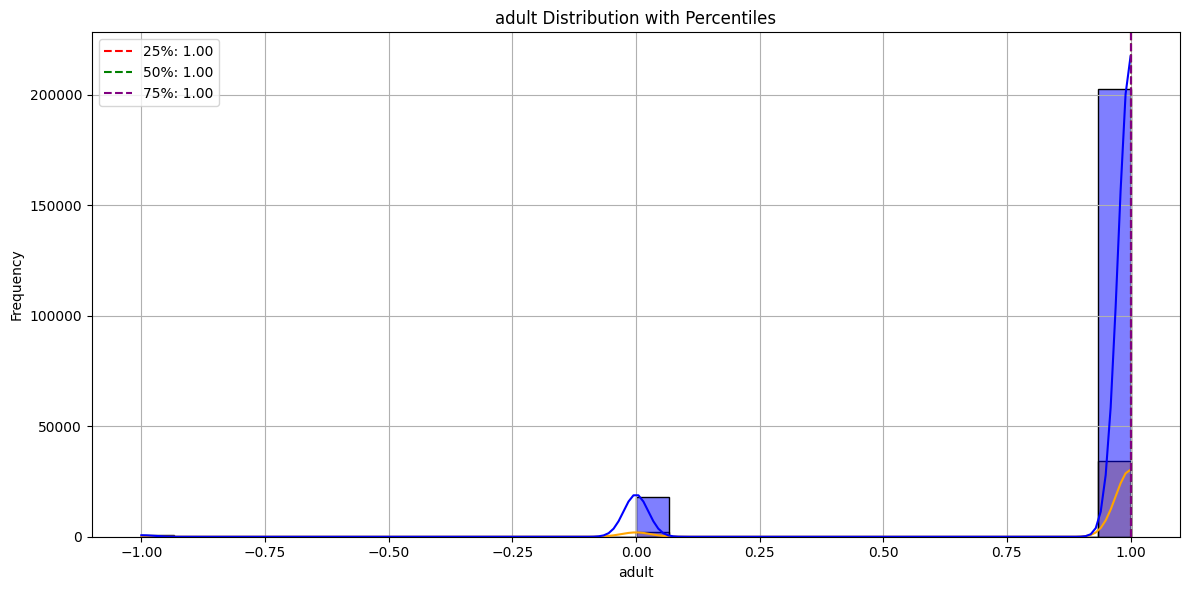

Plotting for column: child


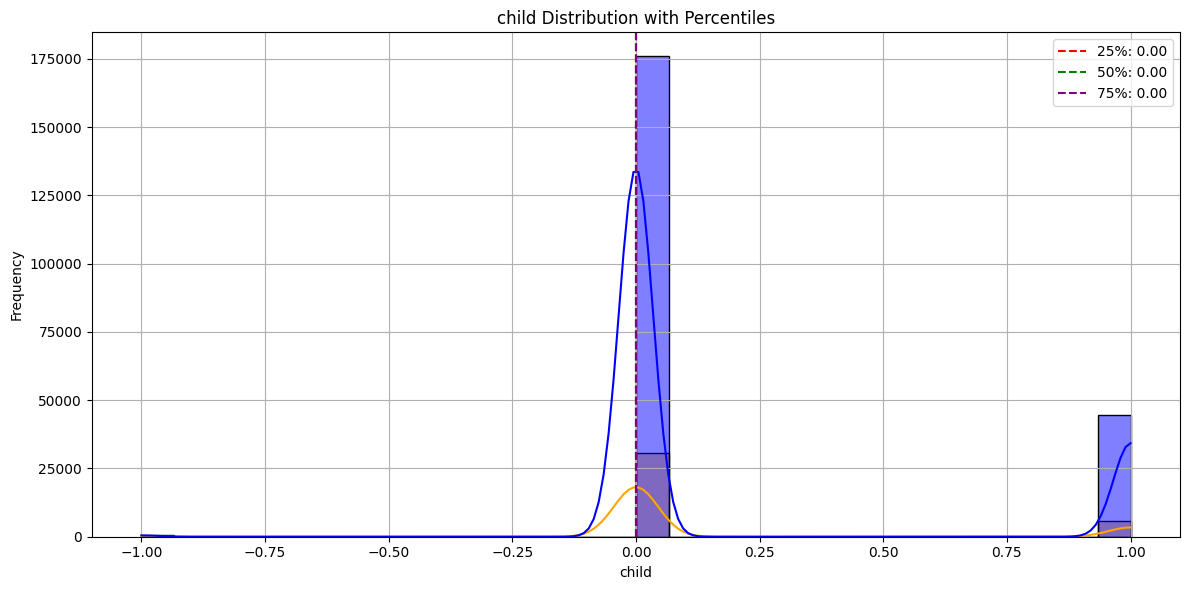

Plotting for column: older_adult


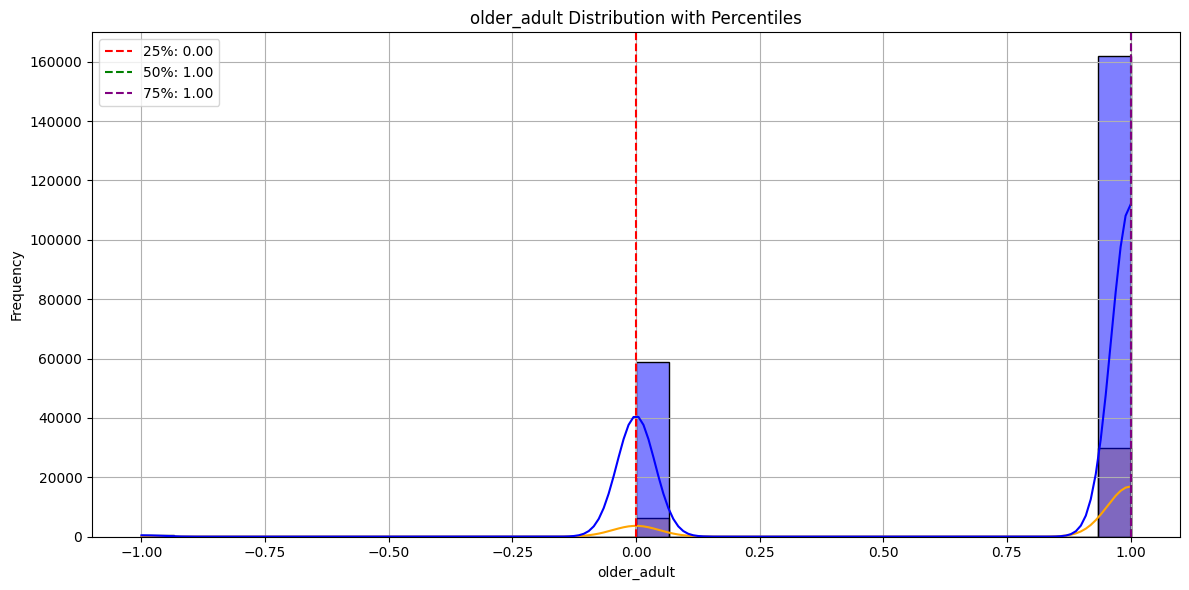

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_with_percentiles(data, column, by_group='Study Status'):
    plt.figure(figsize=(12, 6))

    percentiles = data[column].quantile([0.25, 0.5, 0.75])

    sns.histplot(data=data, x=column, hue=by_group, kde=True, bins=30,
                 palette={'COMPLETED': 'blue', 'NON COMPLETED': 'orange'})
    plt.title(f'{column} Distribution with Percentiles')
    plt.xlabel(column)
    plt.ylabel('Frequency')

    for perc, color, label in zip(percentiles, ['red', 'green', 'purple'], ['25%', '50%', '75%']):
        plt.axvline(x=perc, color=color, linestyle='--', linewidth=1.5, label=f'{label}: {perc:.2f}')

    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

columns_to_analyze = ['Enrollment', 'subjects_affected', 'subjects_at_risk', 'frequency_threshold',
    'minimum_age', 'maximum_age', 'adult', 'child', 'older_adult']
for col in columns_to_analyze:
    if col in data.columns:
        print(f"Plotting for column: {col}")
        plot_with_percentiles(data, col)


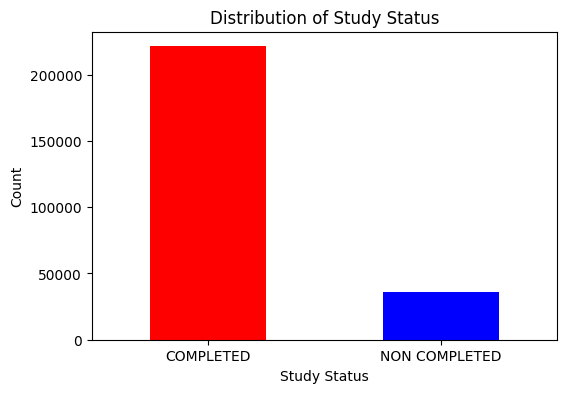

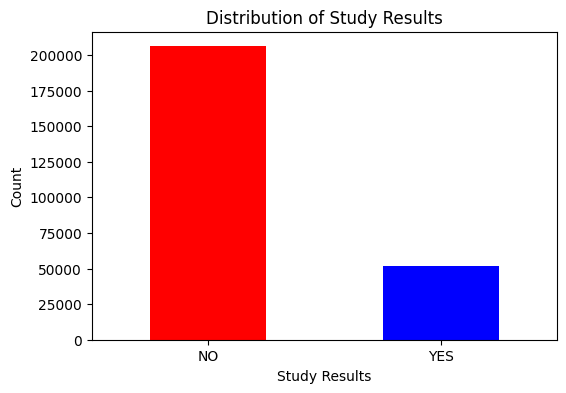

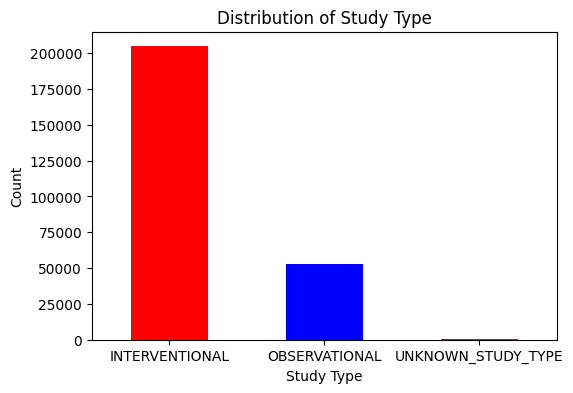

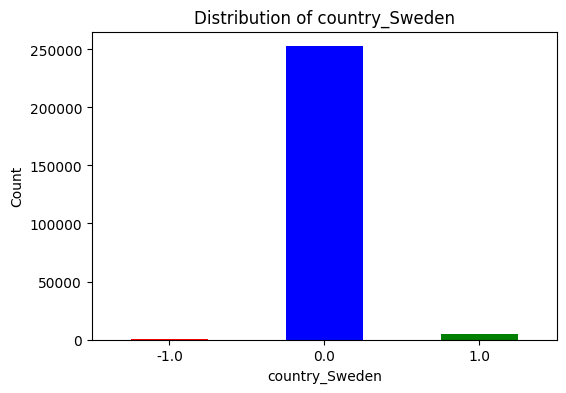

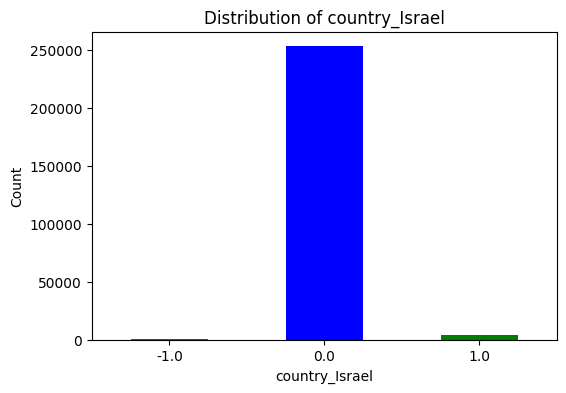

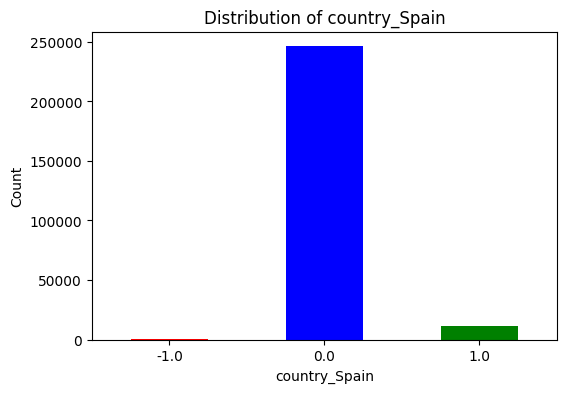

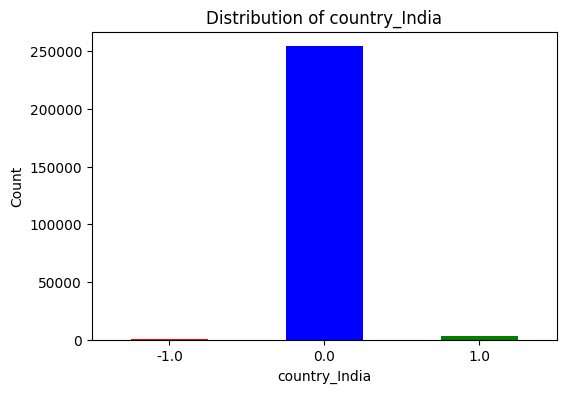

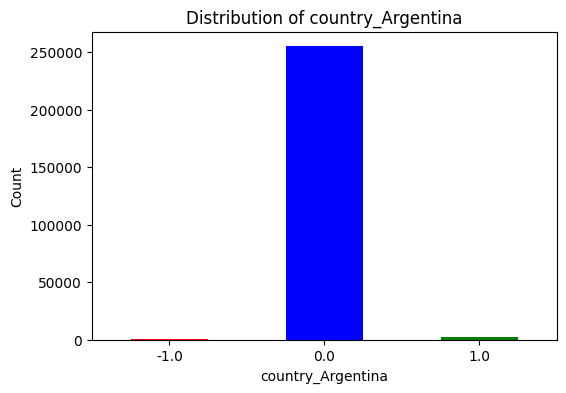

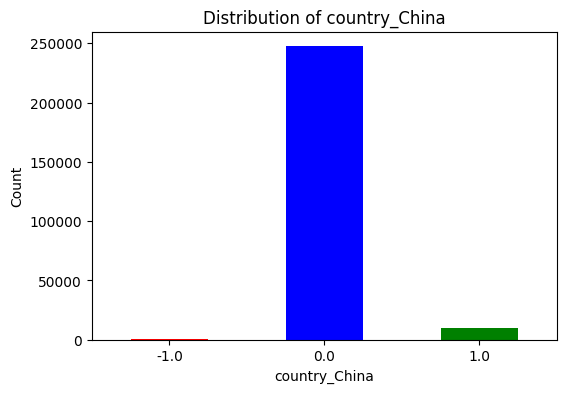

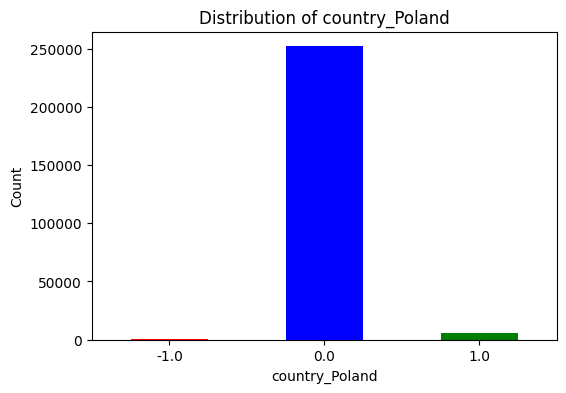

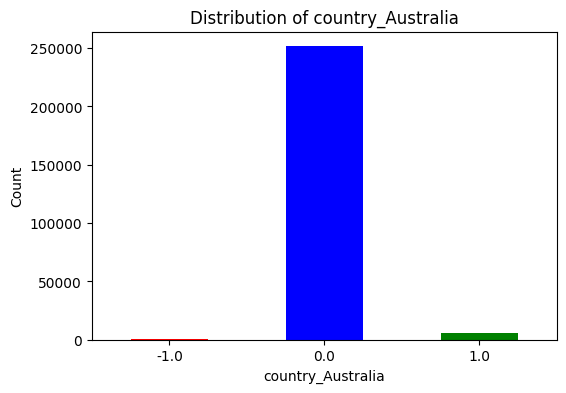

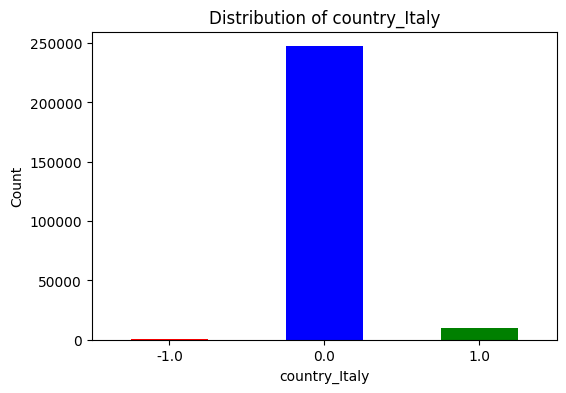

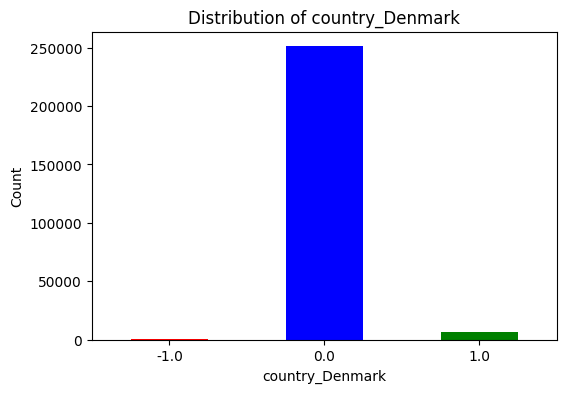

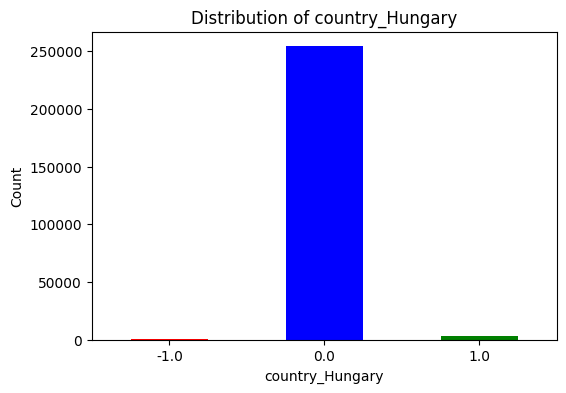

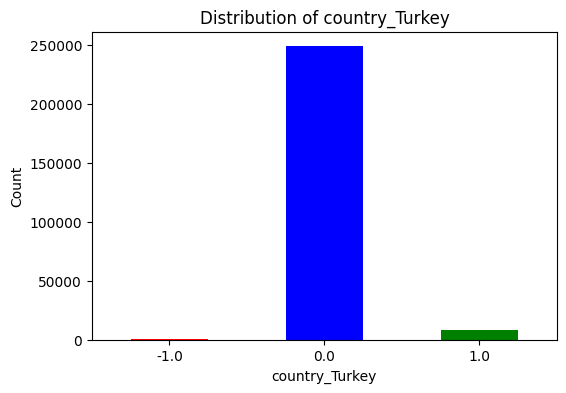

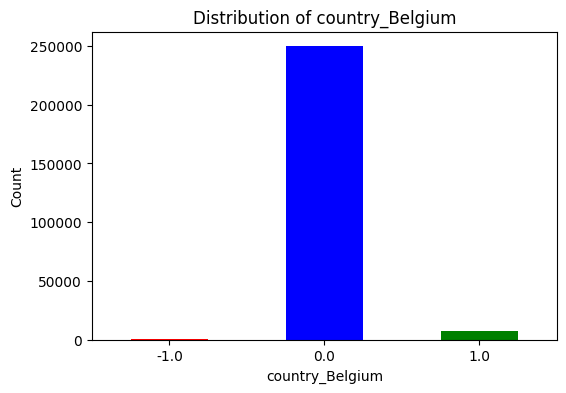

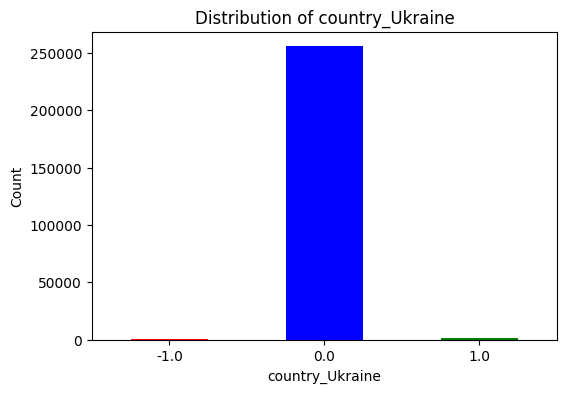

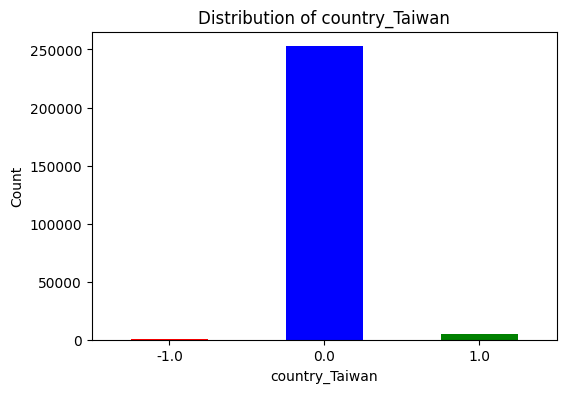

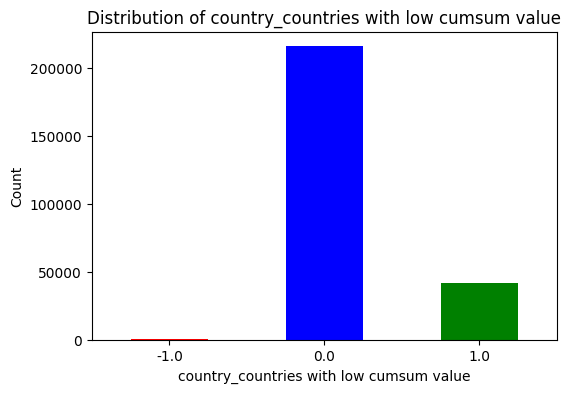

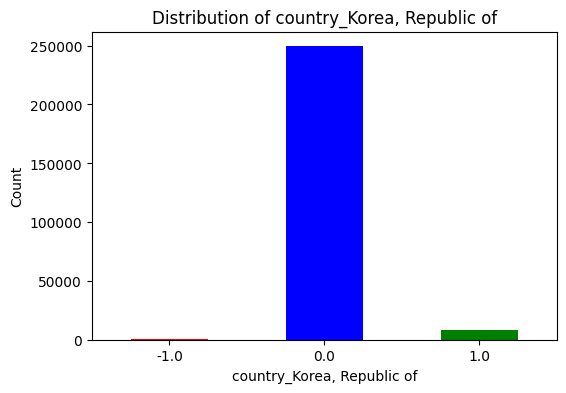

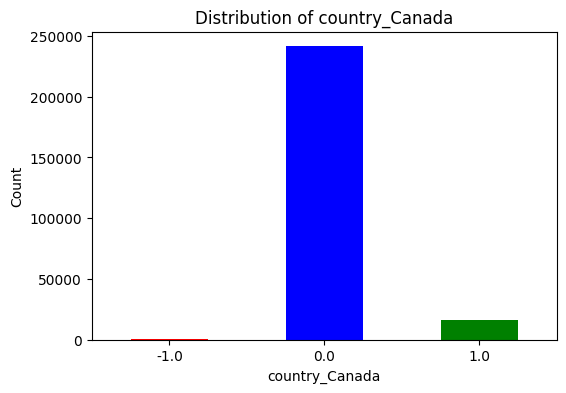

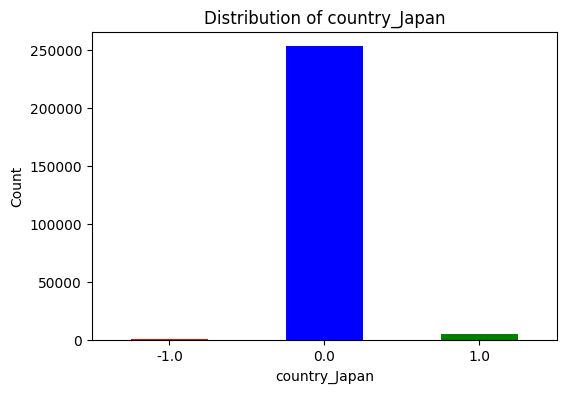

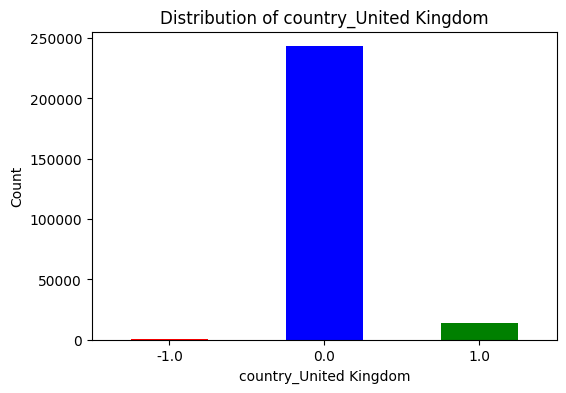

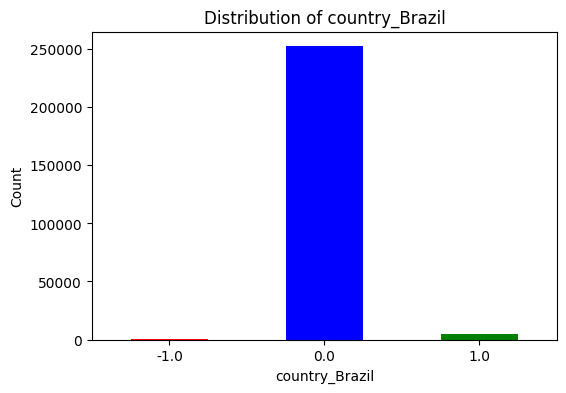

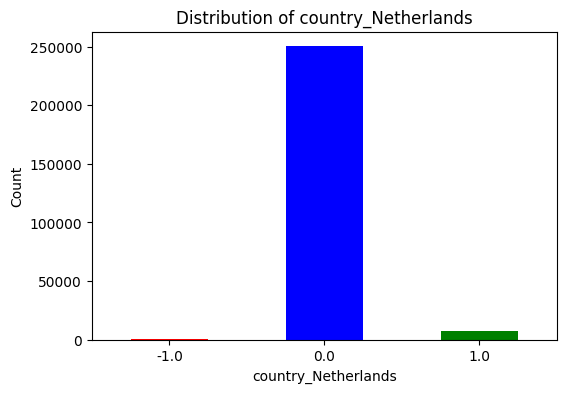

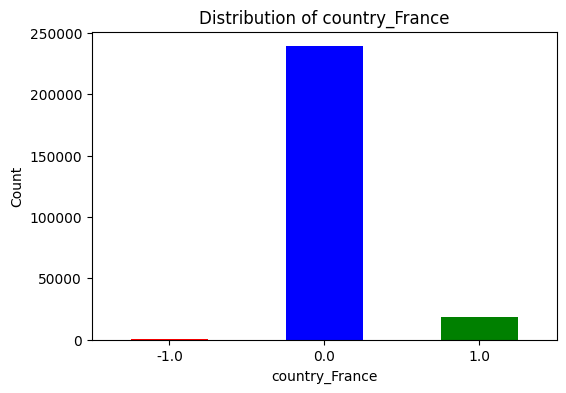

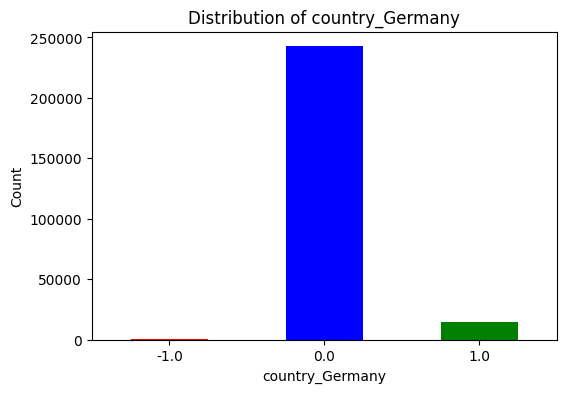

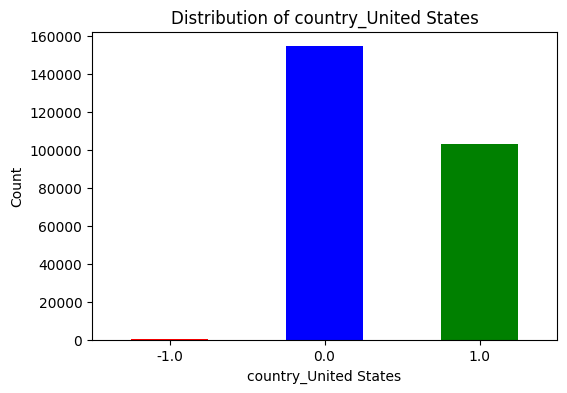

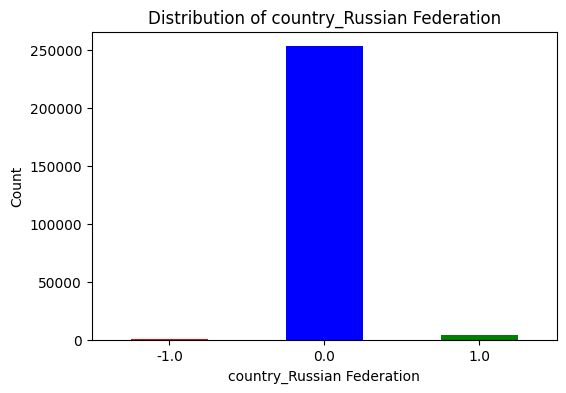

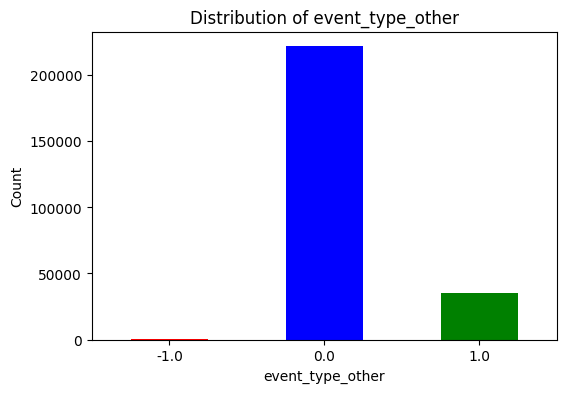

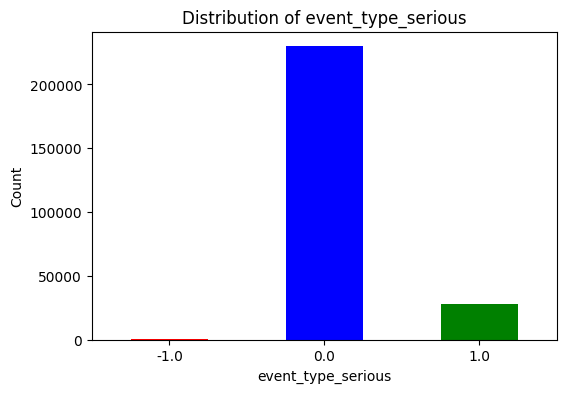

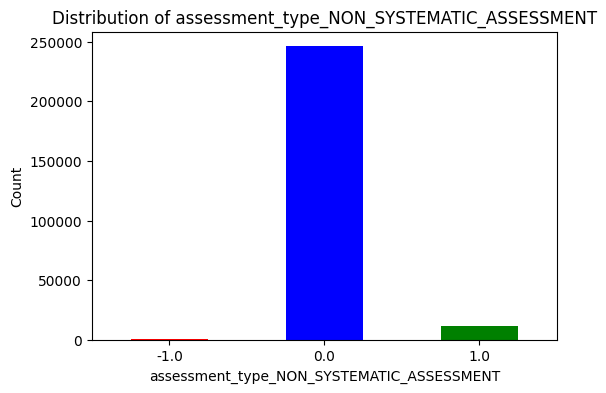

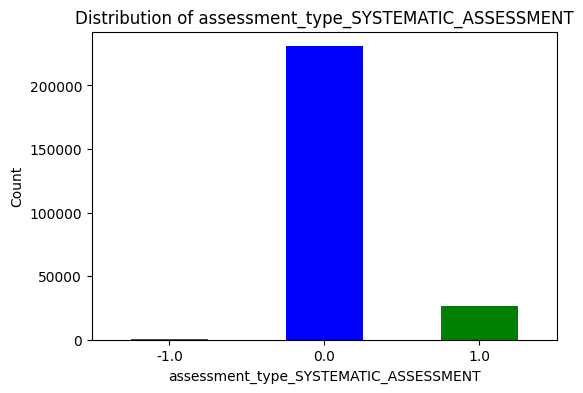

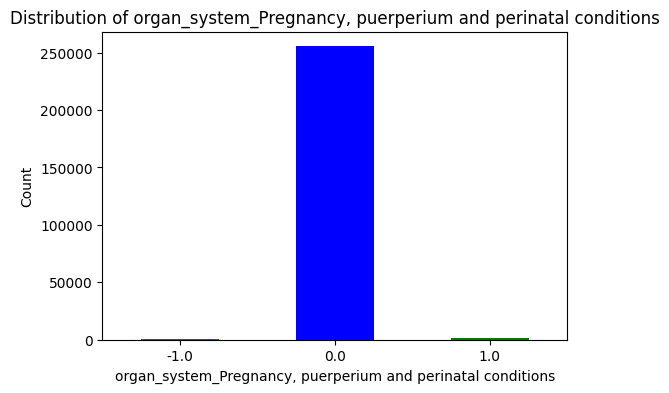

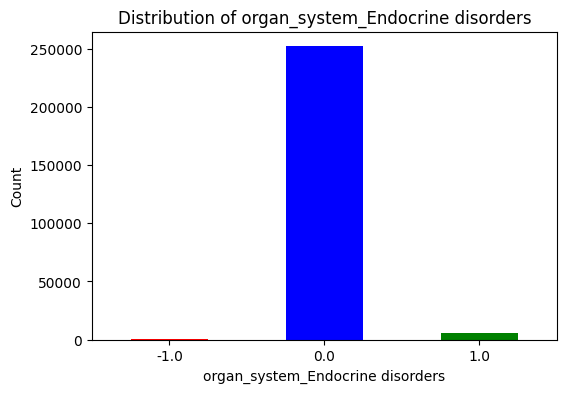

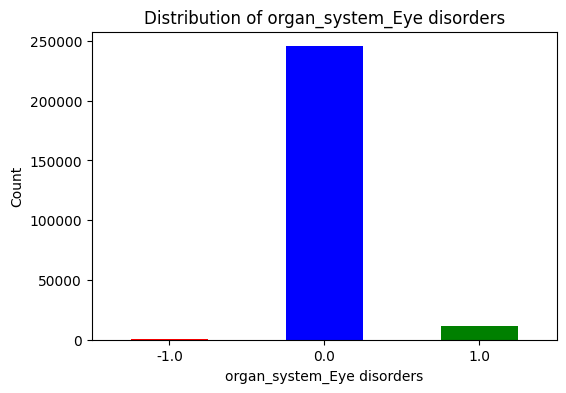

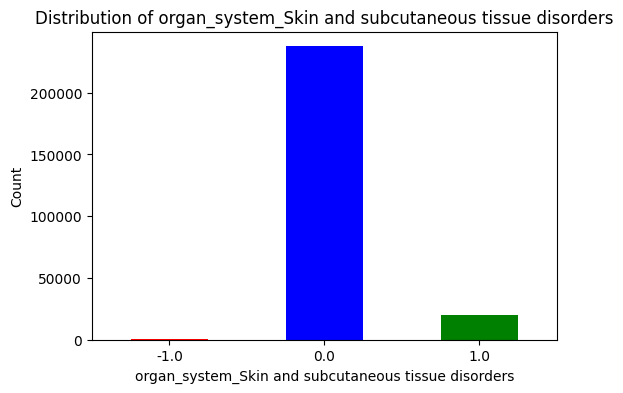

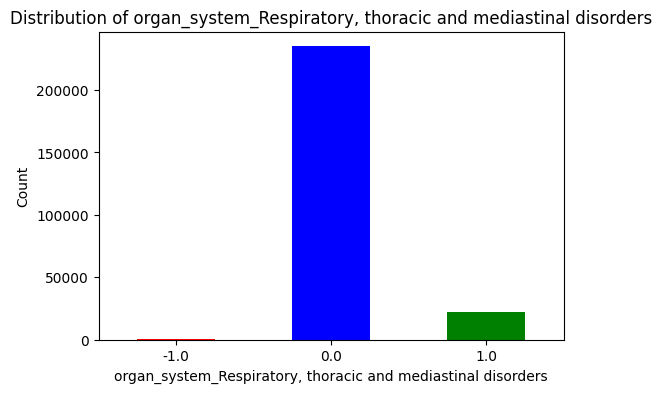

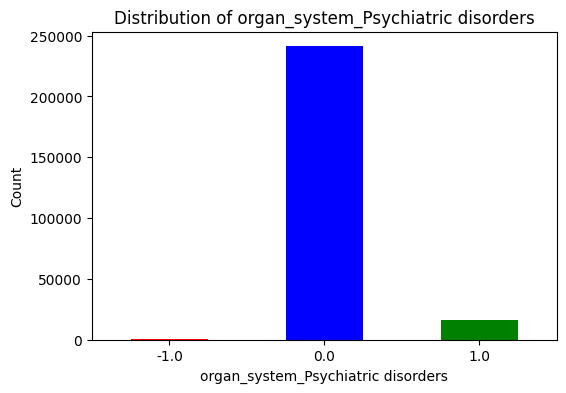

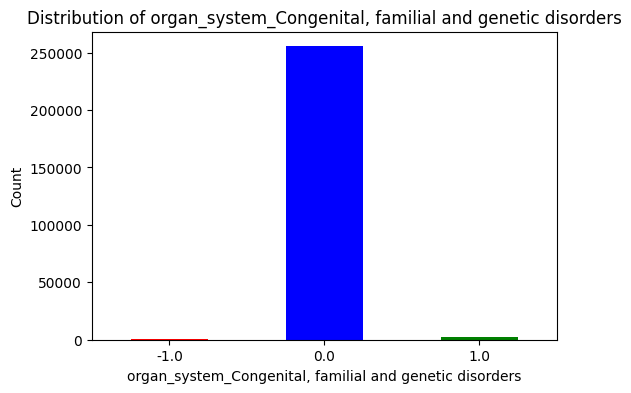

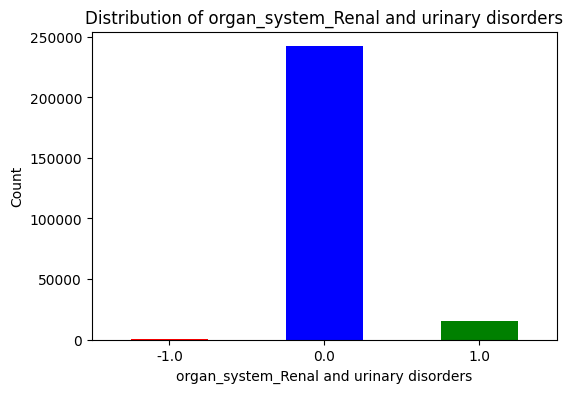

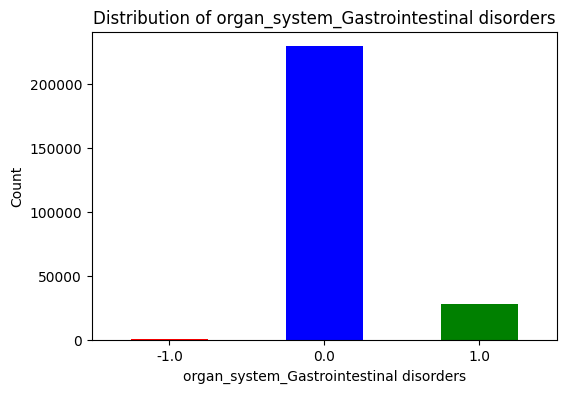

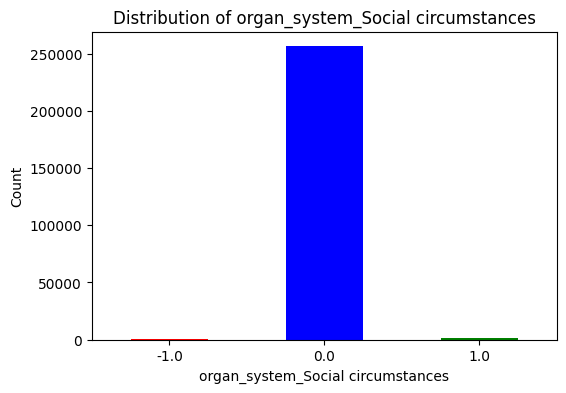

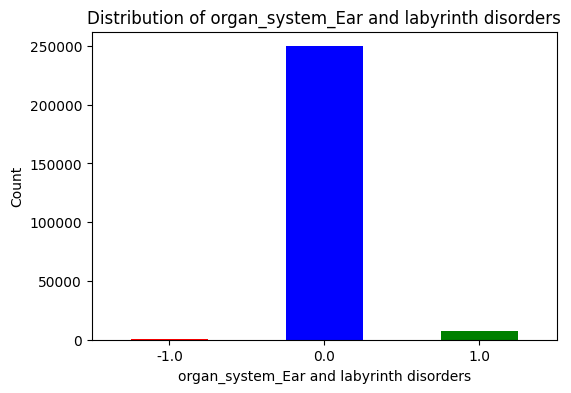

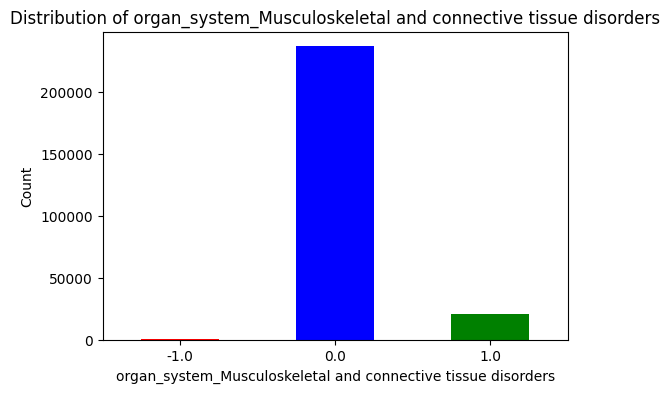

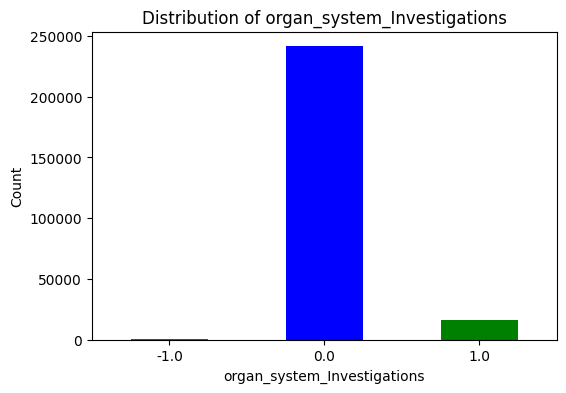

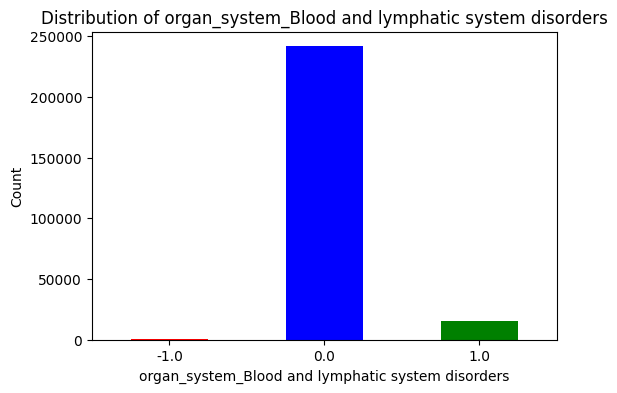

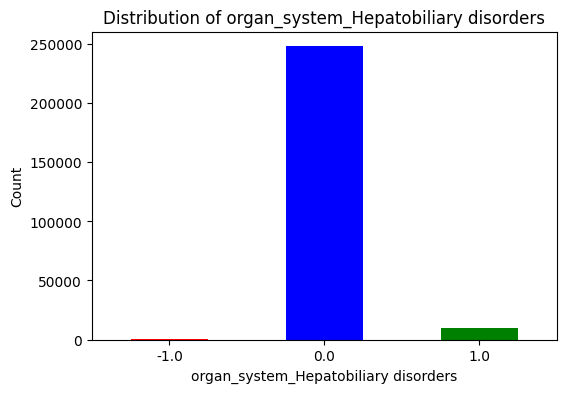

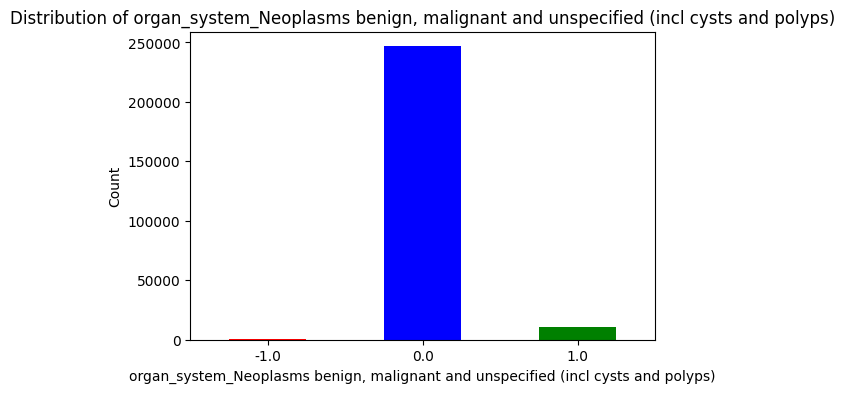

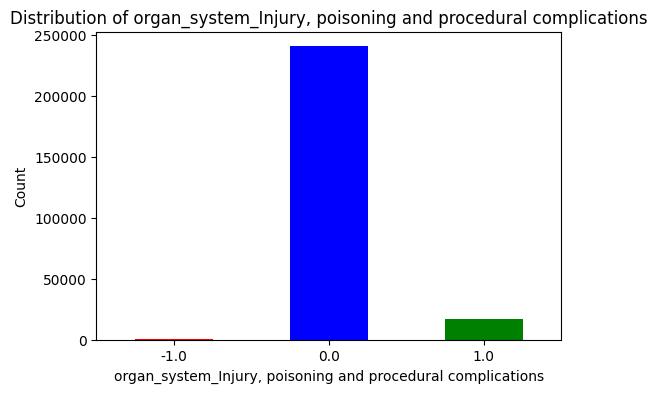

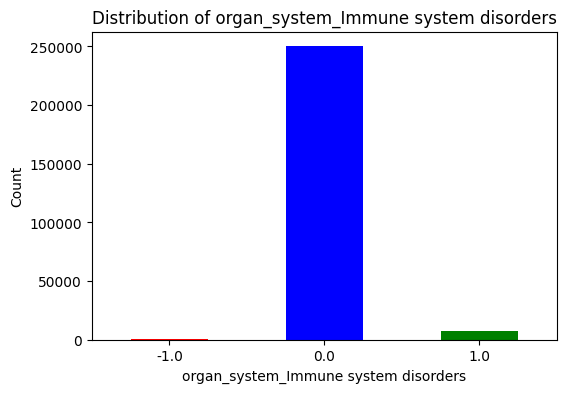

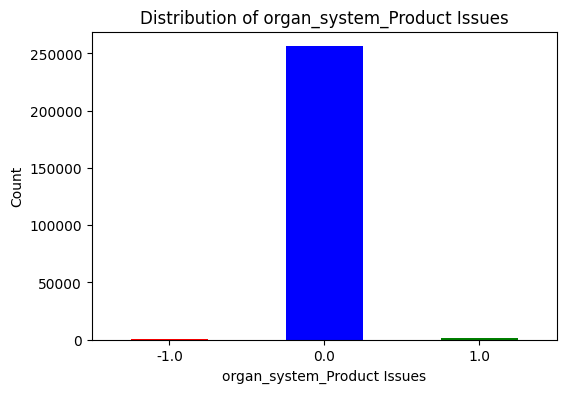

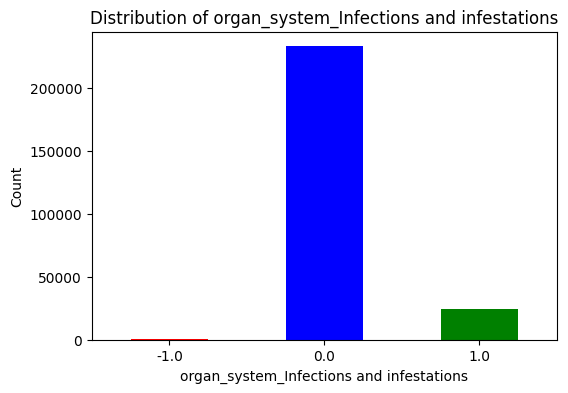

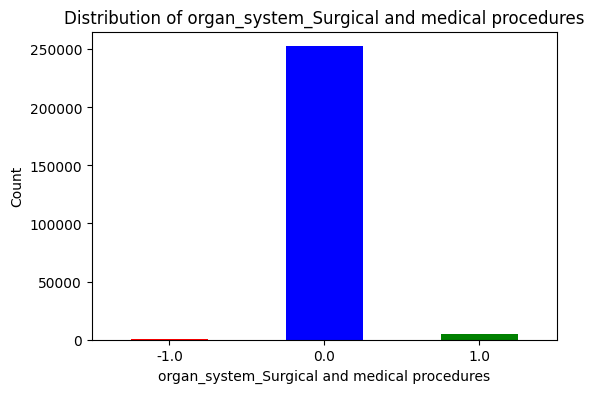

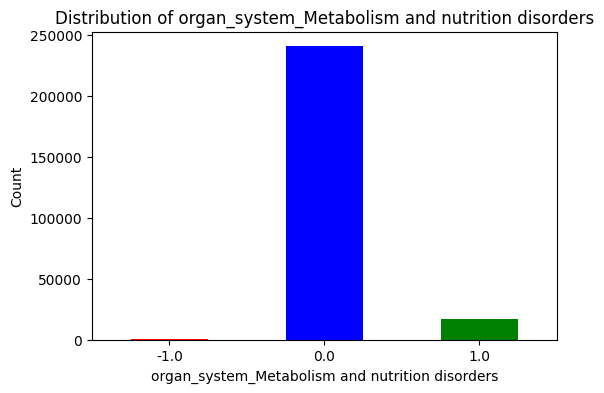

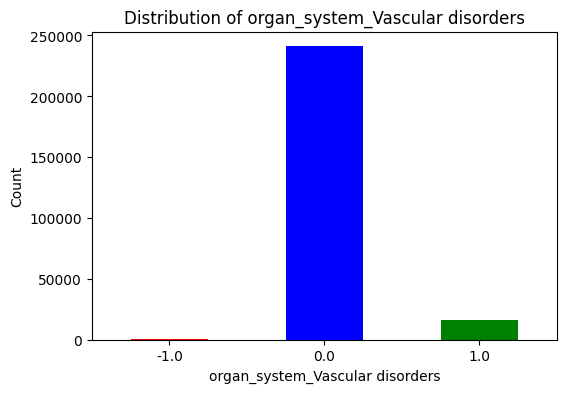

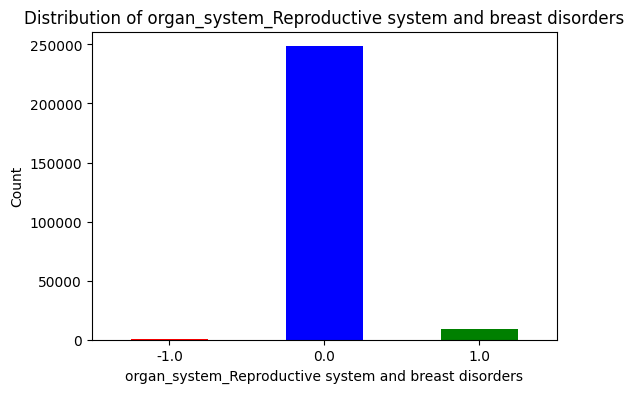

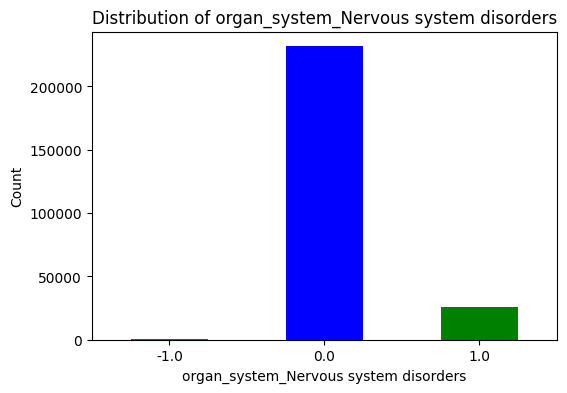

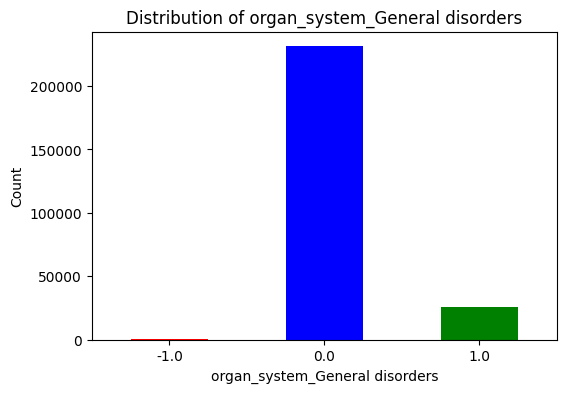

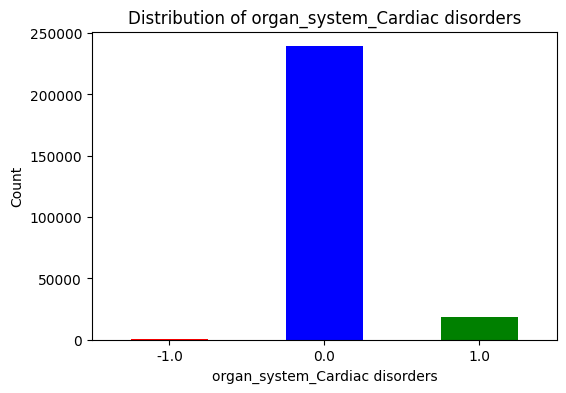

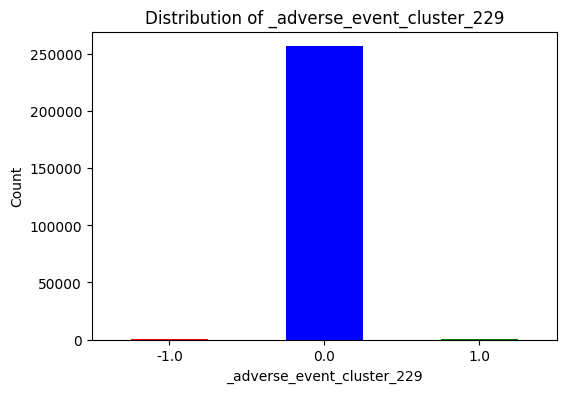

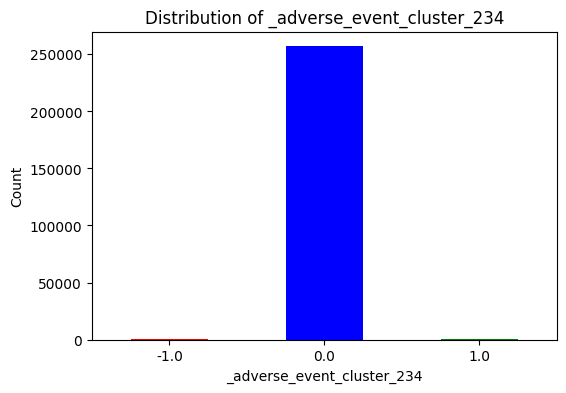

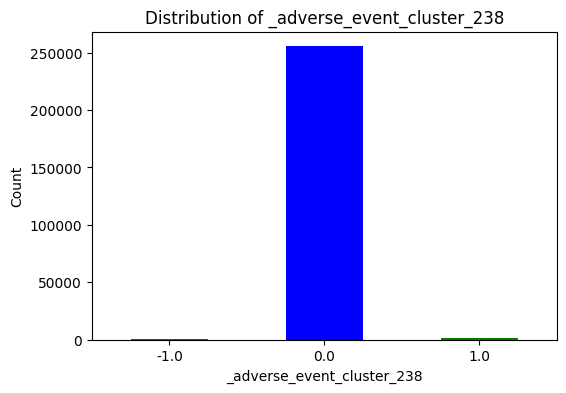

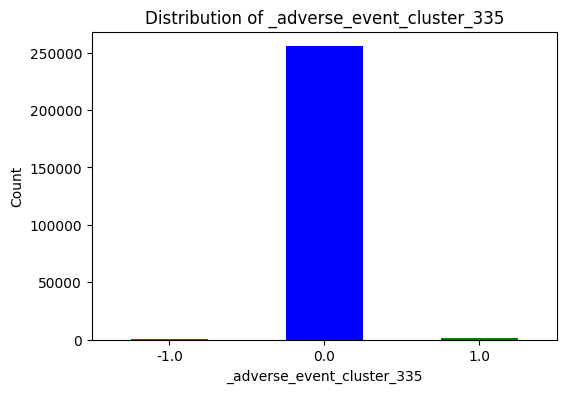

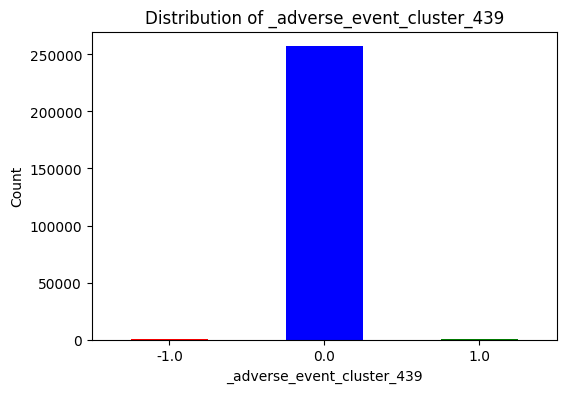

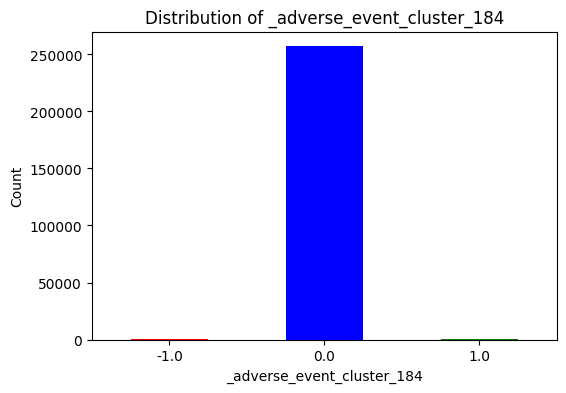

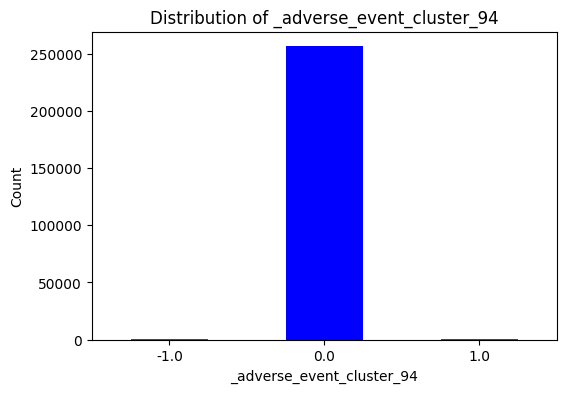

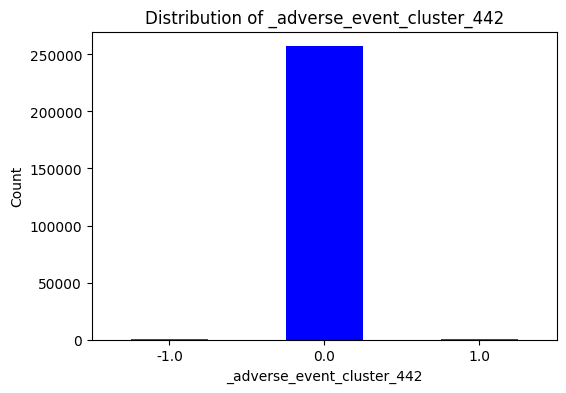

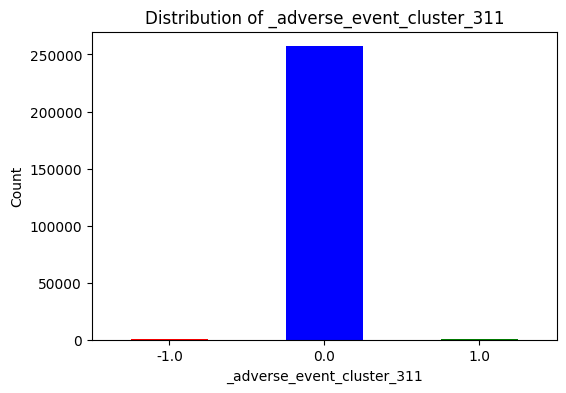

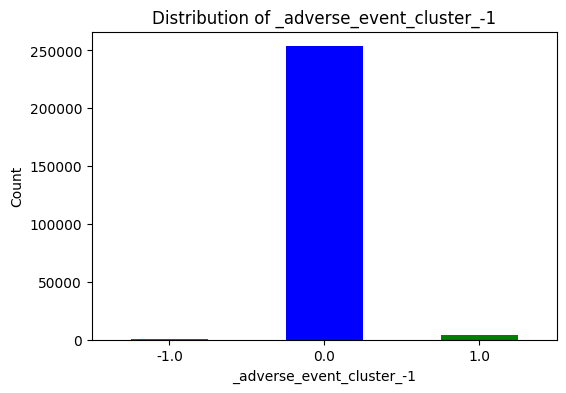

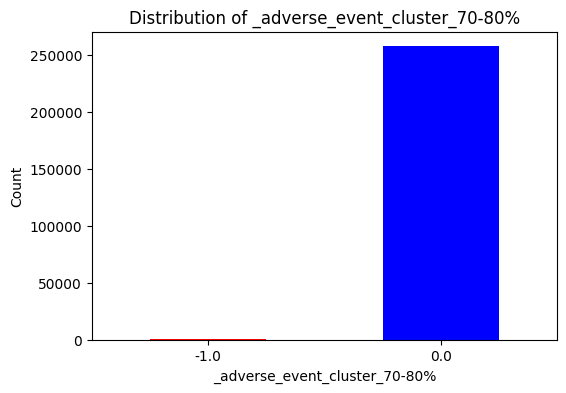

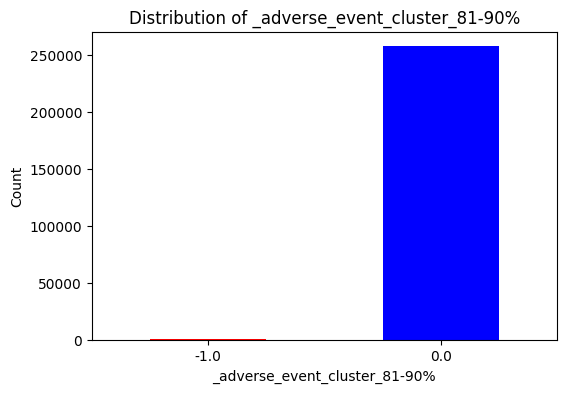

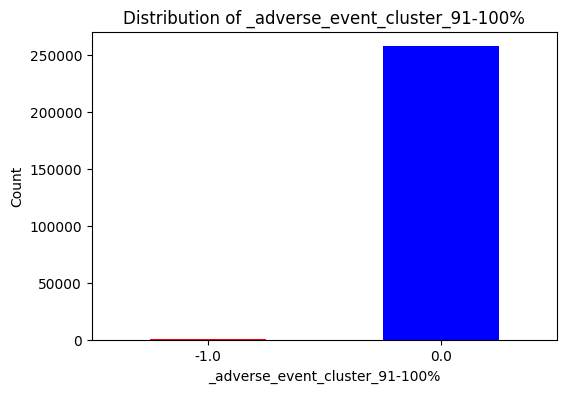

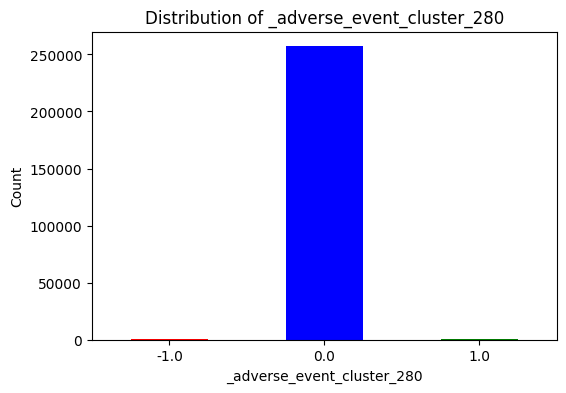

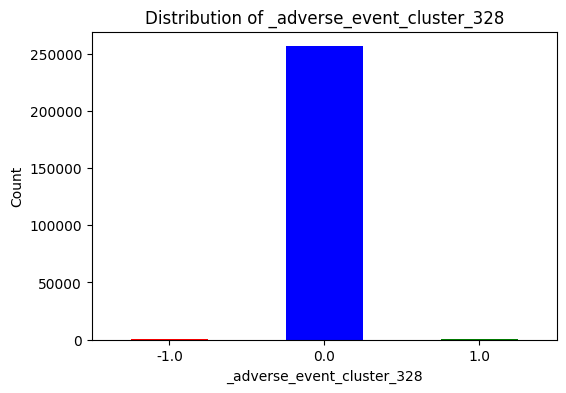

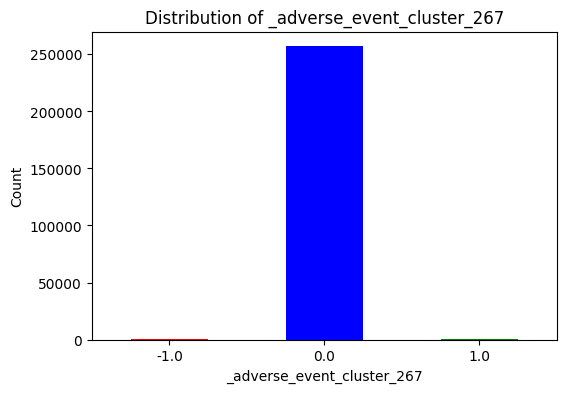

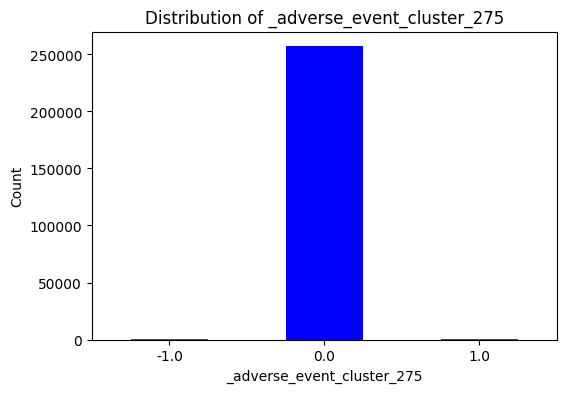

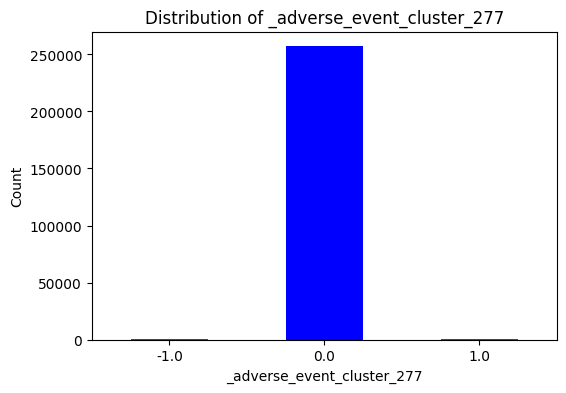

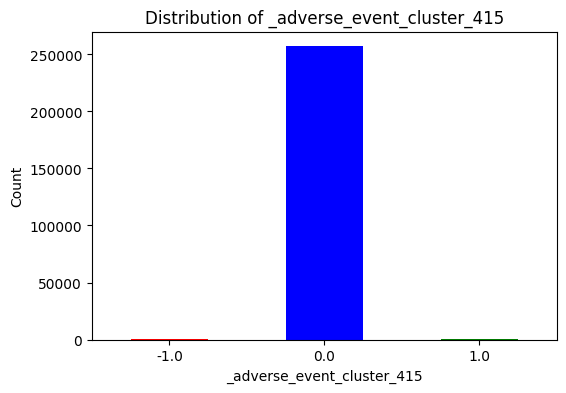

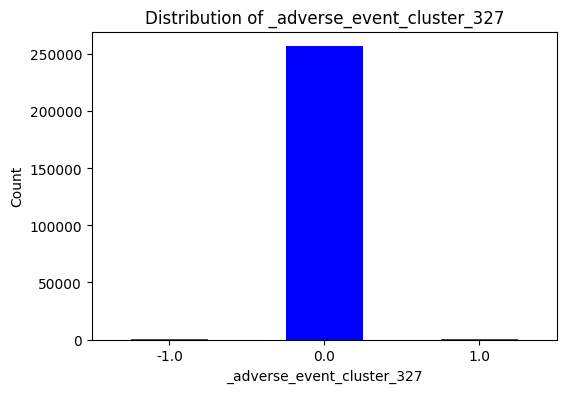

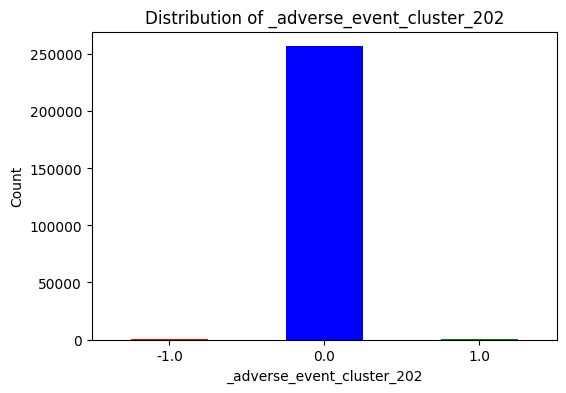

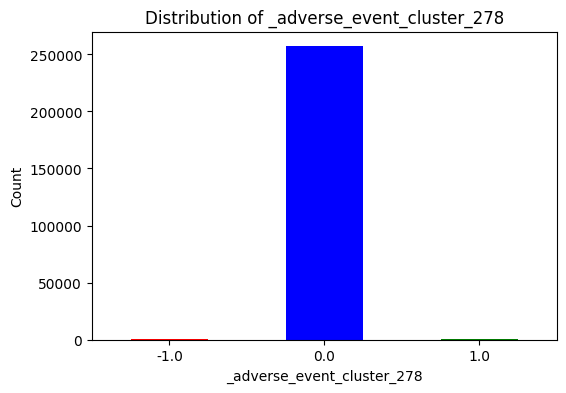

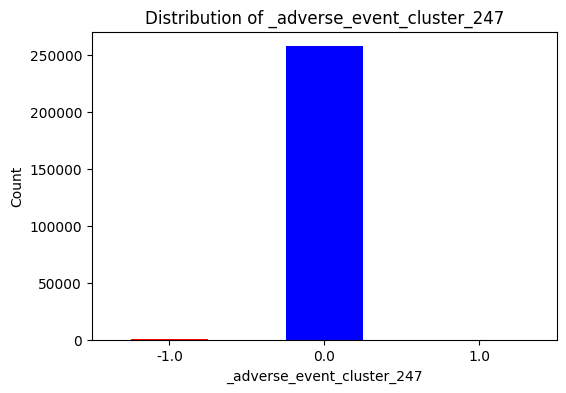

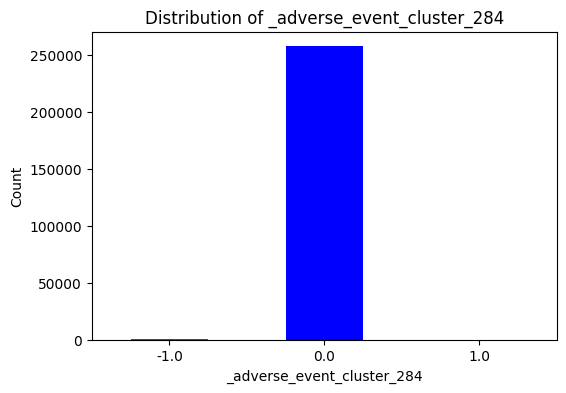

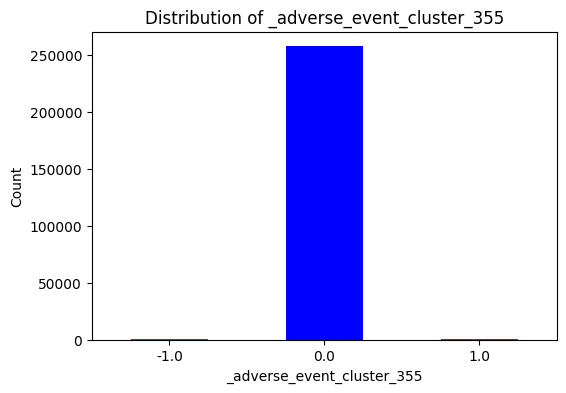

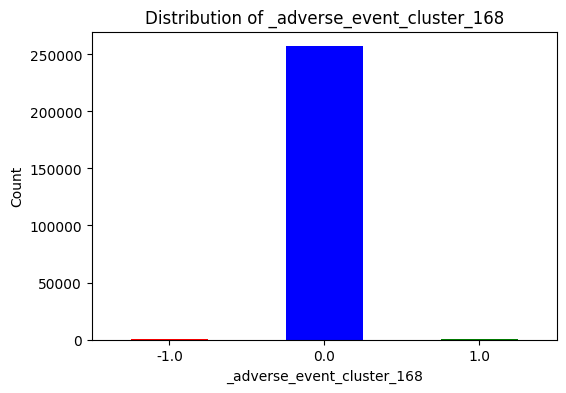

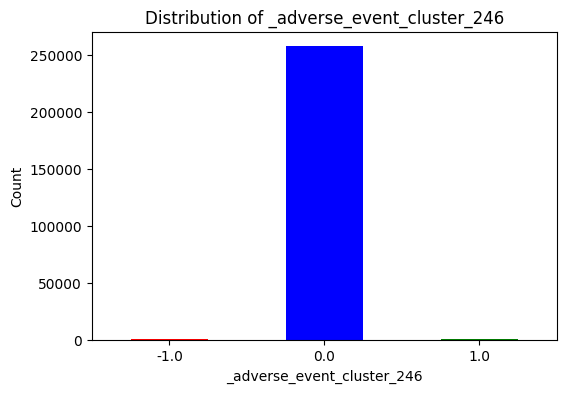

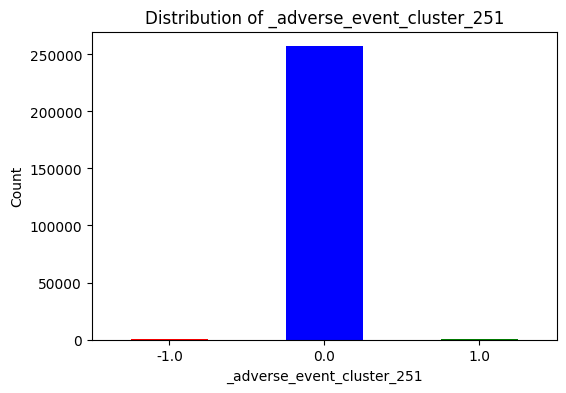

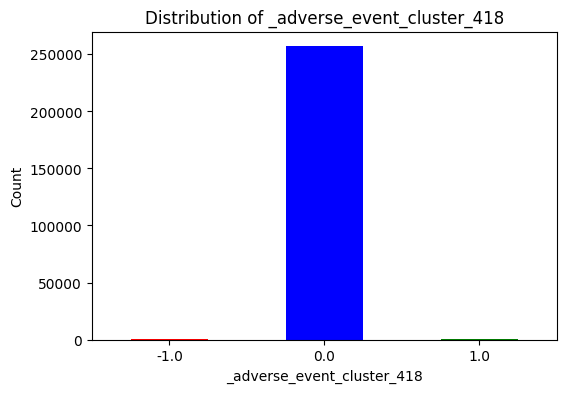

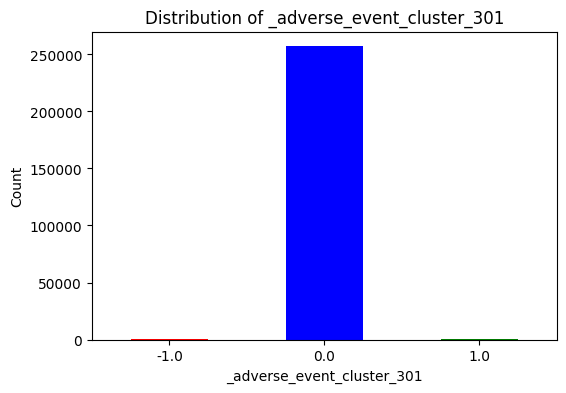

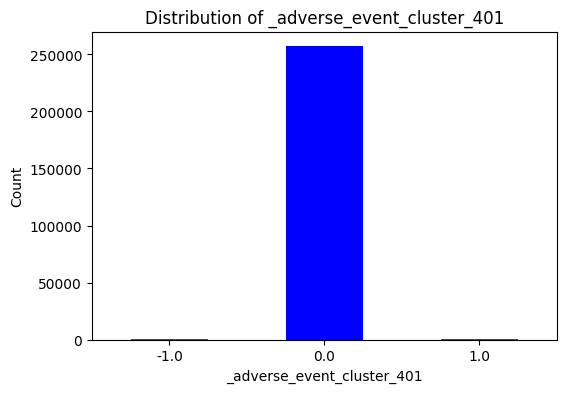

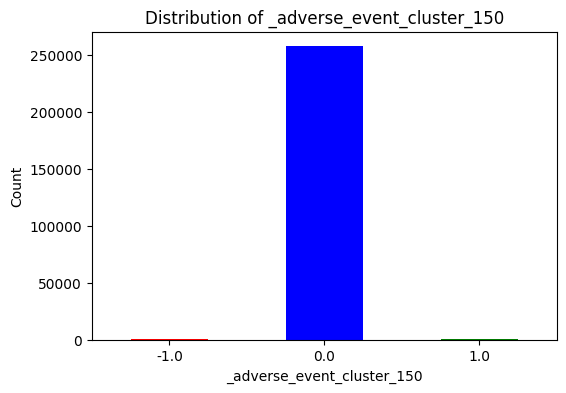

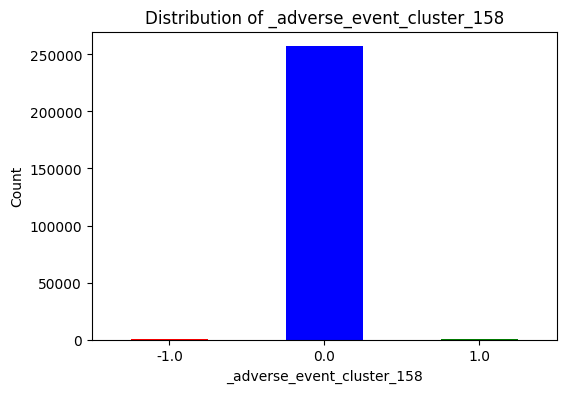

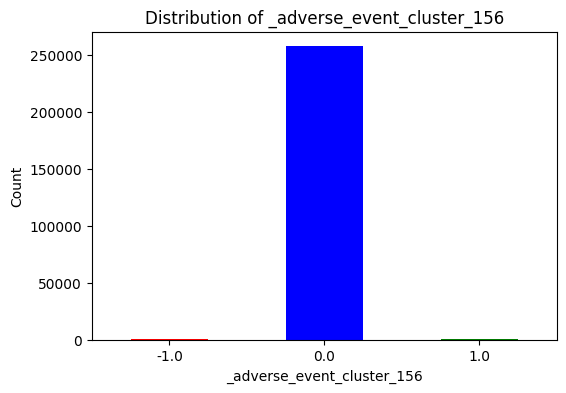

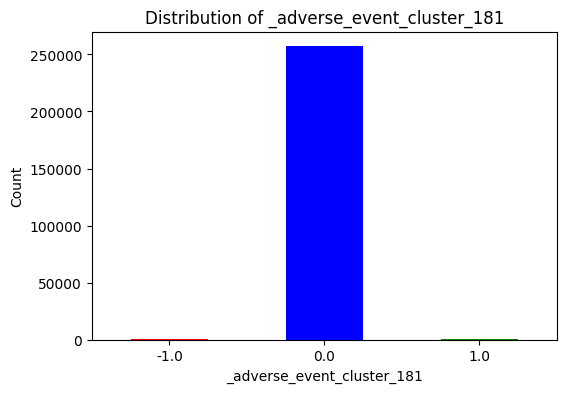

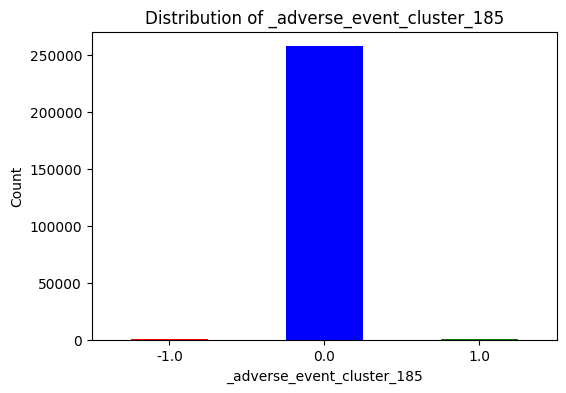

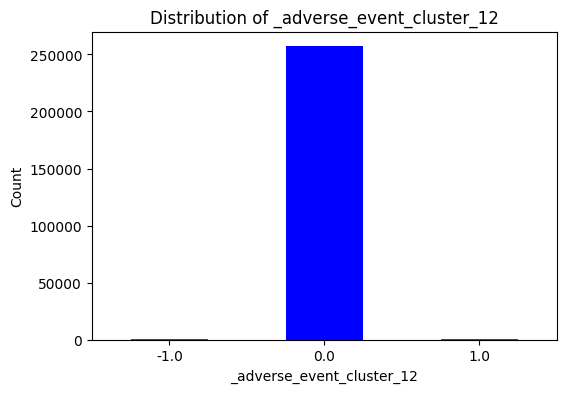

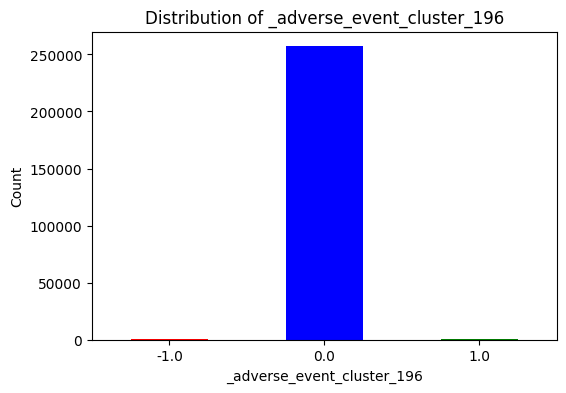

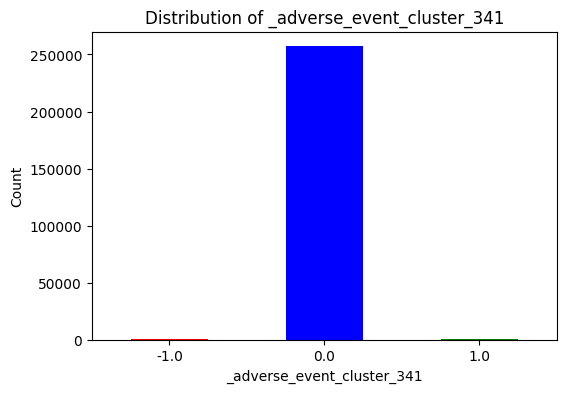

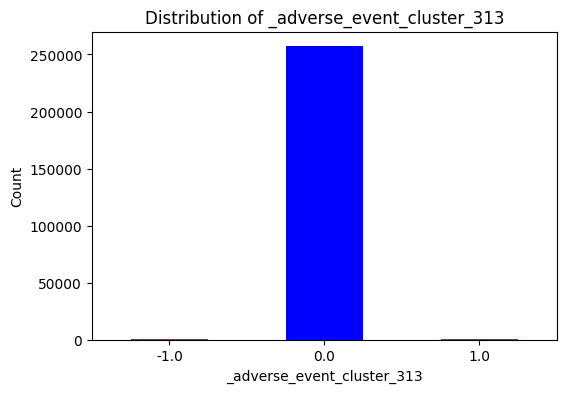

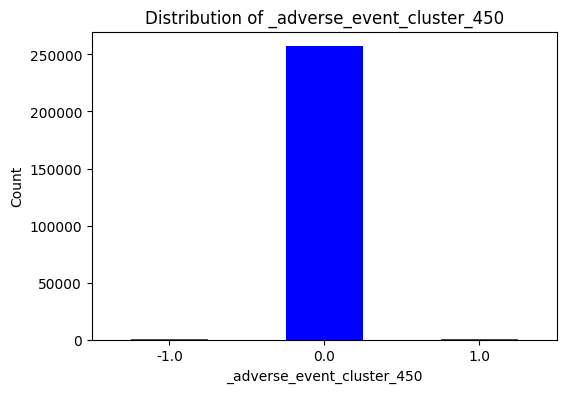

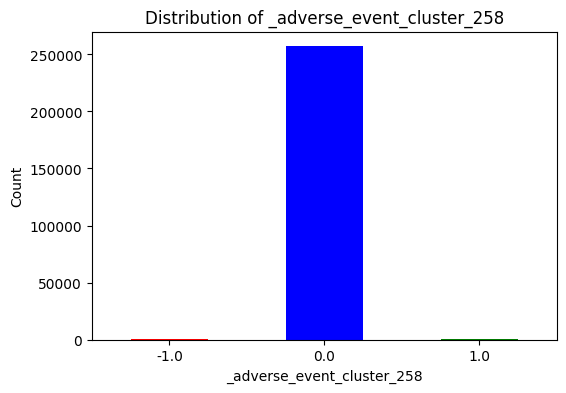

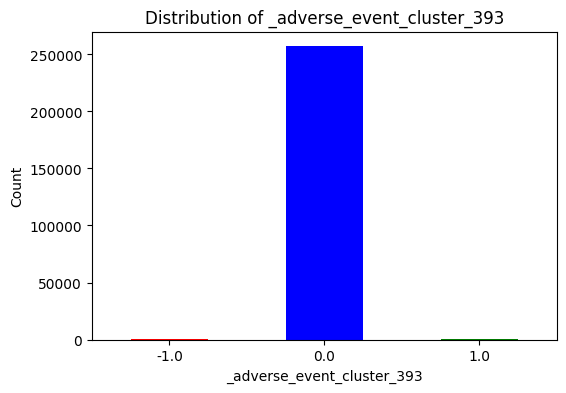

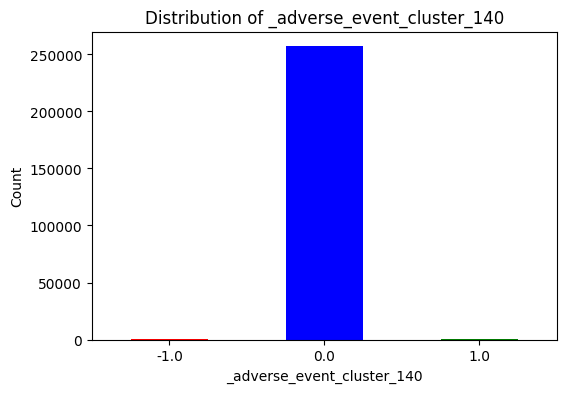

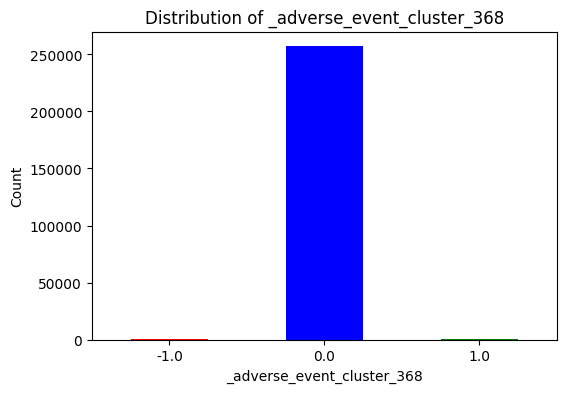

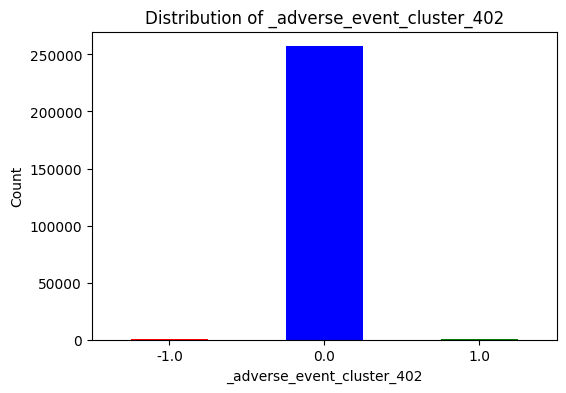

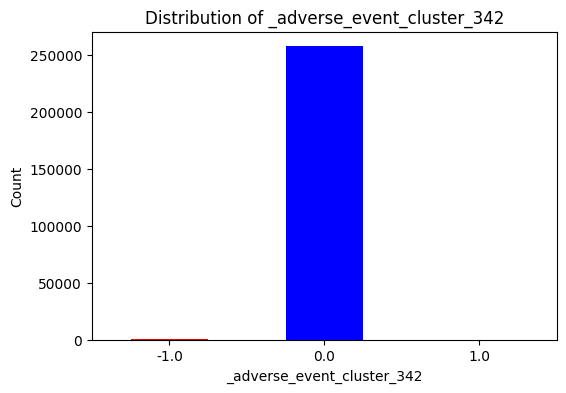

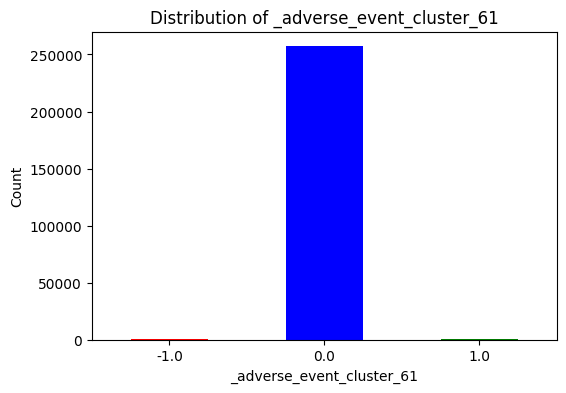

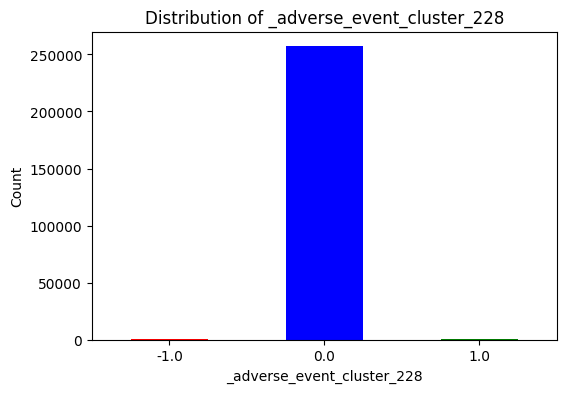

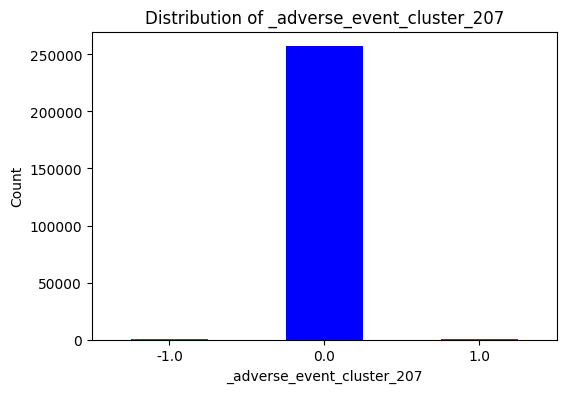

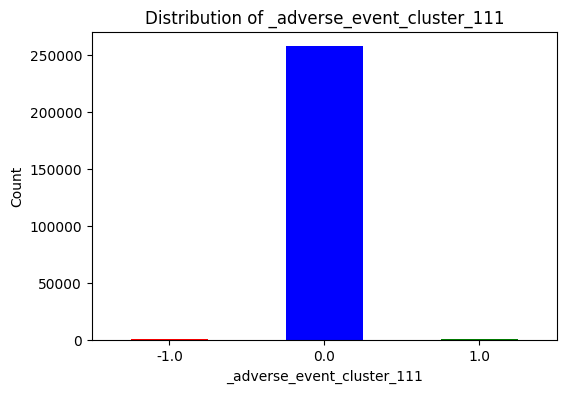

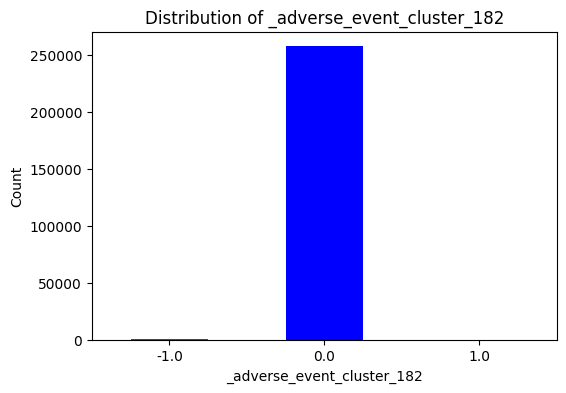

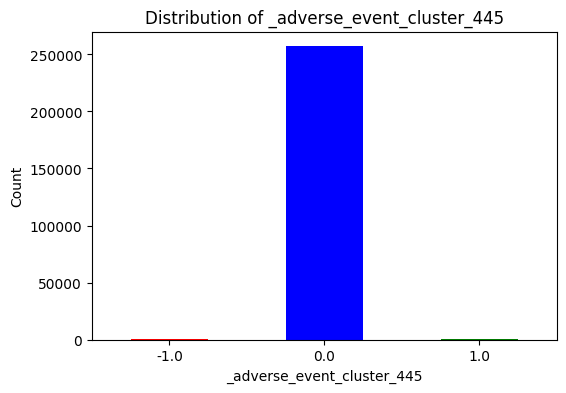

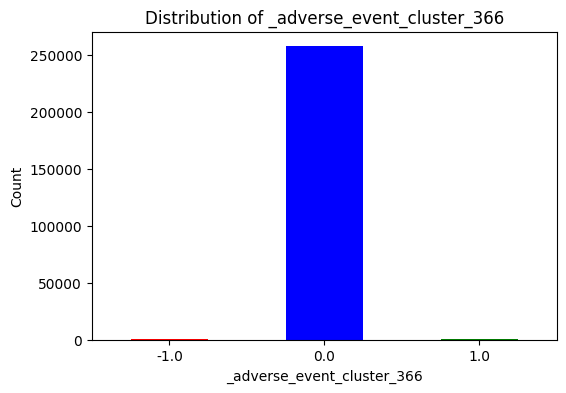

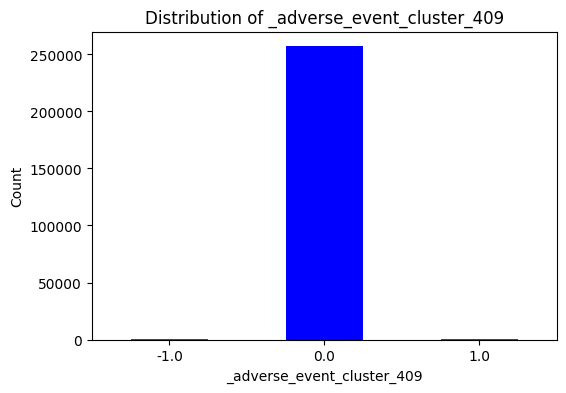

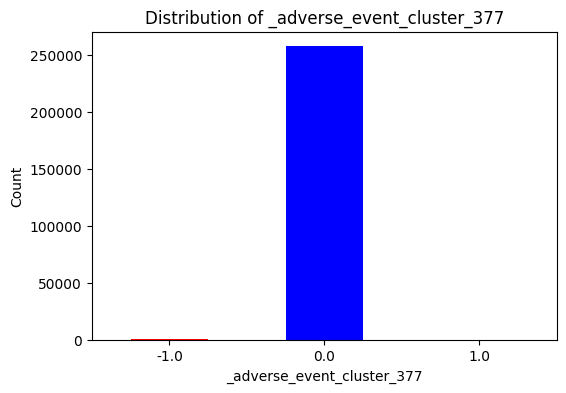

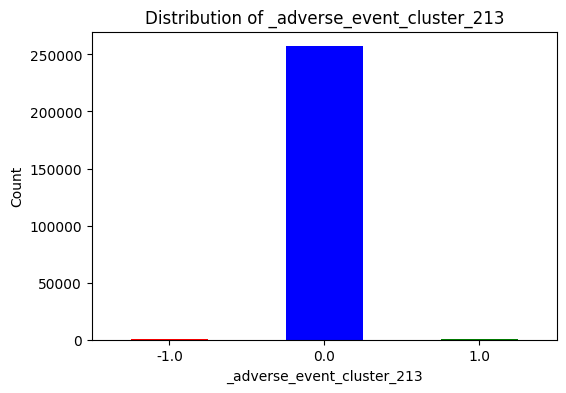

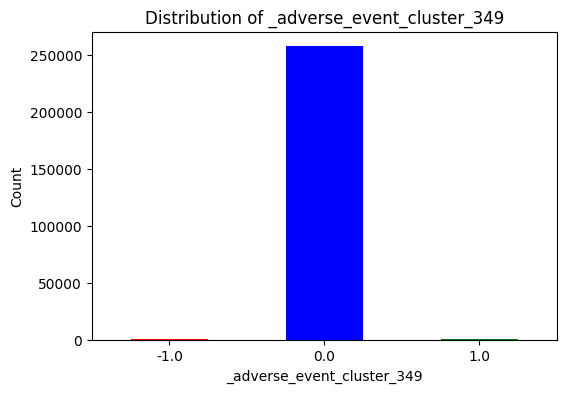

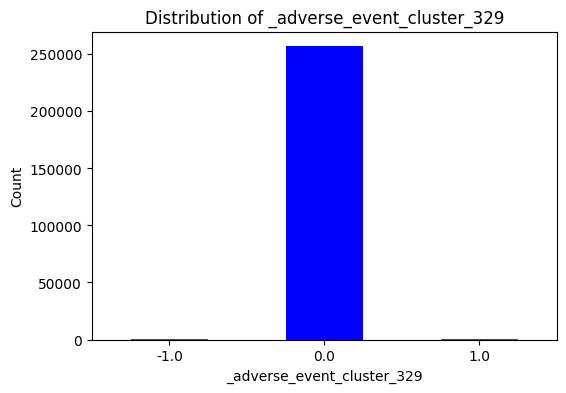

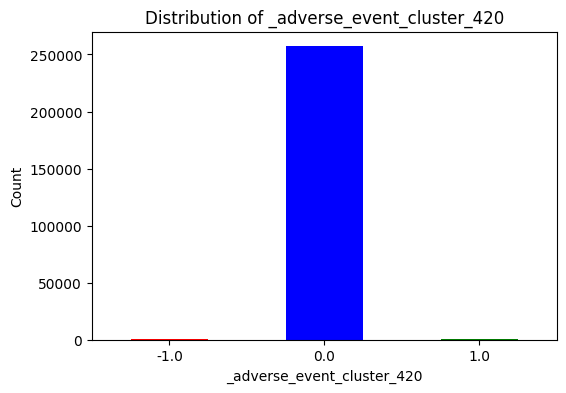

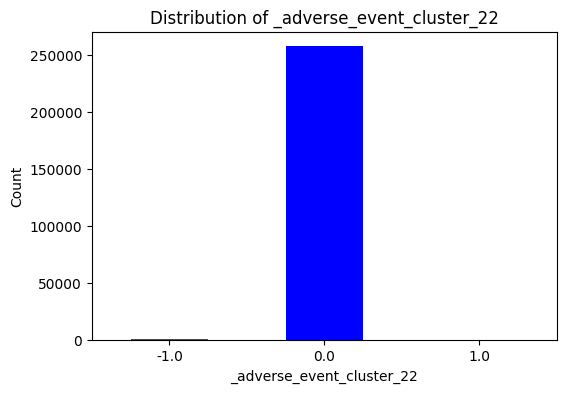

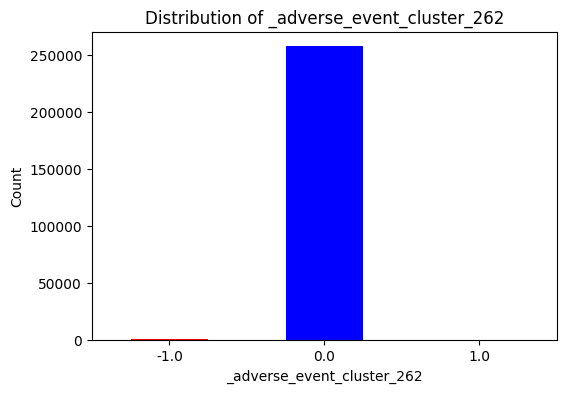

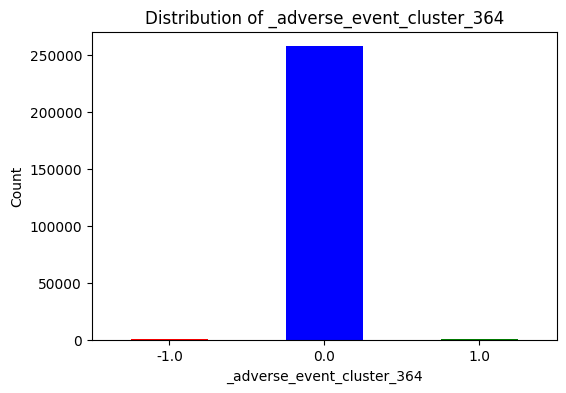

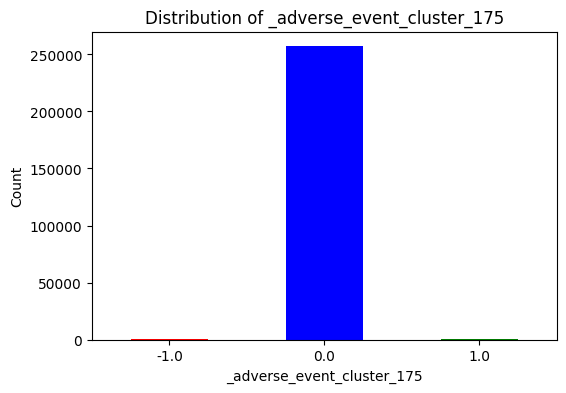

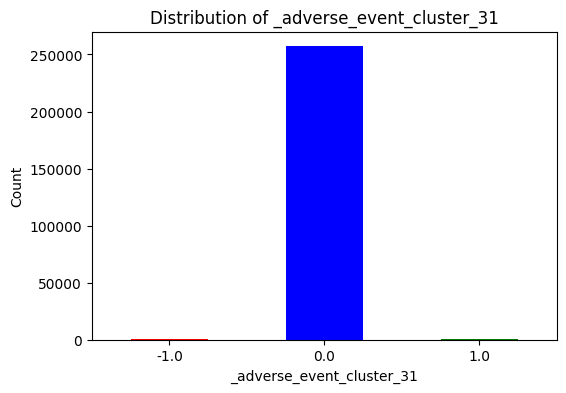

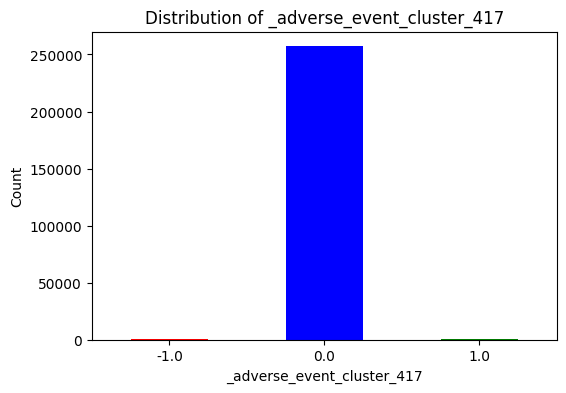

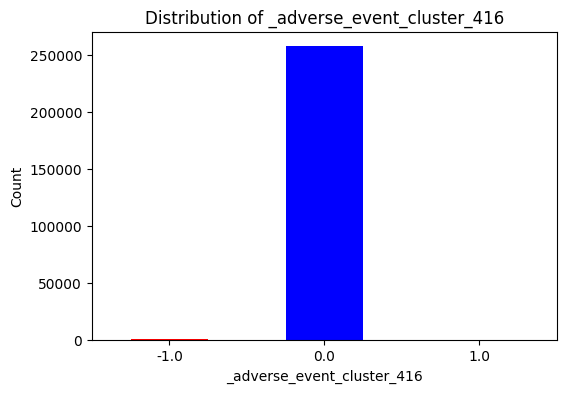

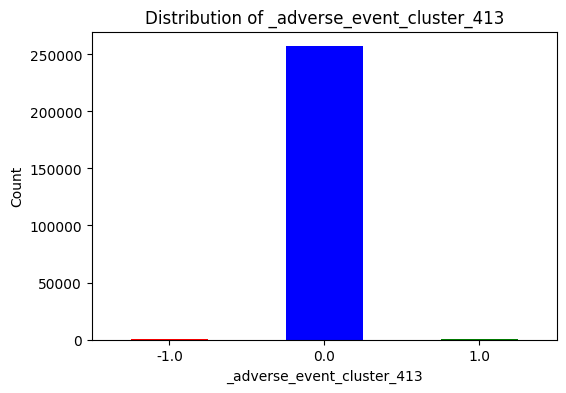

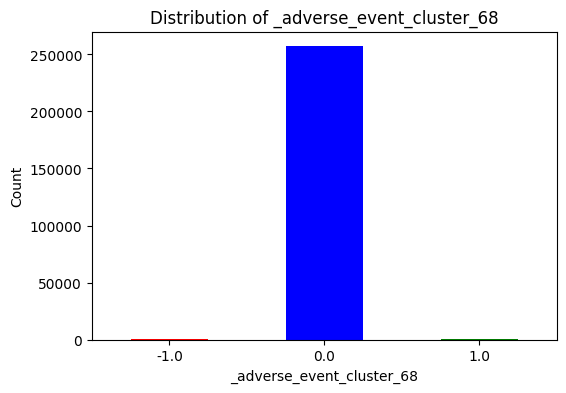

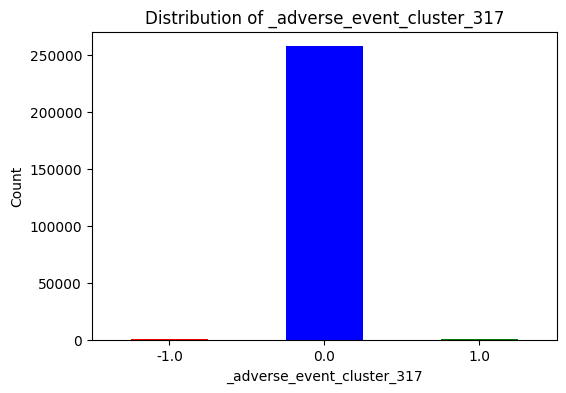

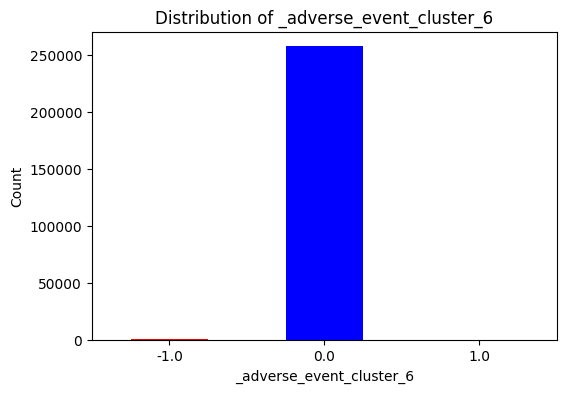

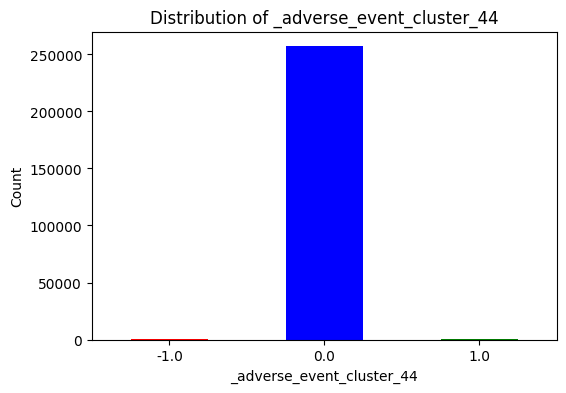

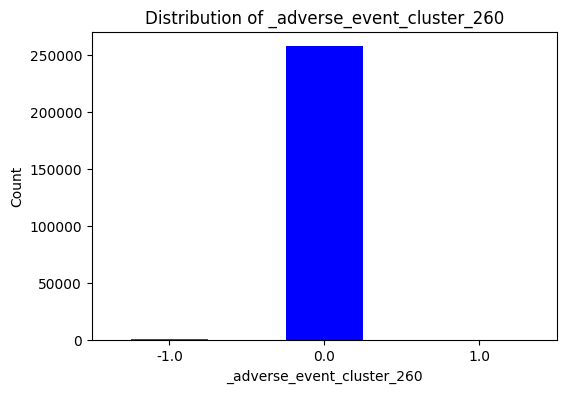

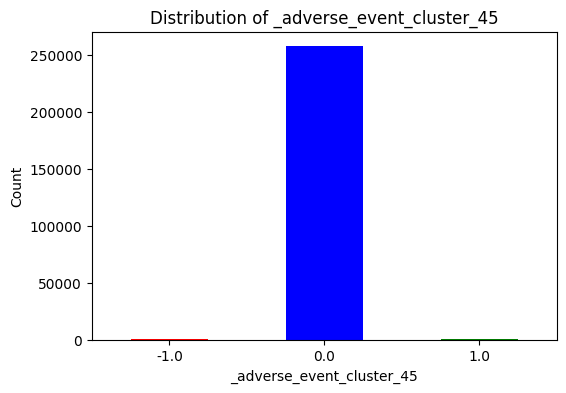

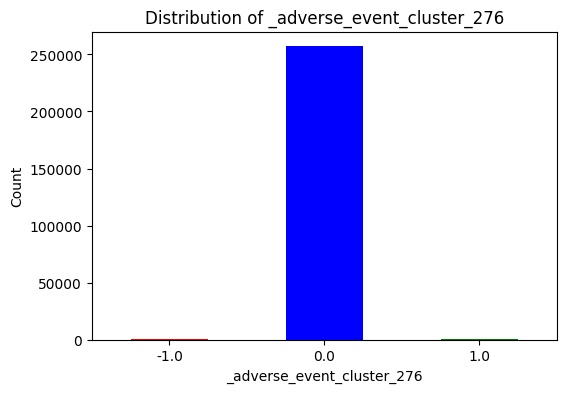

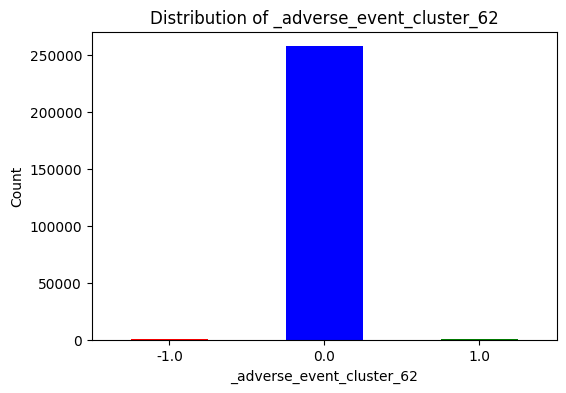

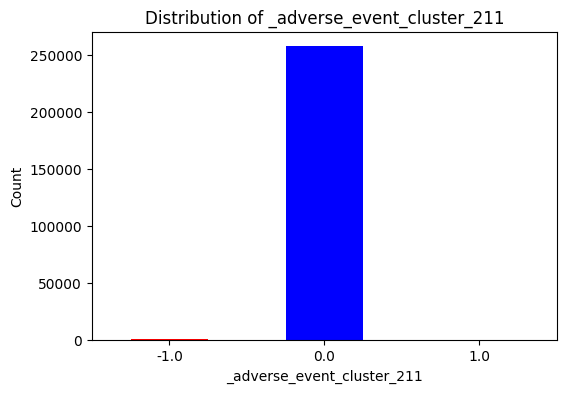

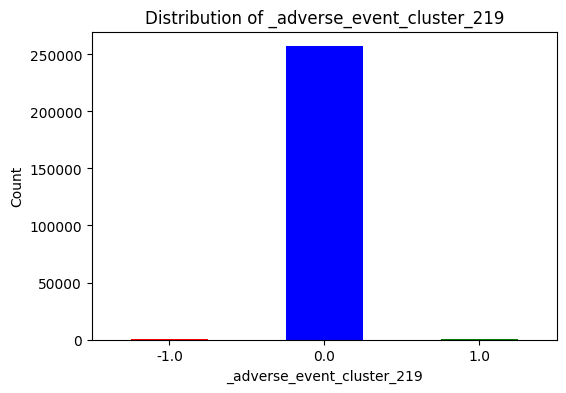

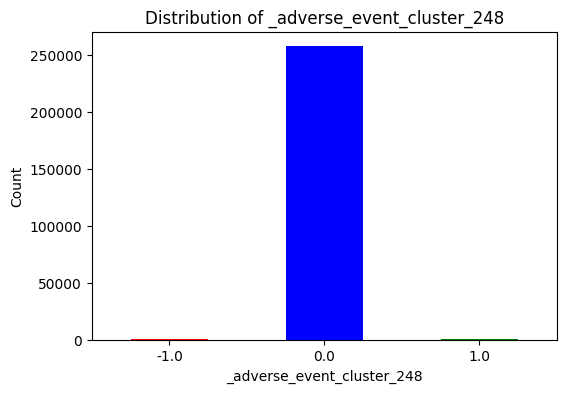

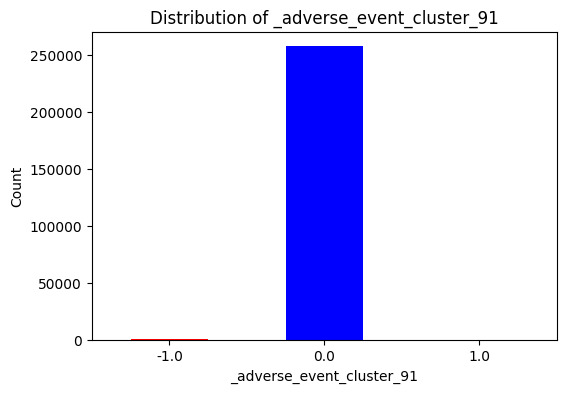

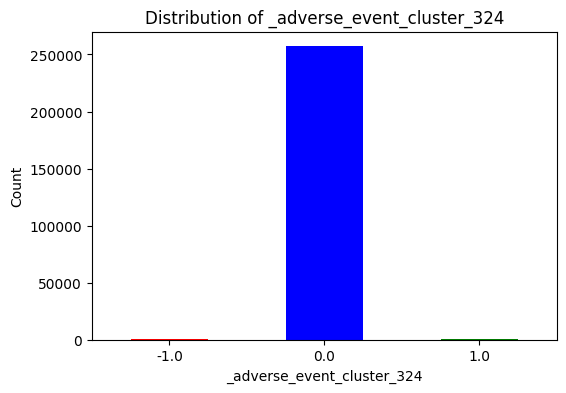

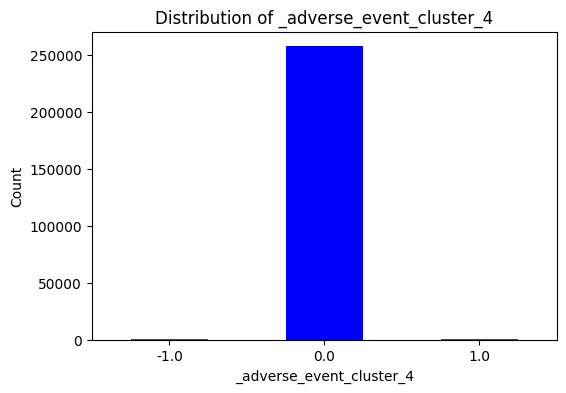

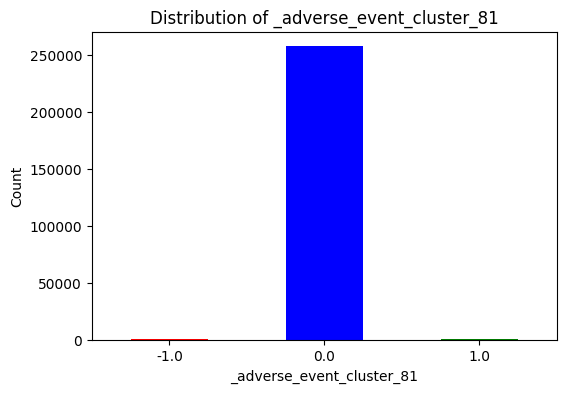

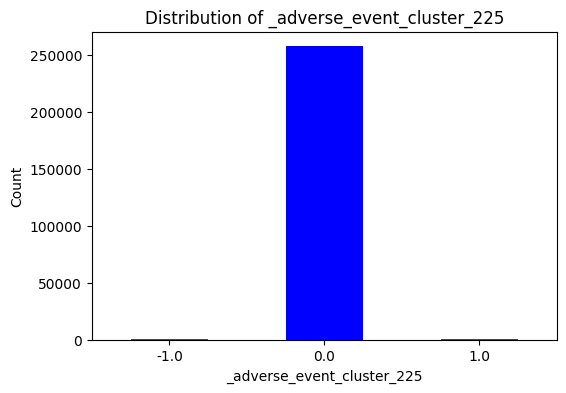

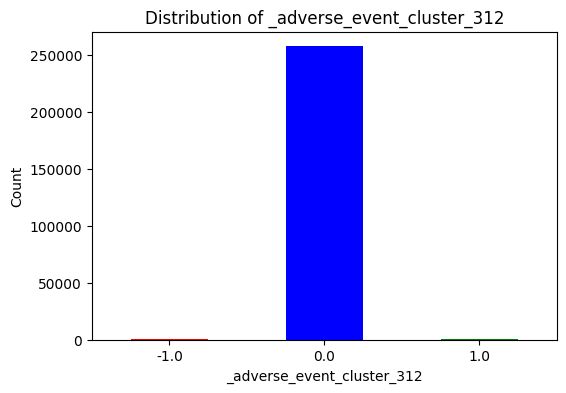

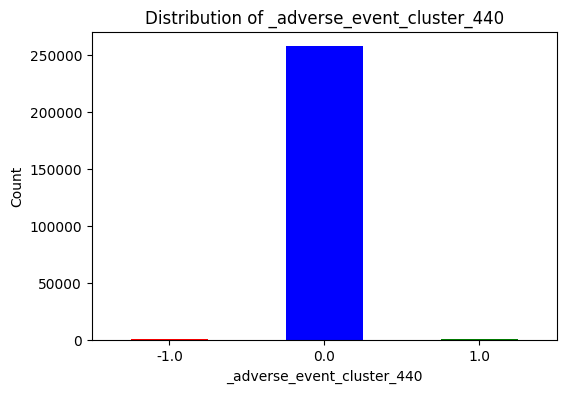

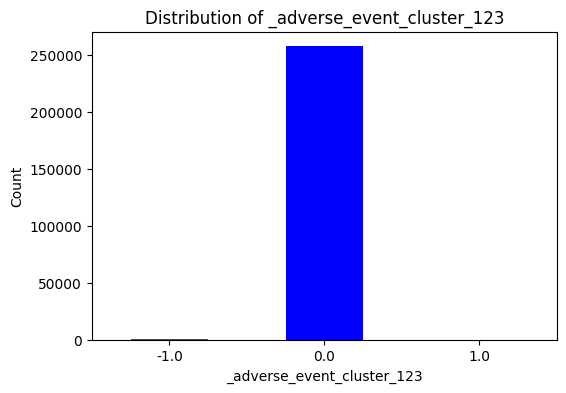

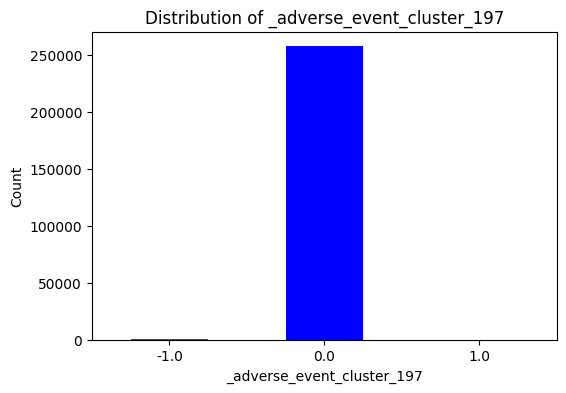

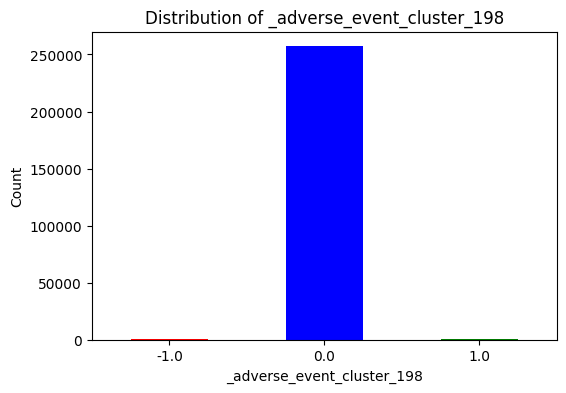

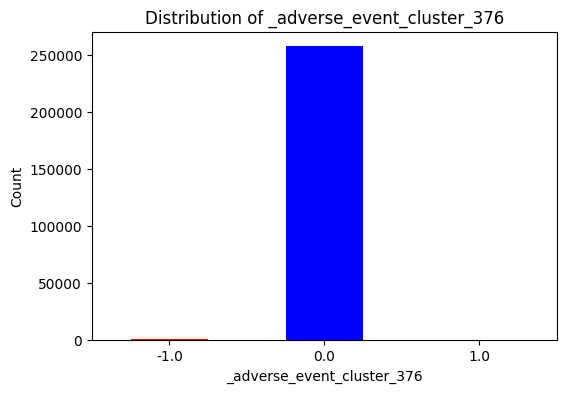

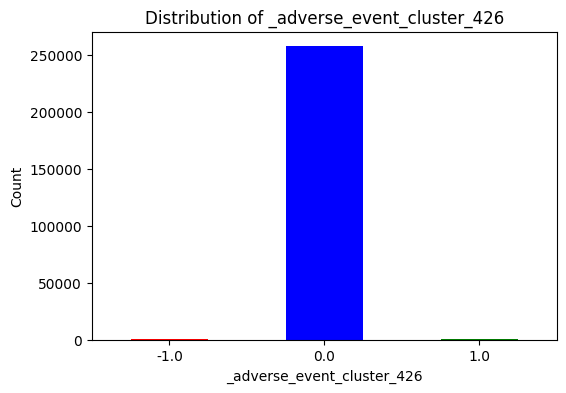

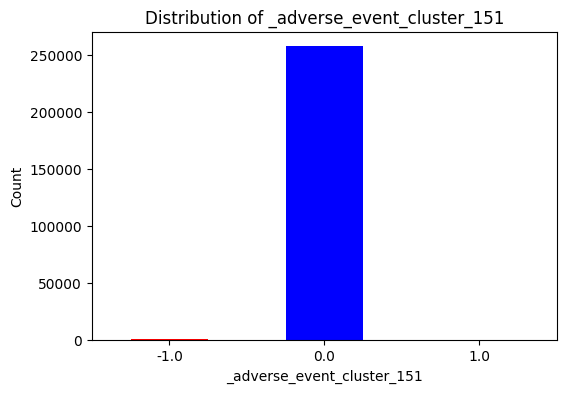

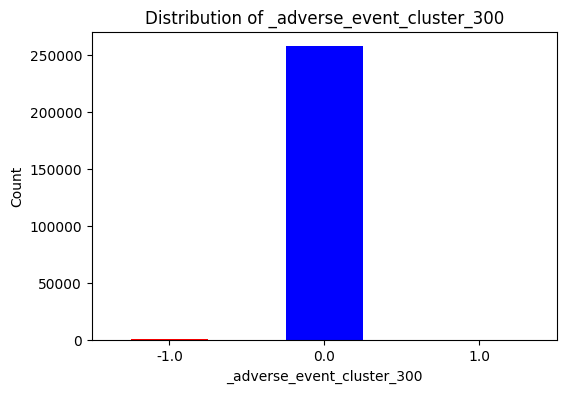

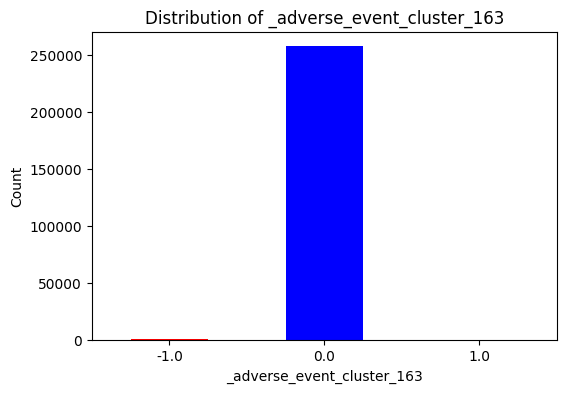

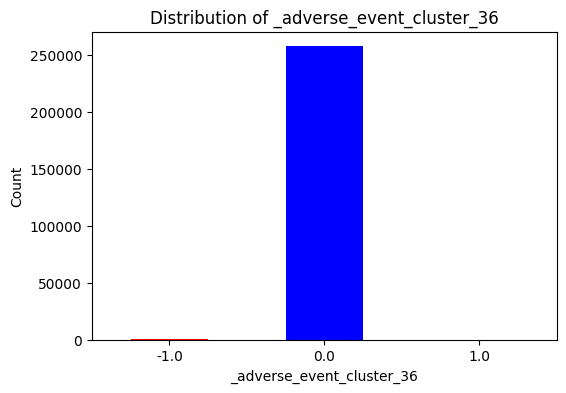

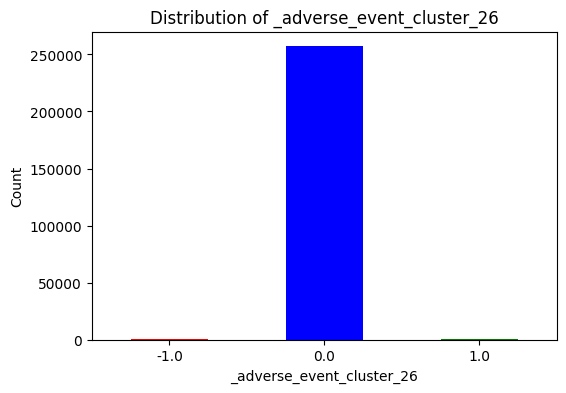

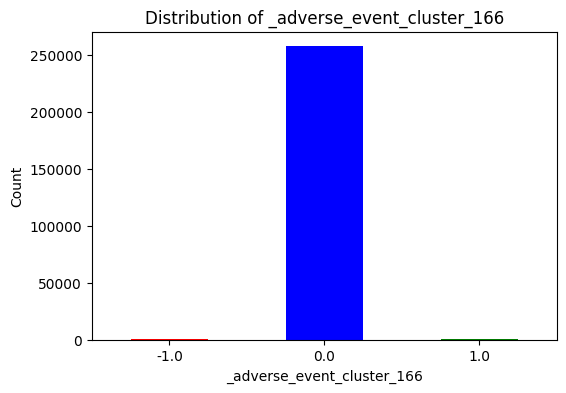

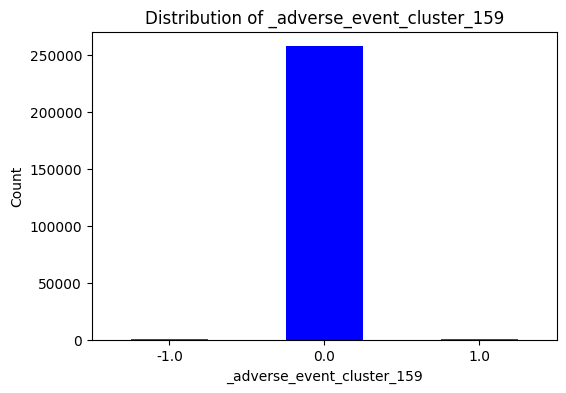

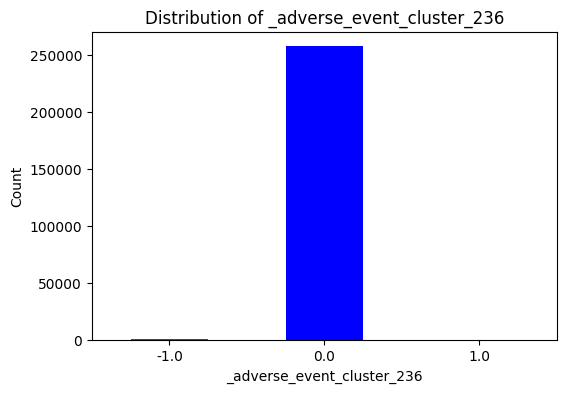

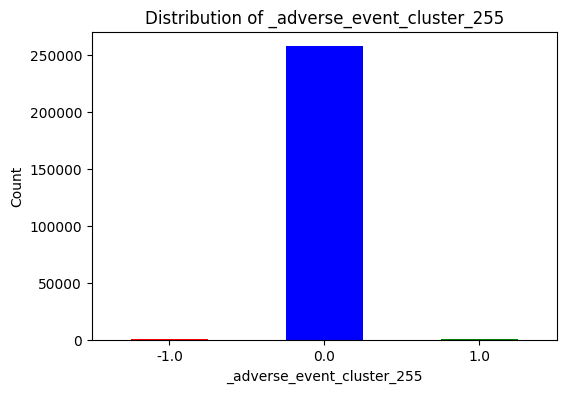

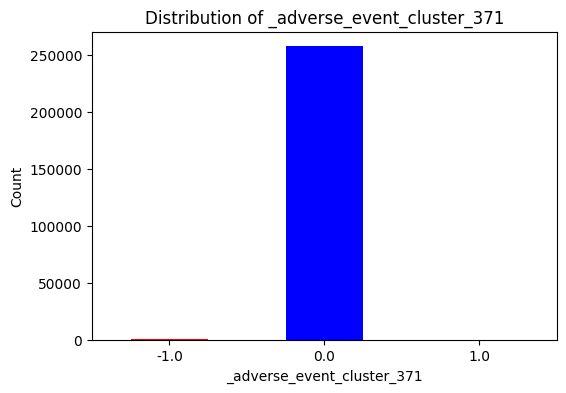

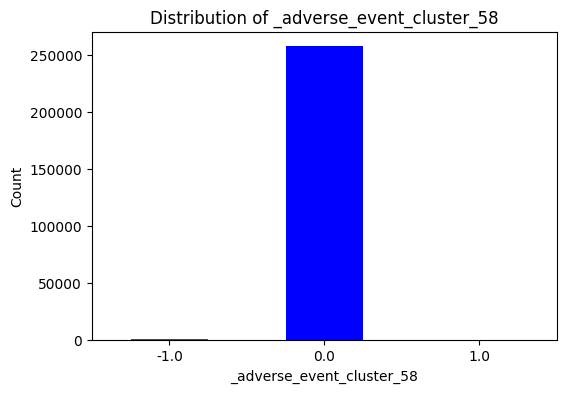

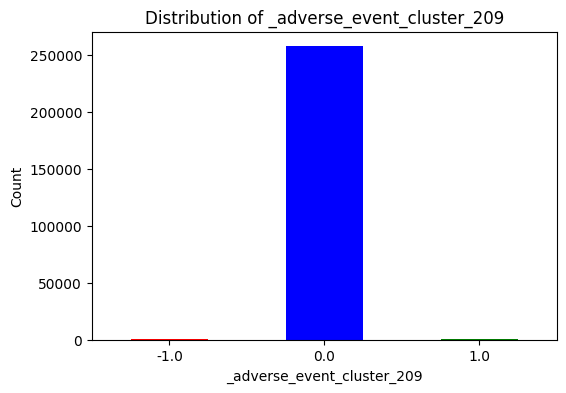

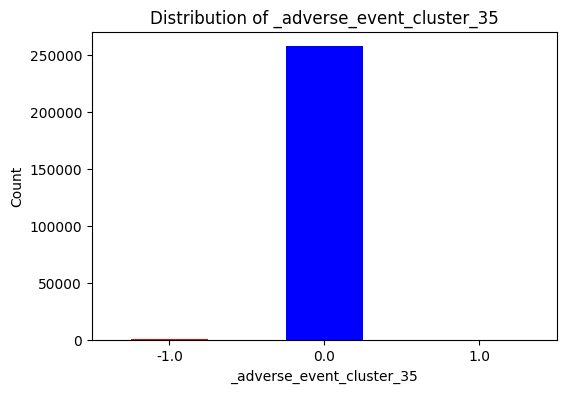

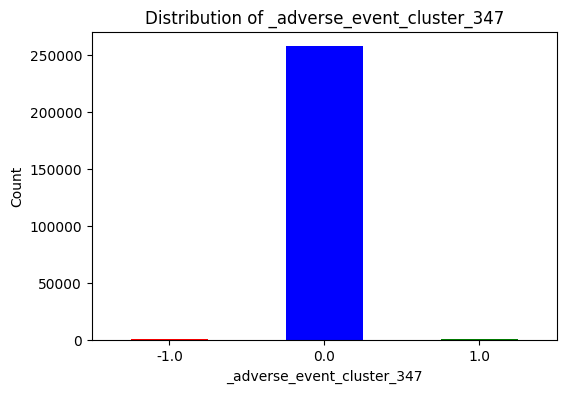

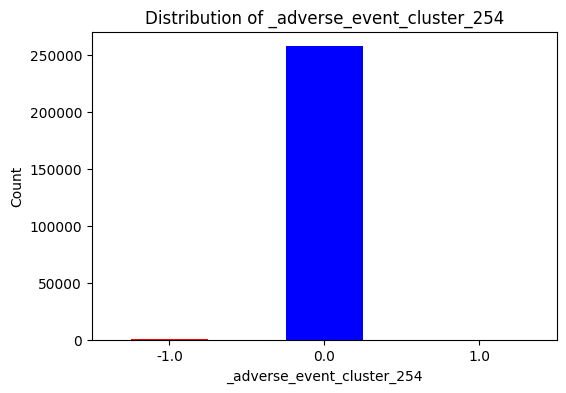

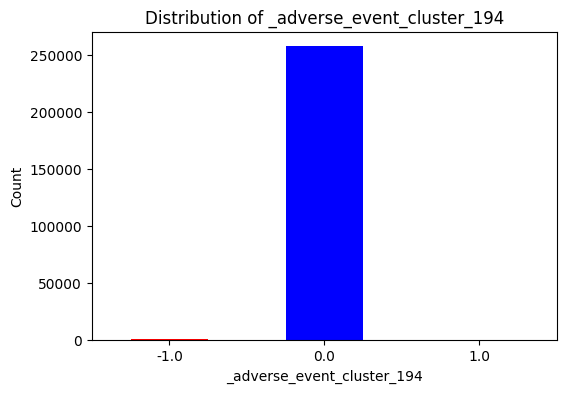

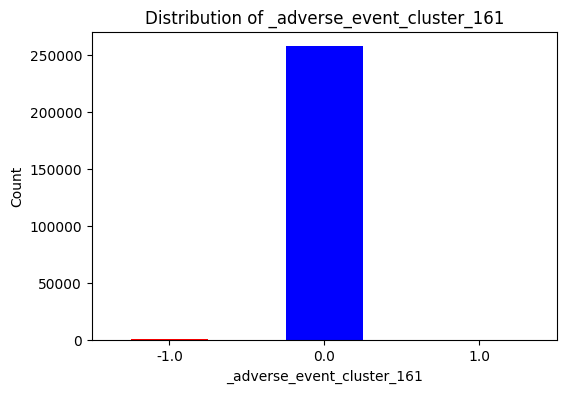

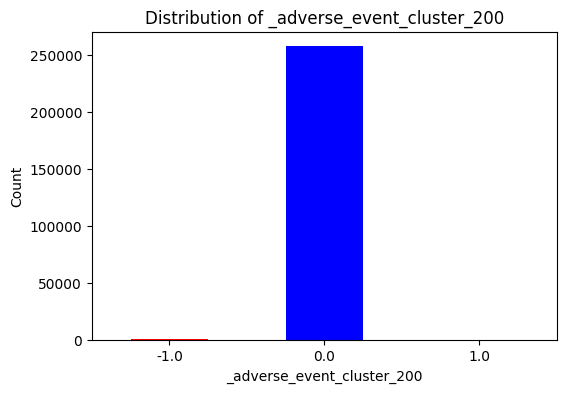

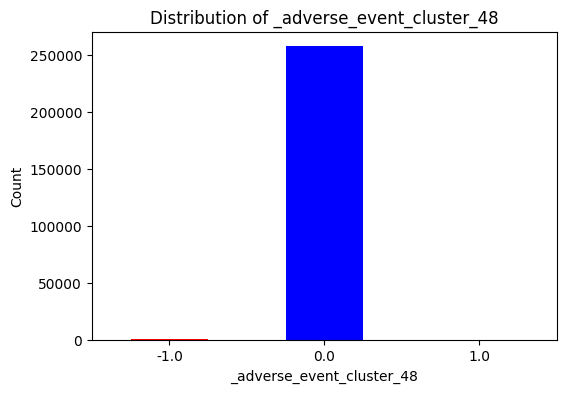

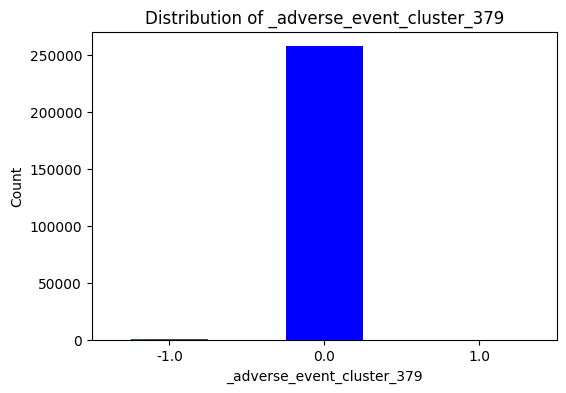

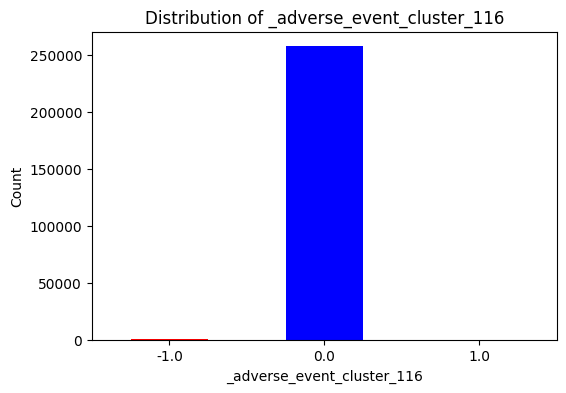

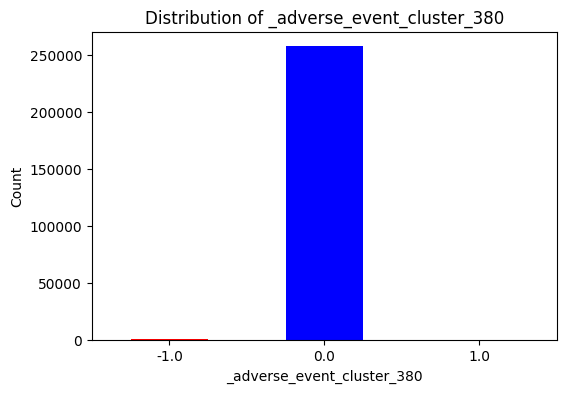

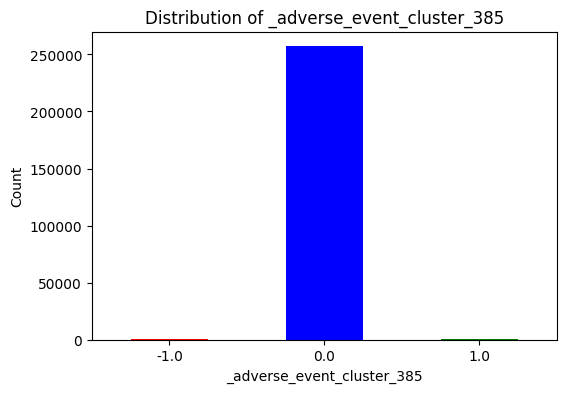

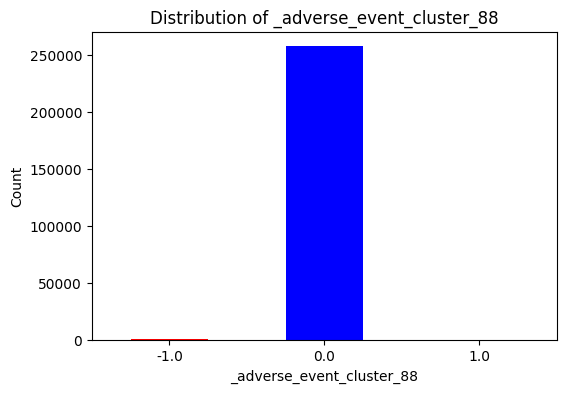

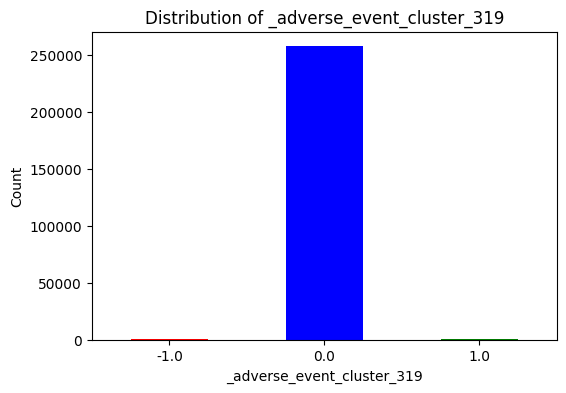

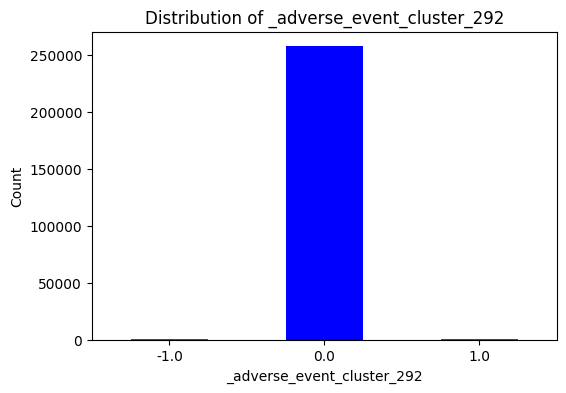

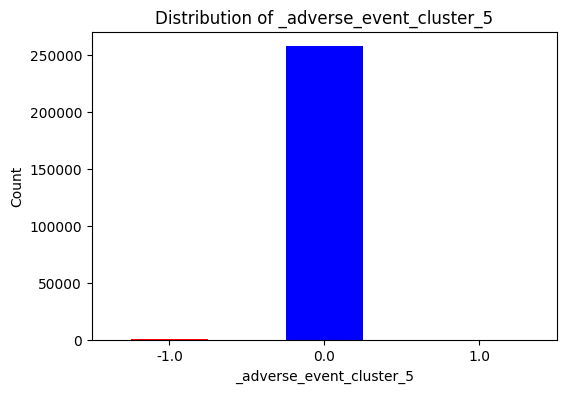

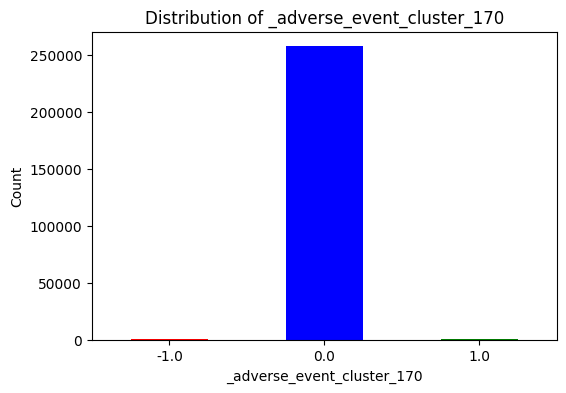

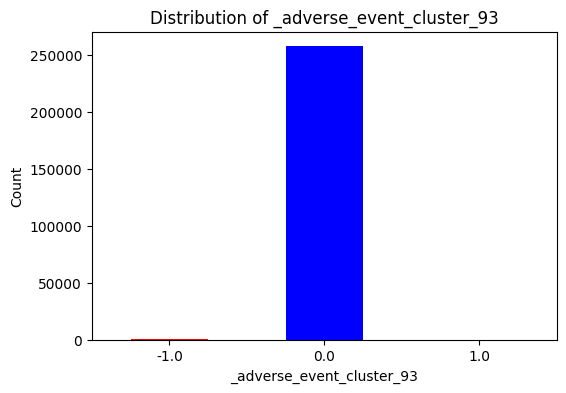

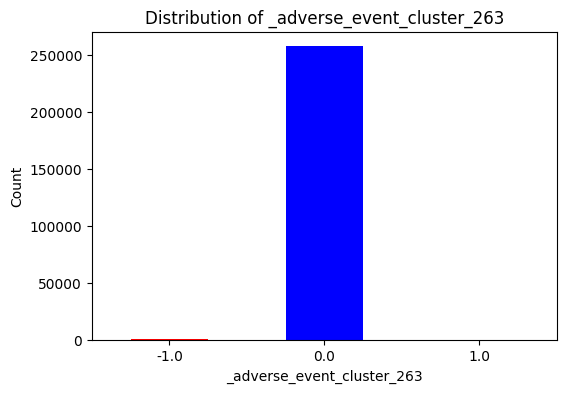

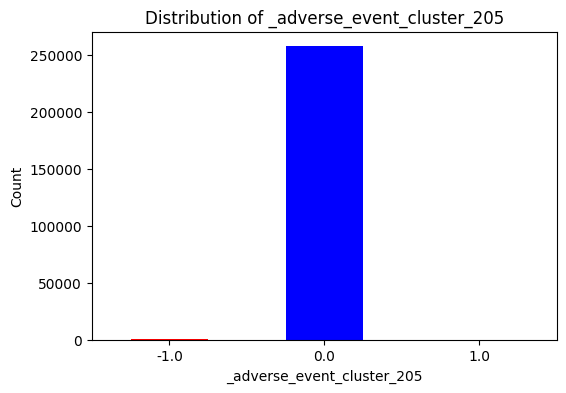

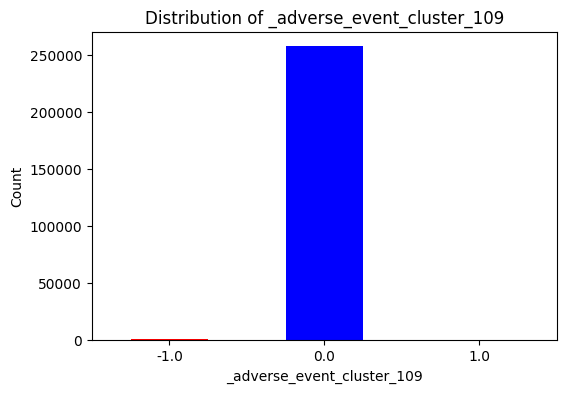

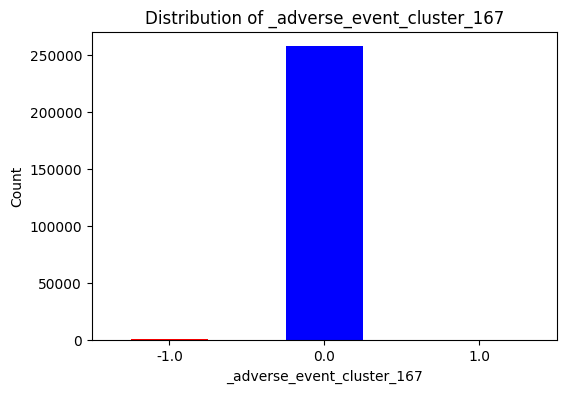

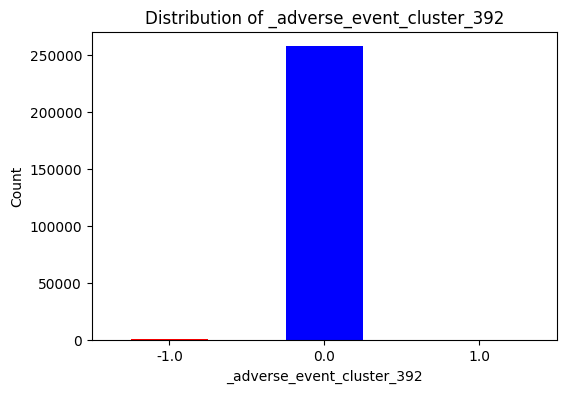

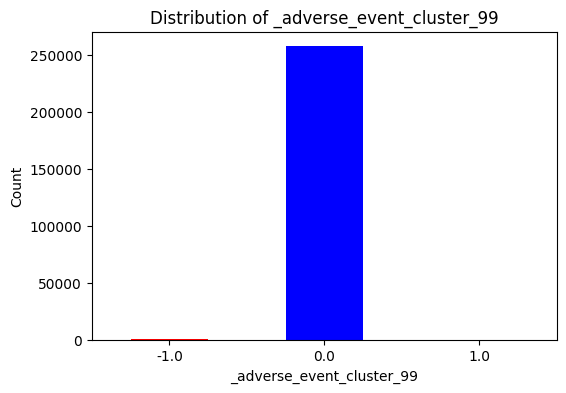

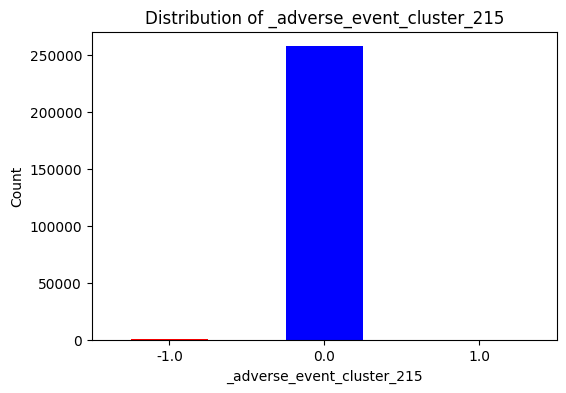

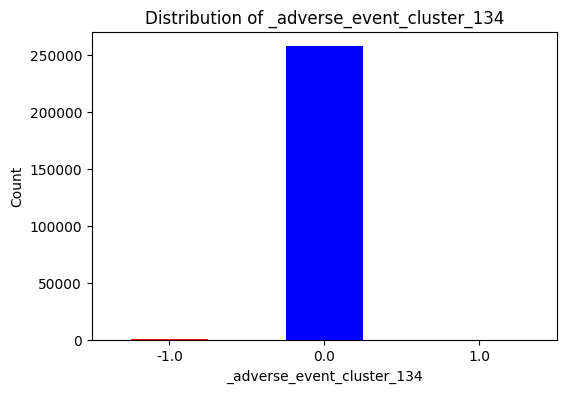

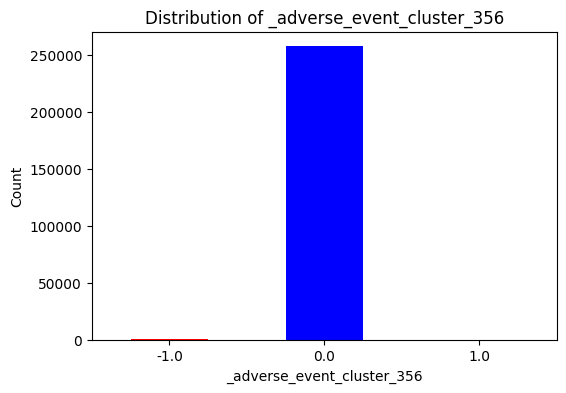

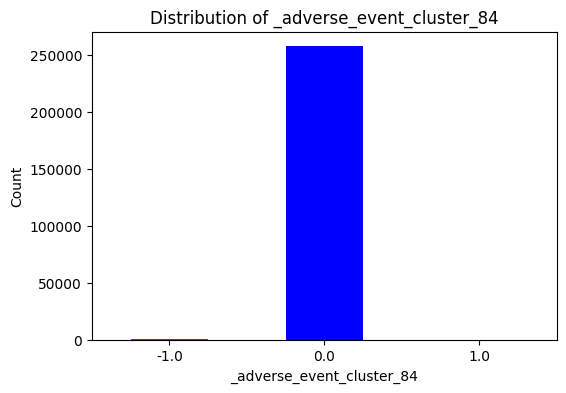

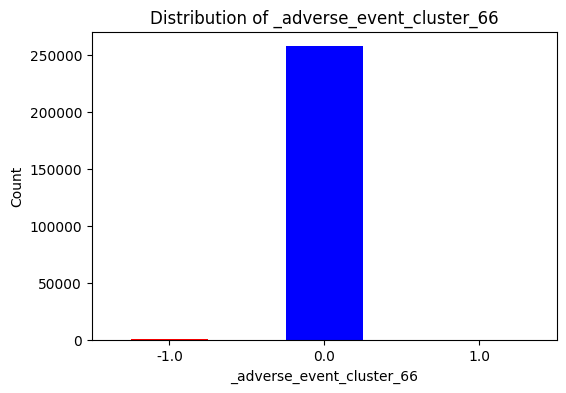

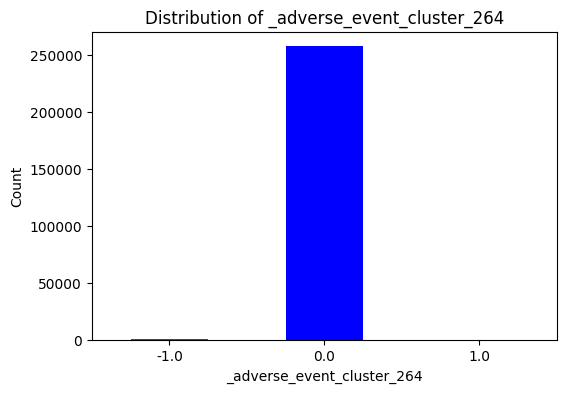

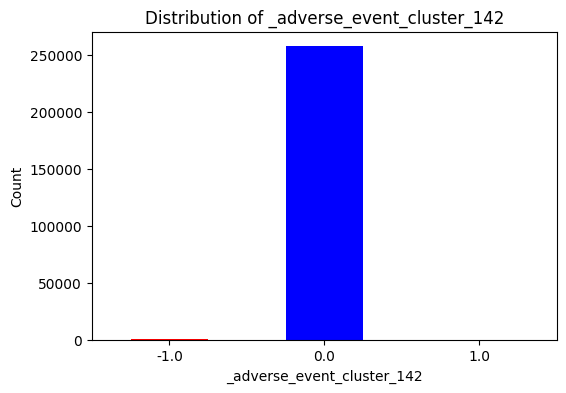

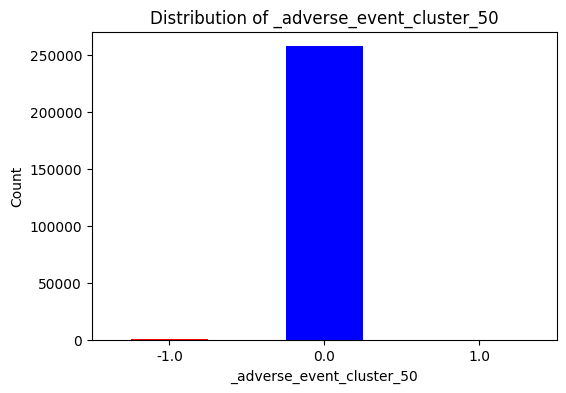

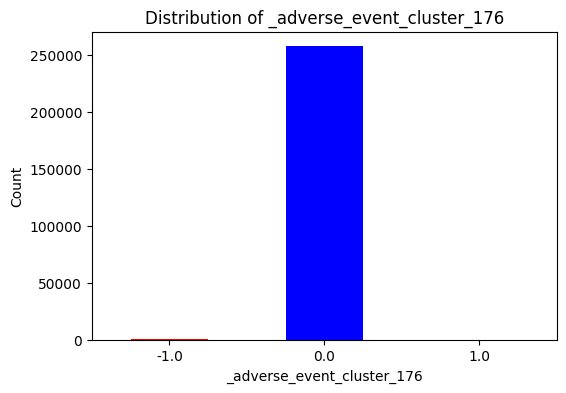

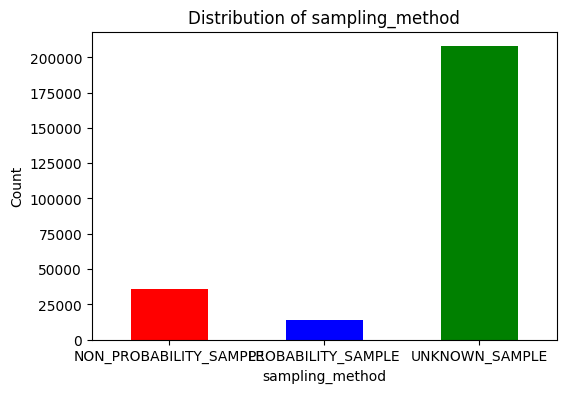

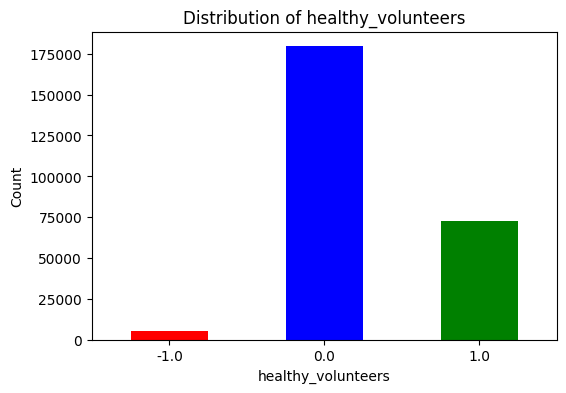

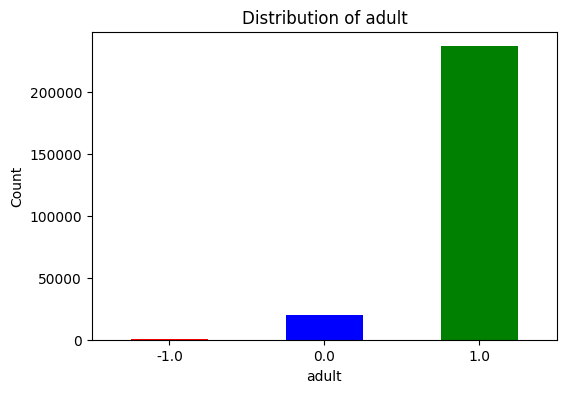

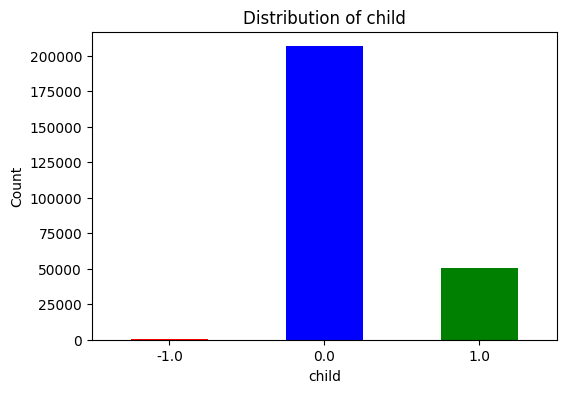

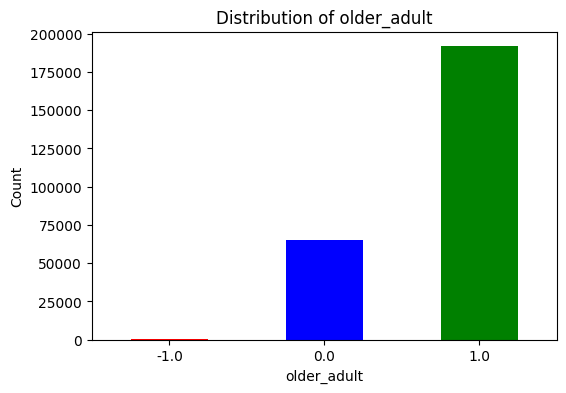

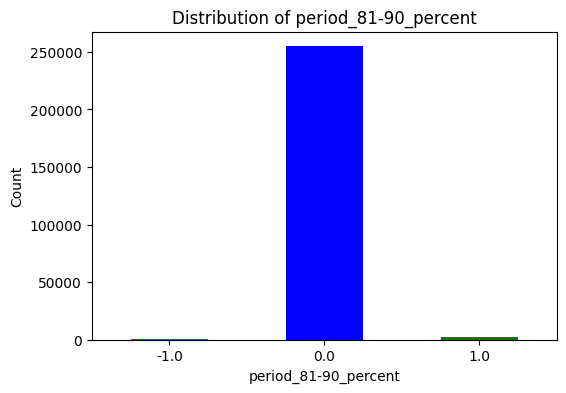

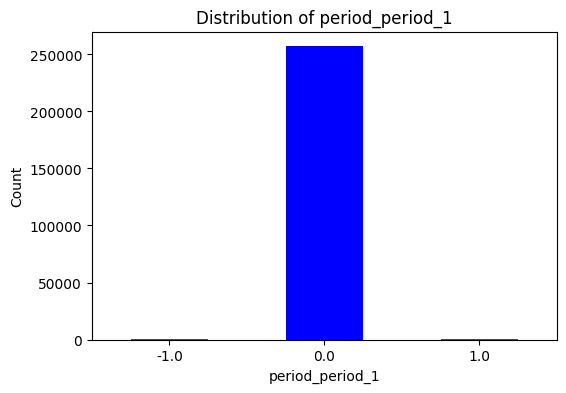

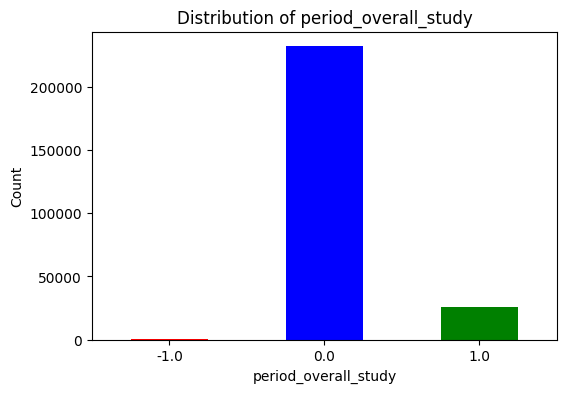

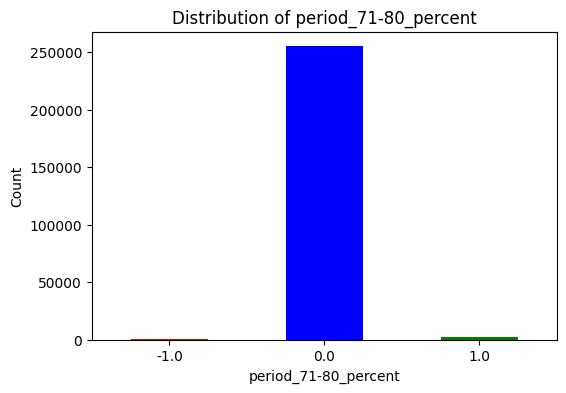

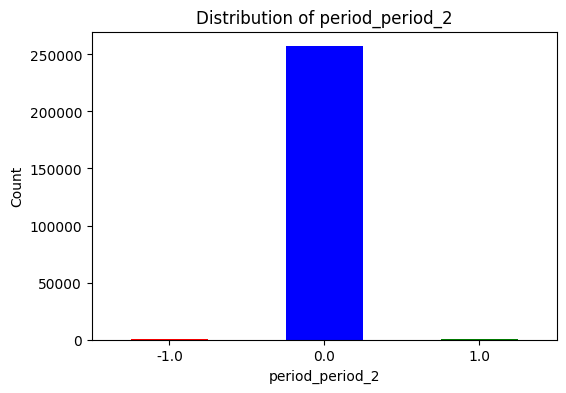

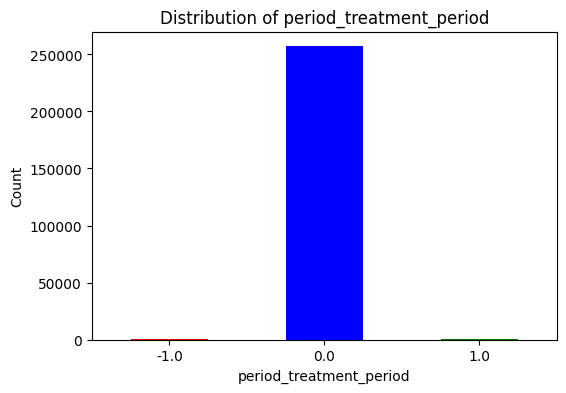

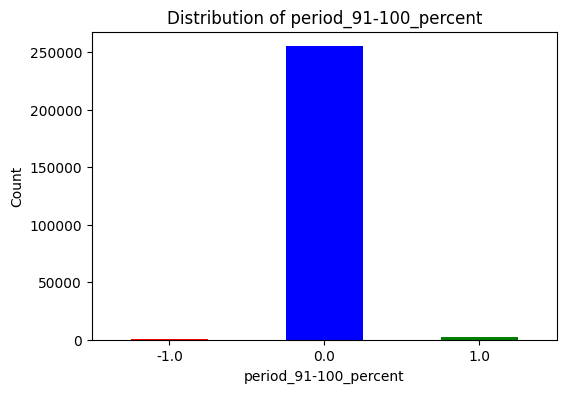

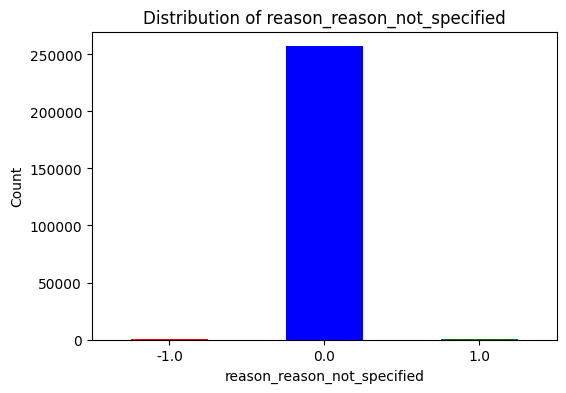

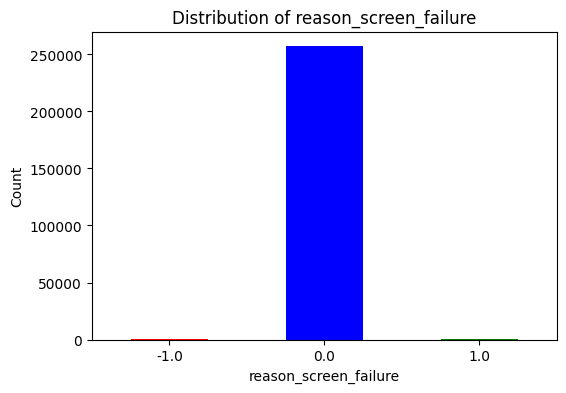

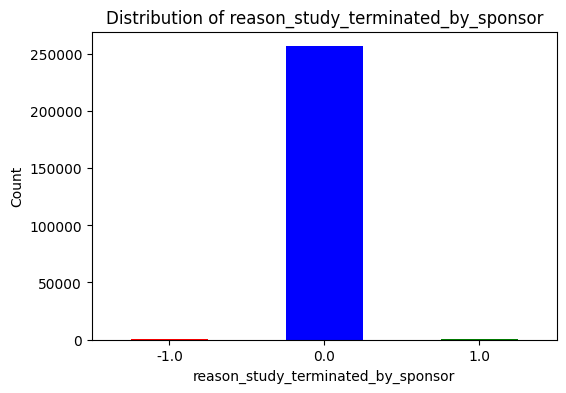

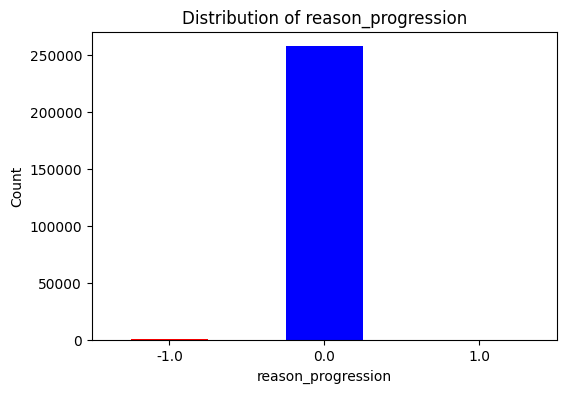

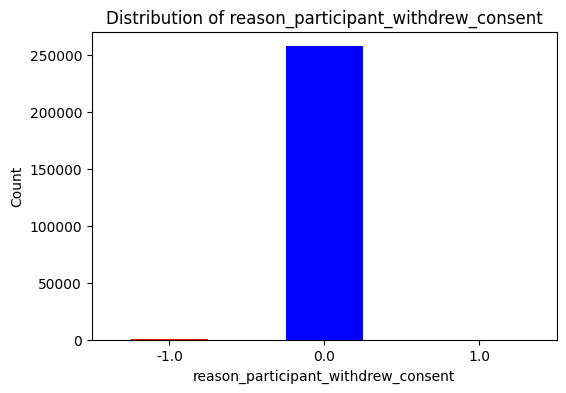

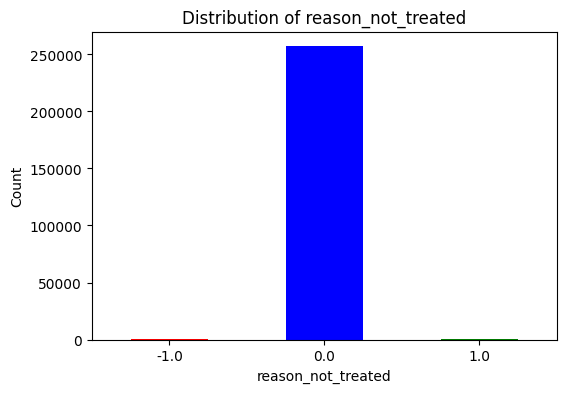

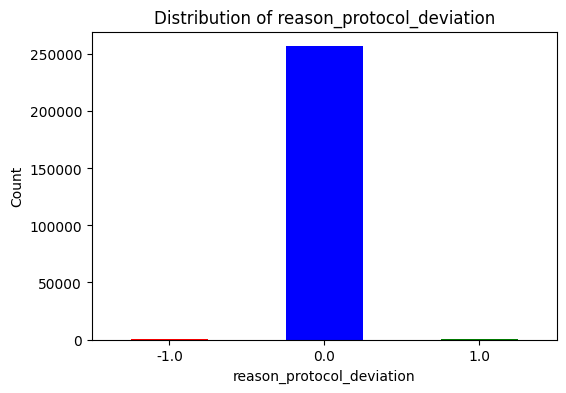

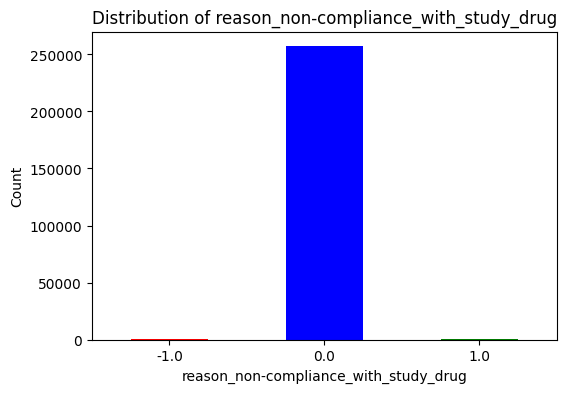

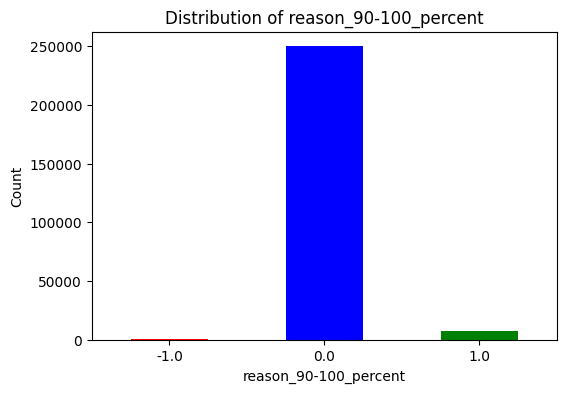

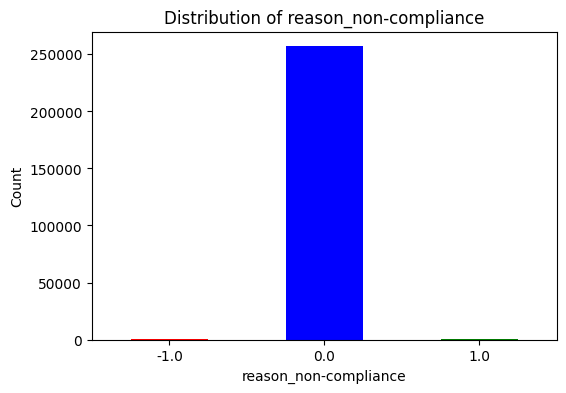

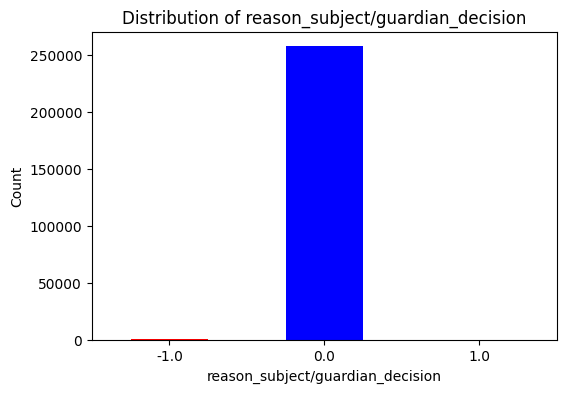

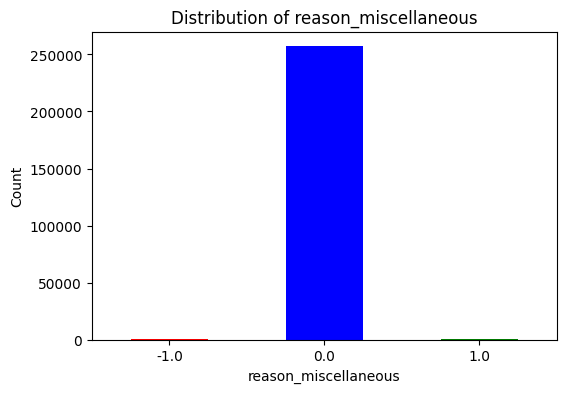

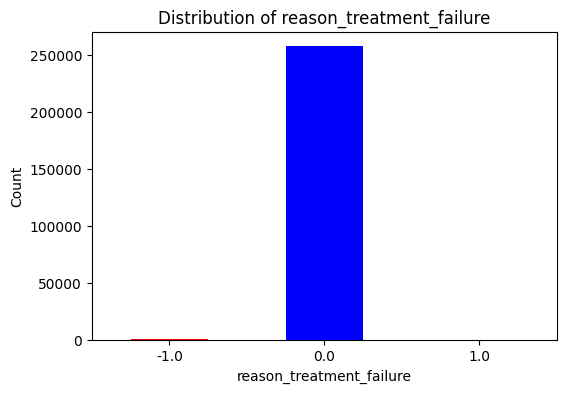

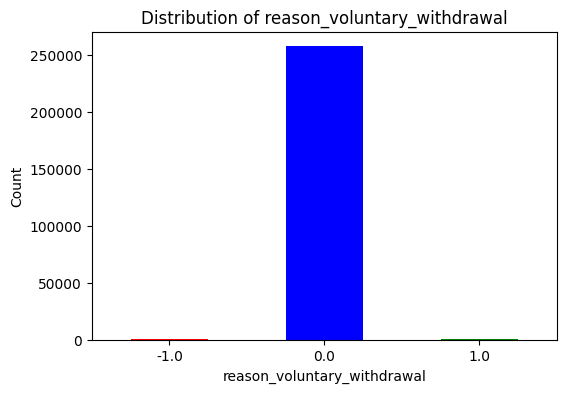

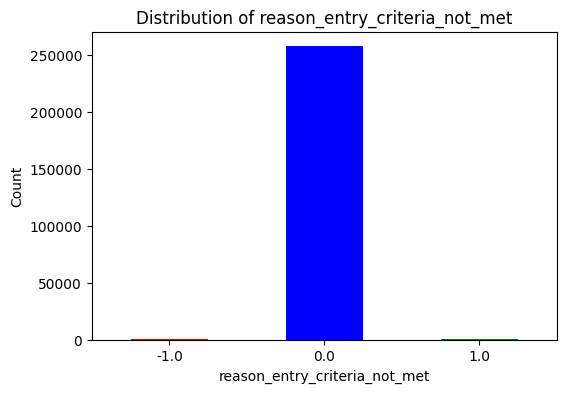

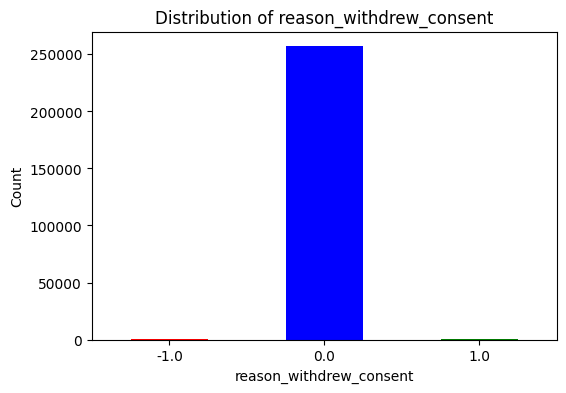

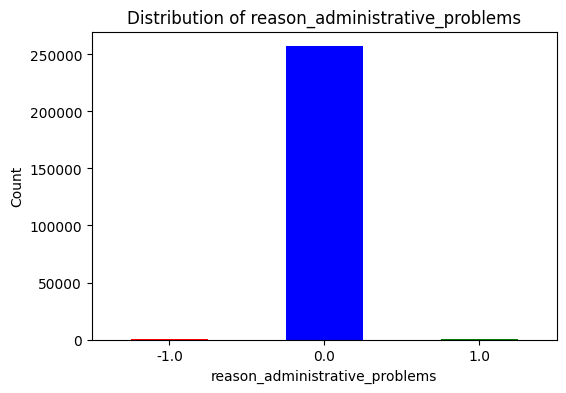

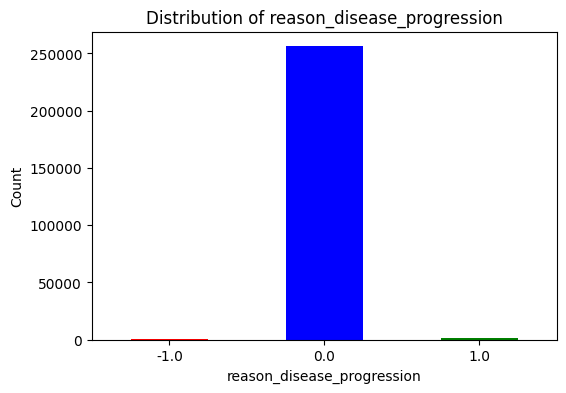

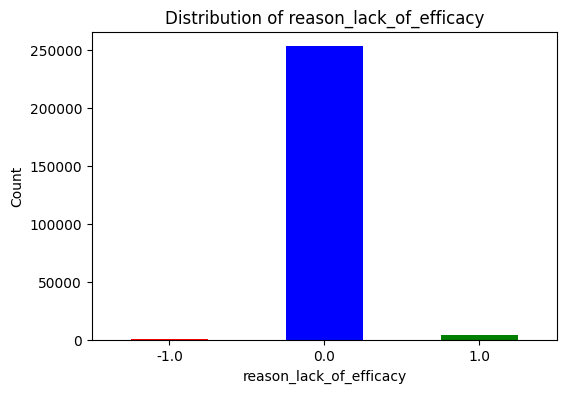

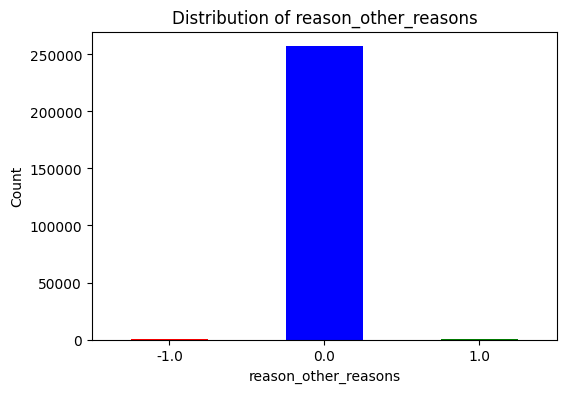

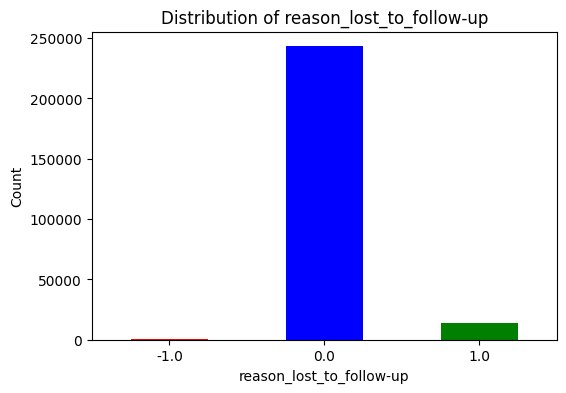

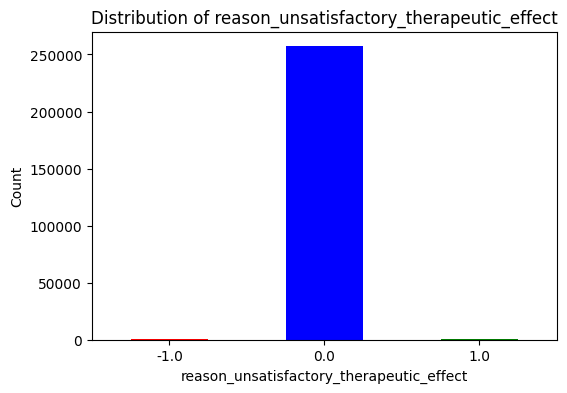

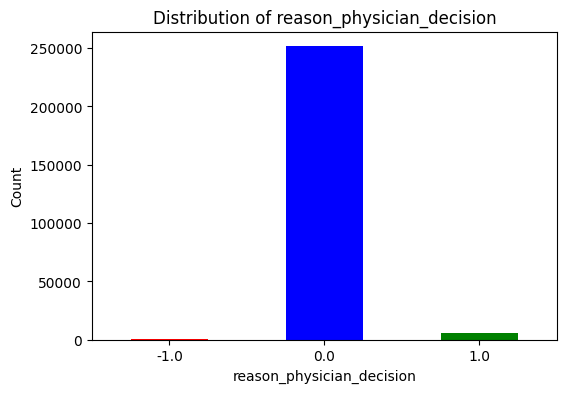

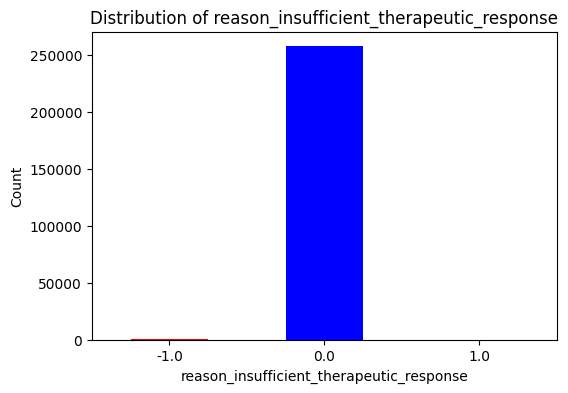

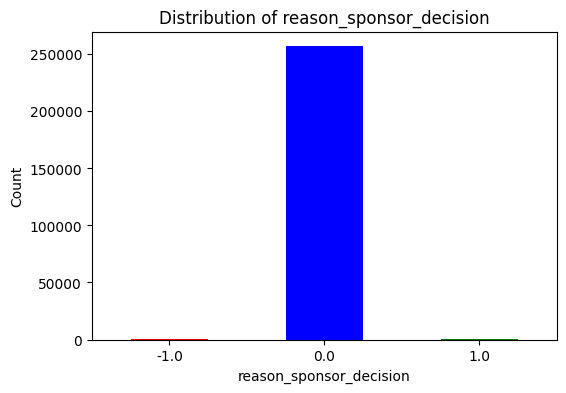

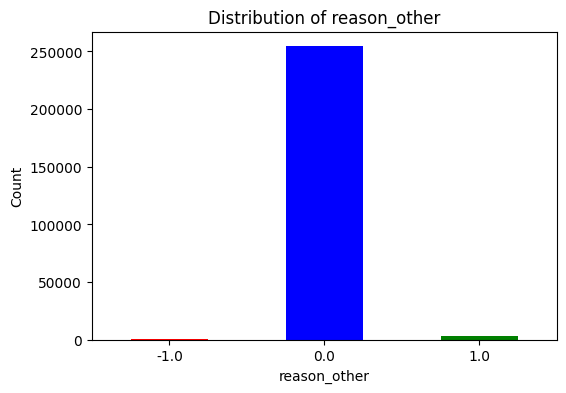

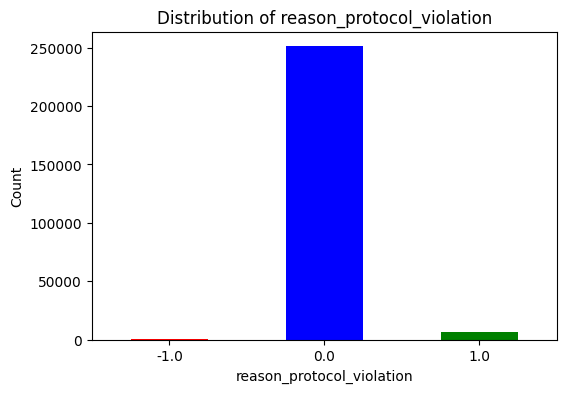

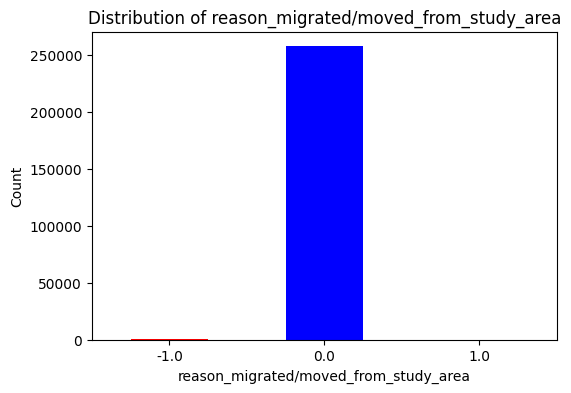

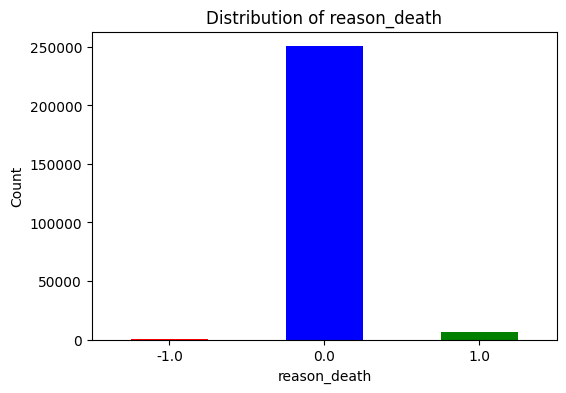

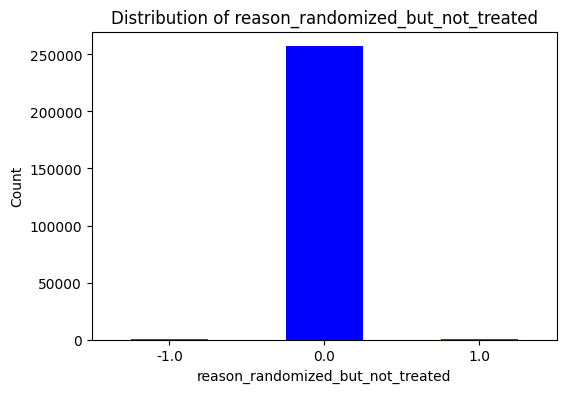

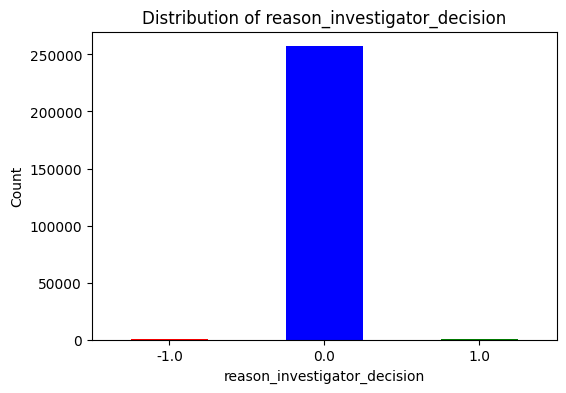

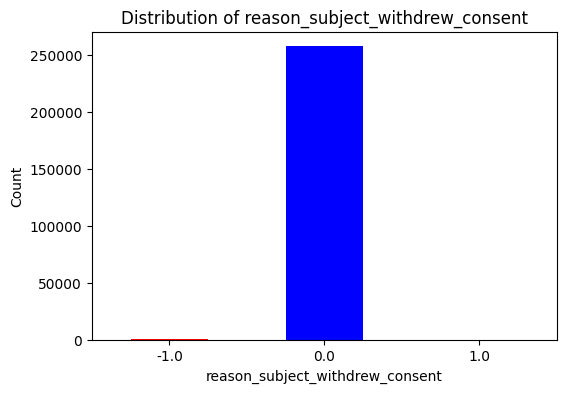

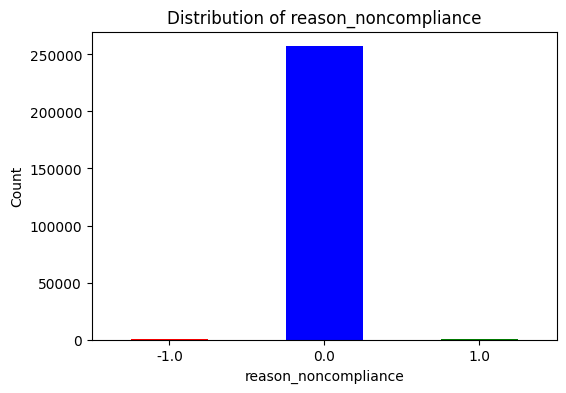

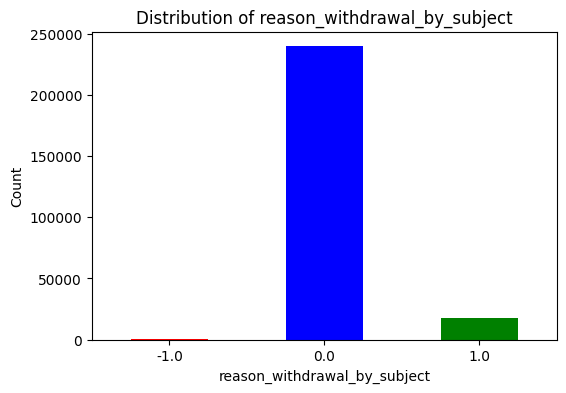

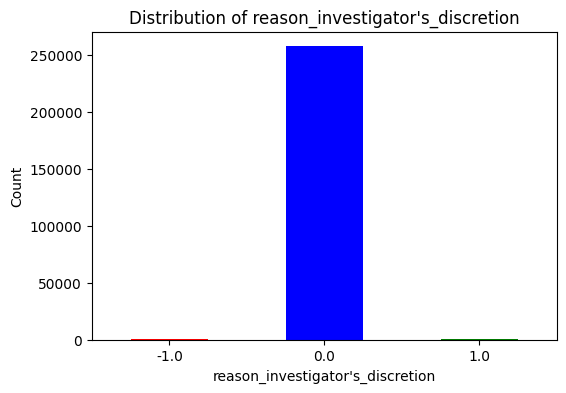

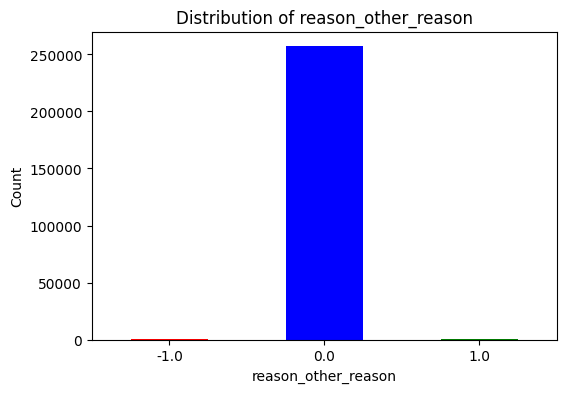

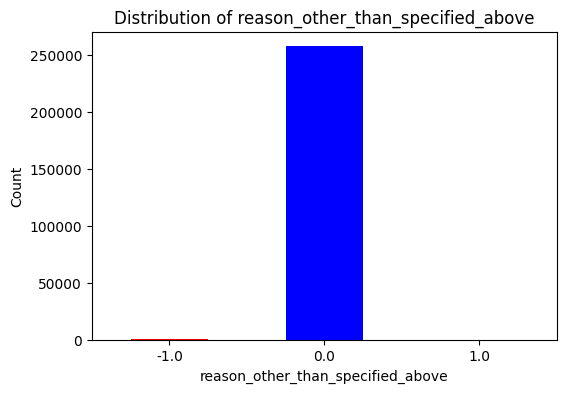

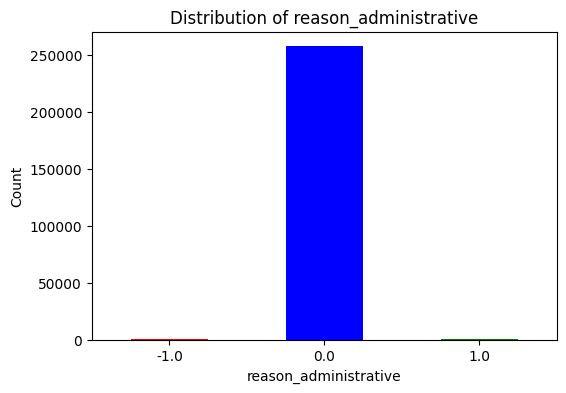

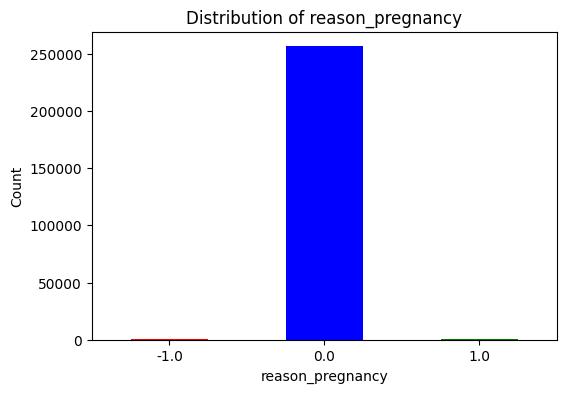

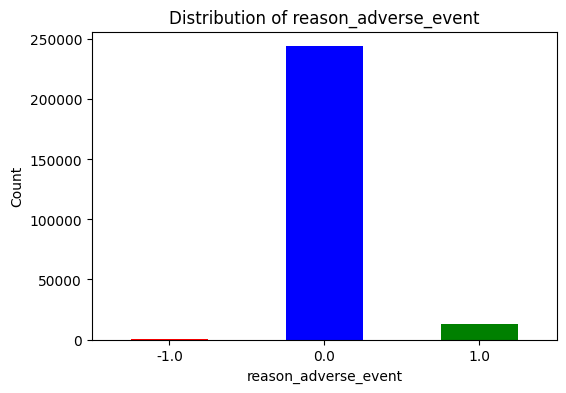

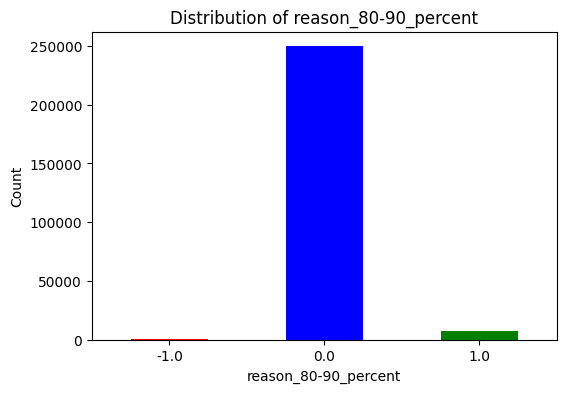

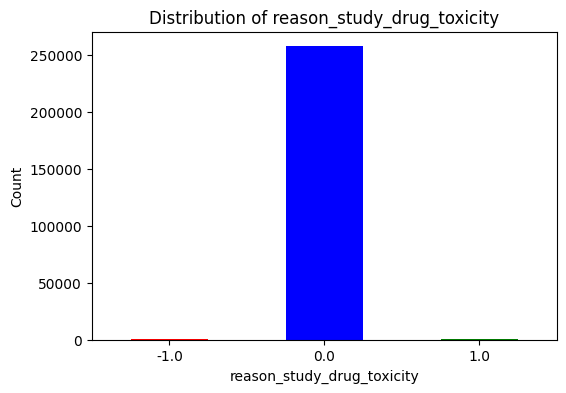

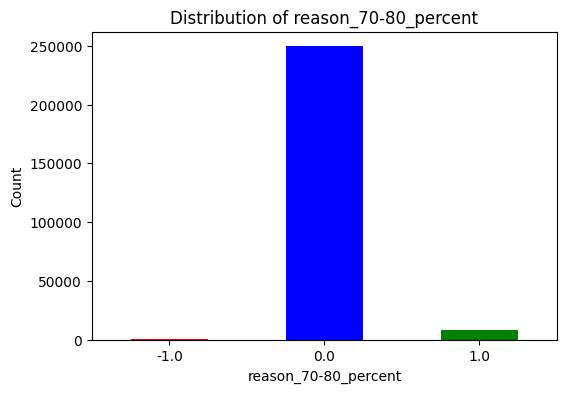

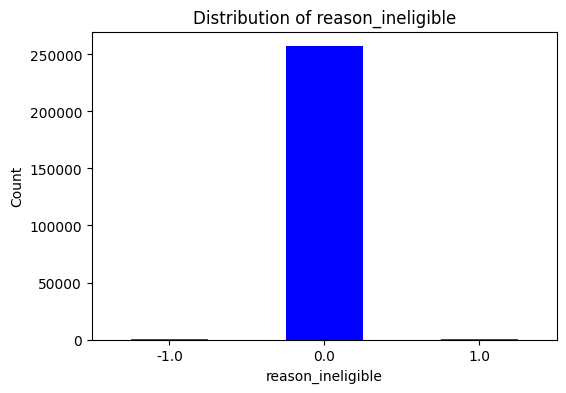

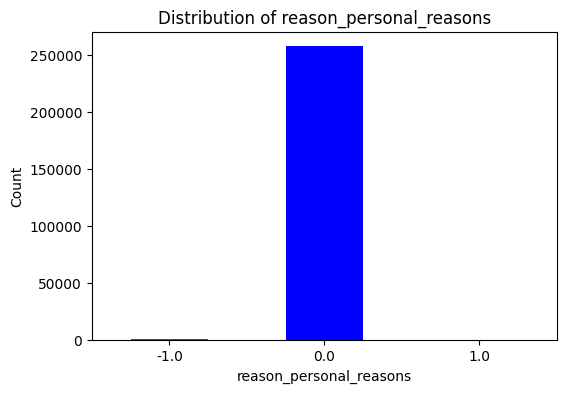

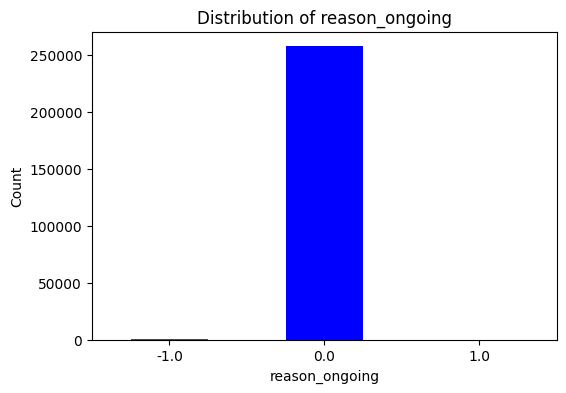

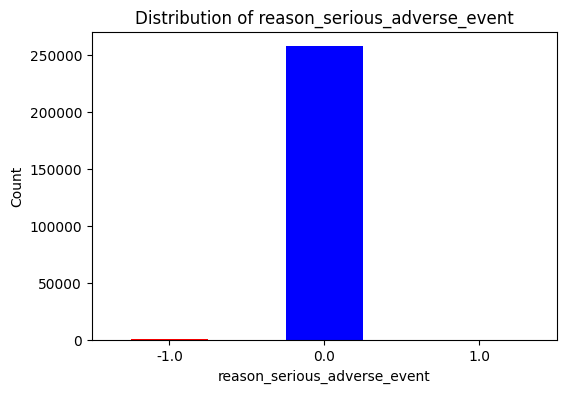

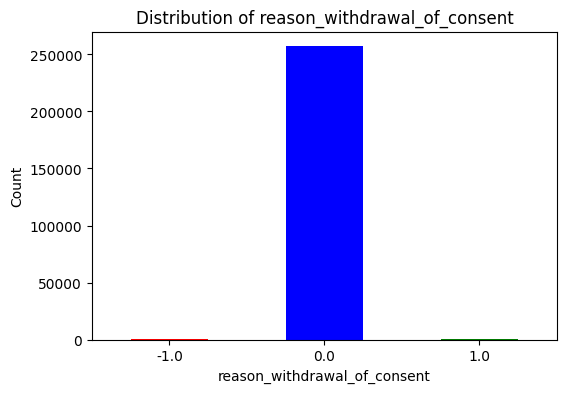

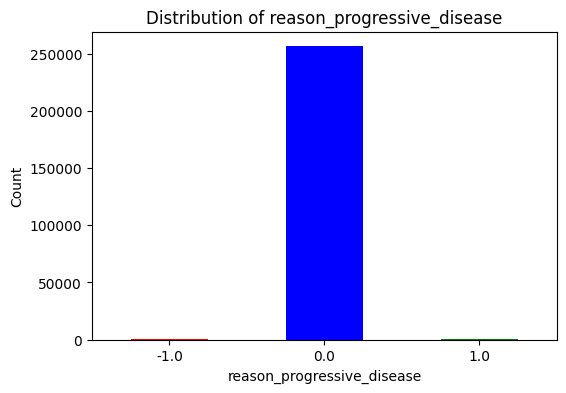

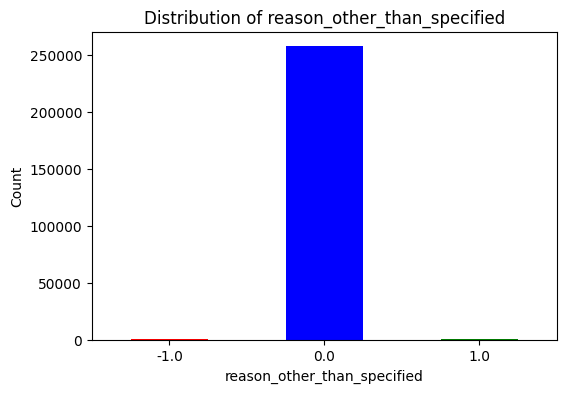

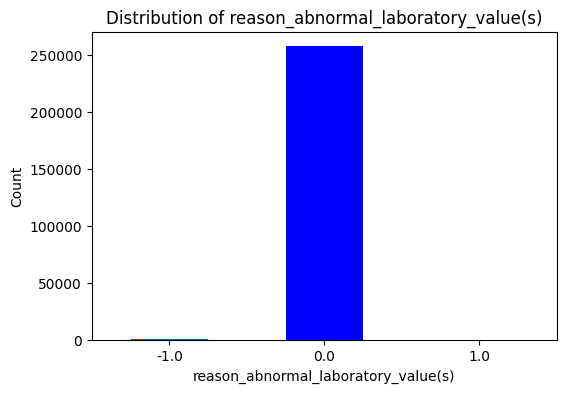

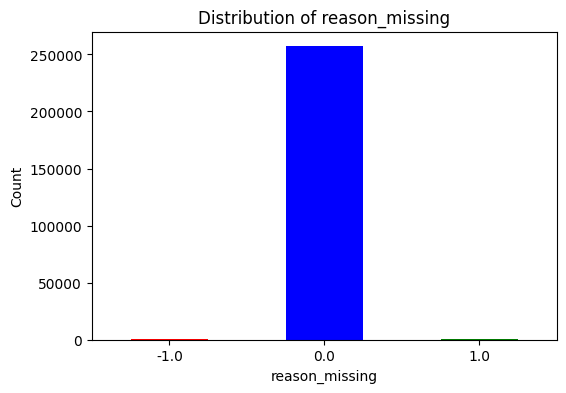

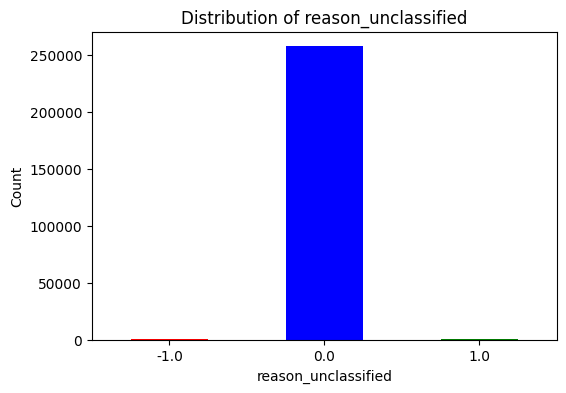

In [ ]:
import matplotlib.pyplot as plt

# Get encoded columns (binary features)
encoded_columns = [col for col in data.columns if data[col].nunique() <= 3]

# Count distribution of 0,1,-1 for encoded columns
for col in encoded_columns:
    plt.figure(figsize=(6,4))
    data[col].value_counts().sort_index().plot(kind='bar', color=['red', 'blue', 'green'])
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.xticks(rotation=0)
    plt.show()

In [9]:
import numpy as np
import matplotlib

# Print the versions
print("Numpy version:", np.__version__)
print("Matplotlib version:", matplotlib.__version__)


Numpy version: 1.26.4
Matplotlib version: 3.10.0


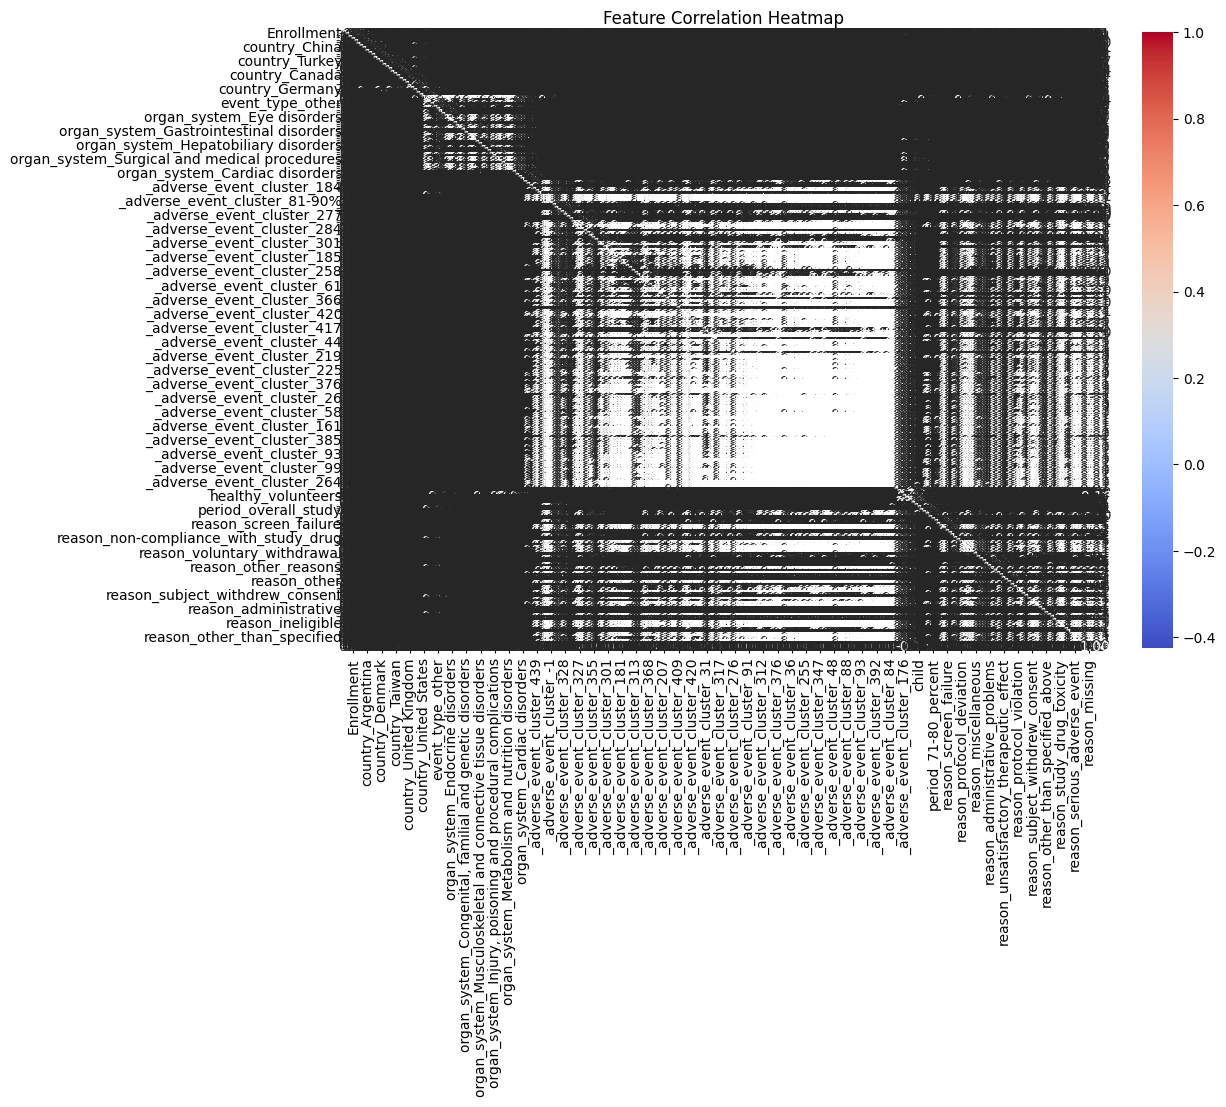

In [8]:

import matplotlib.pyplot as plt
import seaborn as sns

#for all numerical data including categorical data
numerical_columns = data.select_dtypes(include=['int64', 'float64']).columns

plt.figure(figsize=(12,8))
sns.heatmap(data[numerical_columns].corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()


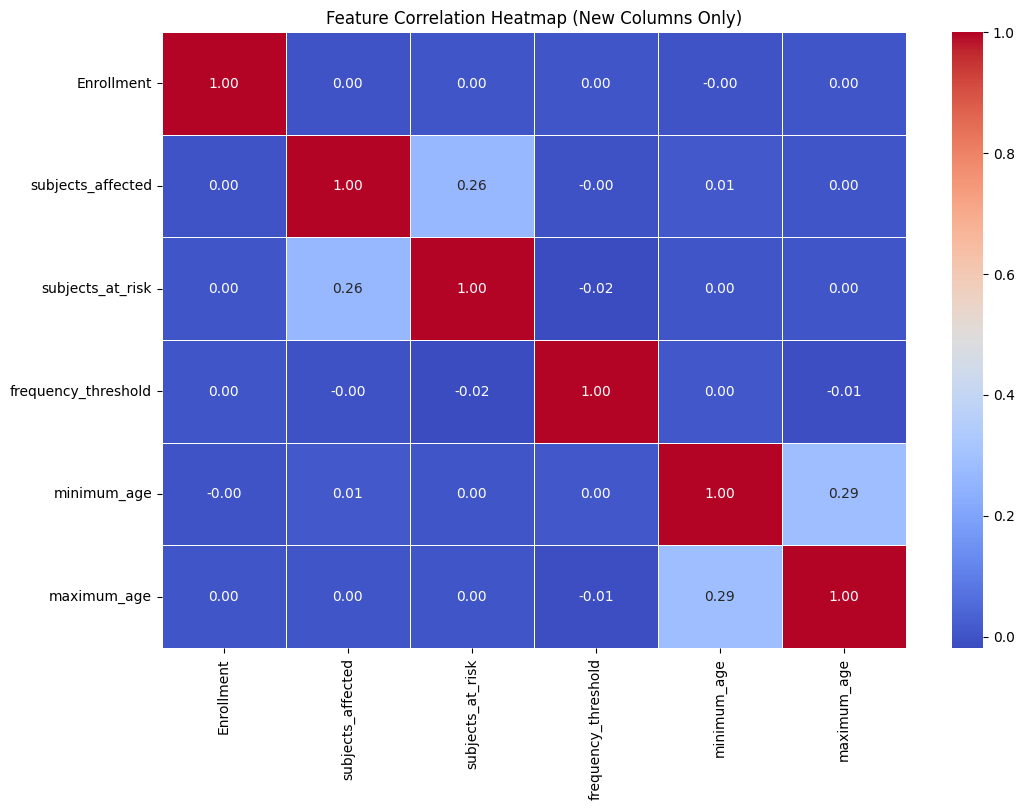

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

#numerical columns that seem relevent
new_columns =  ['Enrollment', 'subjects_affected', 'subjects_at_risk', 'frequency_threshold',
    'minimum_age','maximum_age']  

plt.figure(figsize=(12,8))
sns.heatmap(data[new_columns].corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap (New Columns Only)")
plt.show()

PCA VISUALIZATION

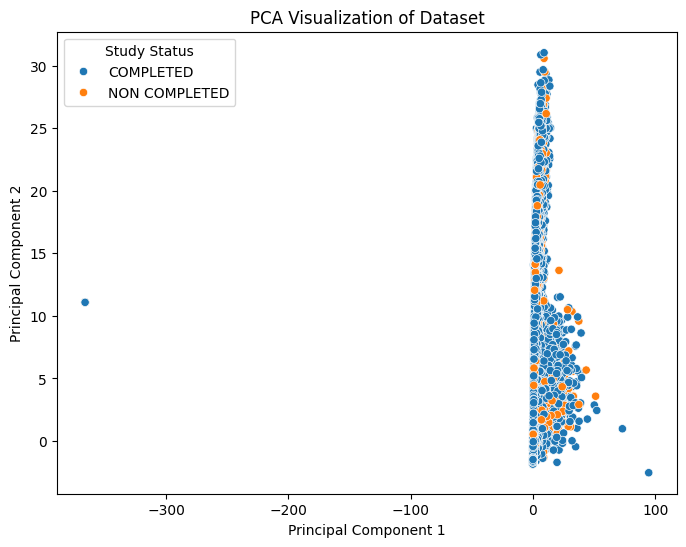

In [11]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

numerical_columns = data.select_dtypes(include=['int64', 'float64']).columns

scaler = StandardScaler()
X_scaled = scaler.fit_transform(data[numerical_columns])

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8,6))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=data['Study Status'])
plt.title("PCA Visualization of Dataset")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()


Applying shap for initial analysis

In [13]:
from sklearn.preprocessing import LabelEncoder
import xgboost
import shap

categorical_columns = [
    'NCT Number', 'Study Title', 'Brief Summary', 'Study Results',
    'Conditions', 'Interventions', 'Primary Outcome Measures',
    'Secondary Outcome Measures', 'Sex', 'Phases', 'Funder Type',
    'Study Type', 'Study Design', 'time_frame', 'sampling_method',
    'population', 'criteria'
]

label_encoders = {}
for col in categorical_columns:
    if col in data.columns:
        le = LabelEncoder()
        data[col] = le.fit_transform(data[col].astype(str))  
        label_encoders[col] = le  

X = data.drop(columns=['Study Status'])
y = data['Study Status']  

y = LabelEncoder().fit_transform(y)

model = xgboost.XGBClassifier()
model.fit(X, y)

explainer = shap.Explainer(model, X)


In [15]:
explainer = shap.Explainer(model)
explainer

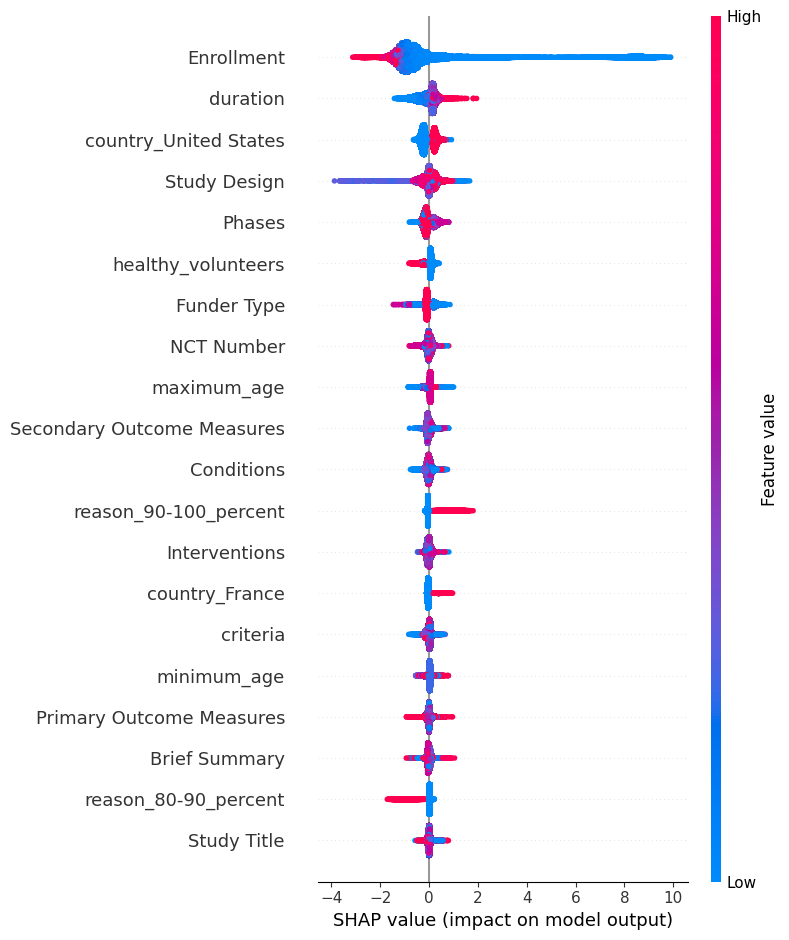

In [16]:
shap_values = explainer(X)
shap.summary_plot(shap_values, X)
